Case Studies Assignment 2

**Group Members:** 
Group Number: 7


1.   **Ankit Juneja**: 22221327
2.   **Mahima Sharma**: 22225563
3.   **Thomas Kuruvilla**: 22231052





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the required libraries

In [ ]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# TensorBoard notebook extension is loaded to enable using tensorboard and its commands
%load_ext tensorboard

**Import necessary Libraries**

In [ ]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import cv2
from PIL import Image
from IPython.utils.path import glob
from tqdm import tqdm
import splitfolders
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import activations
import datetime
from tensorflow.keras.layers import Dense, MaxPooling2D, ReLU, Input, Flatten,Activation
from tensorflow.keras.models import Model

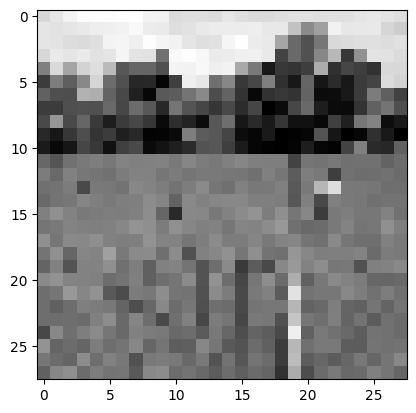

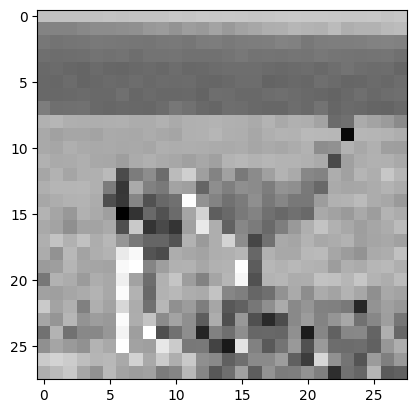

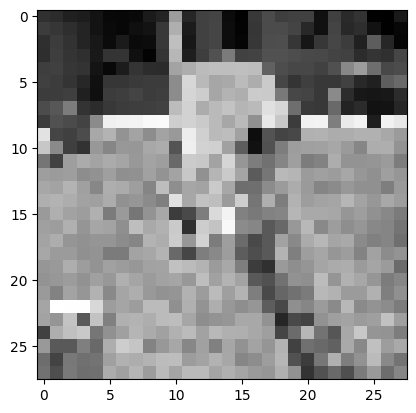

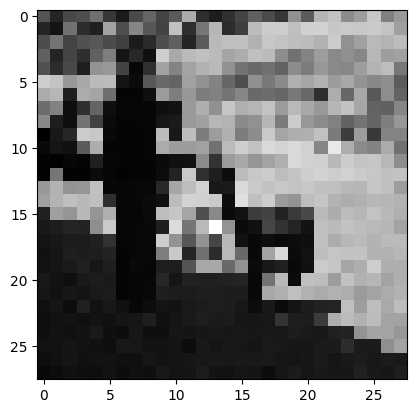

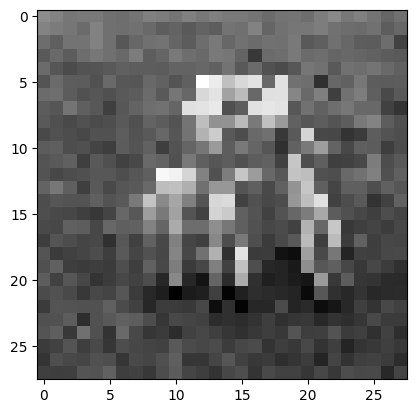

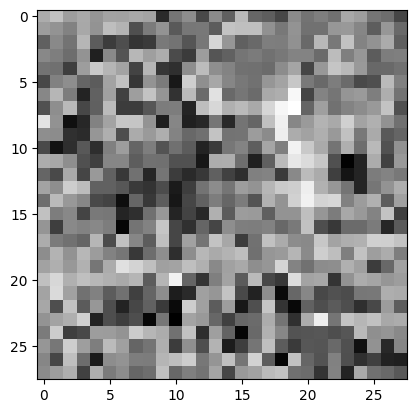

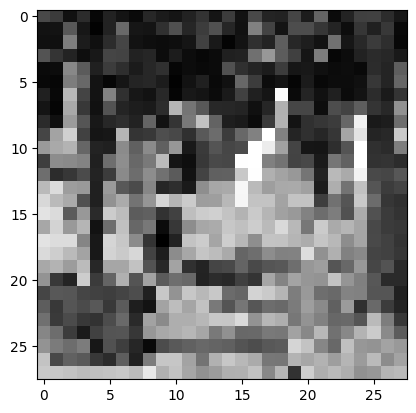

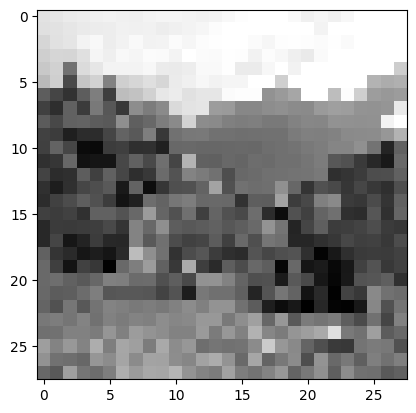

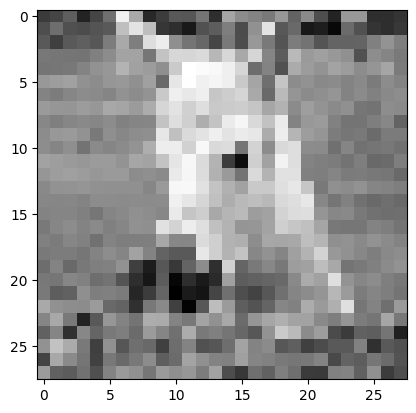

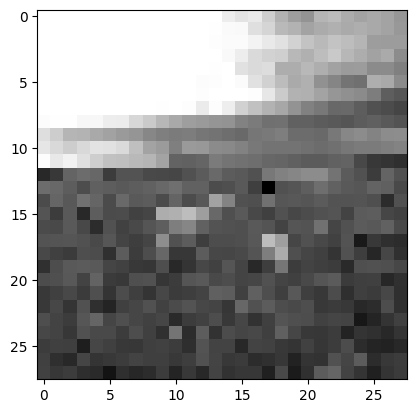

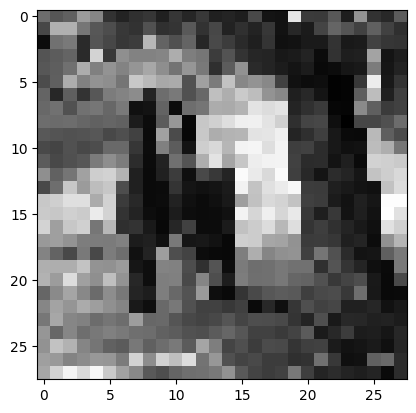

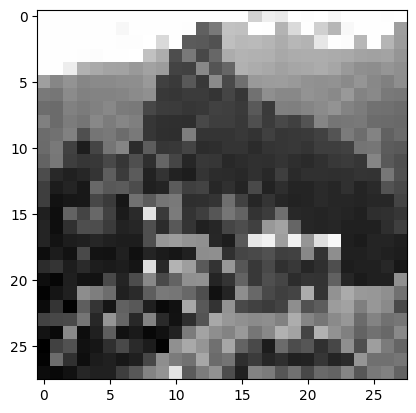

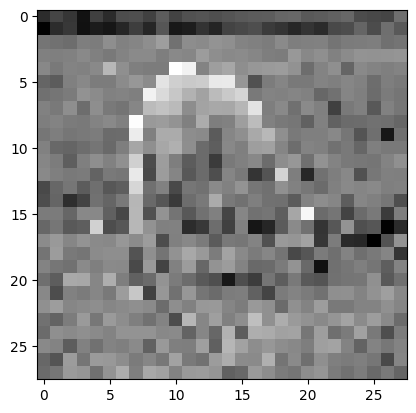

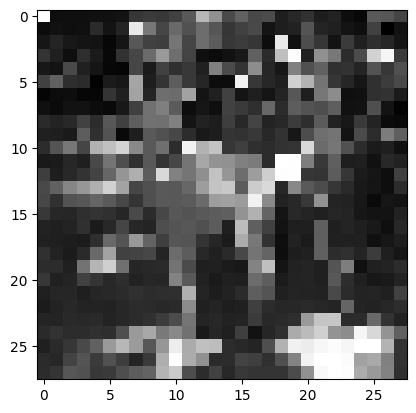

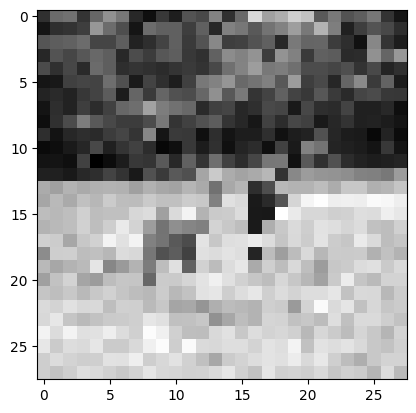

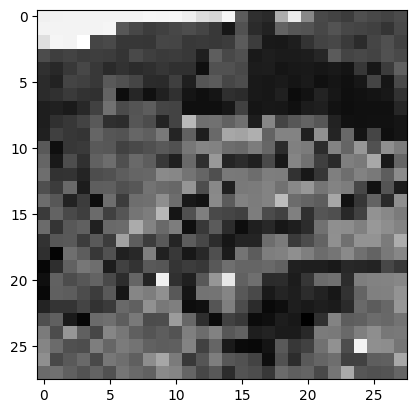

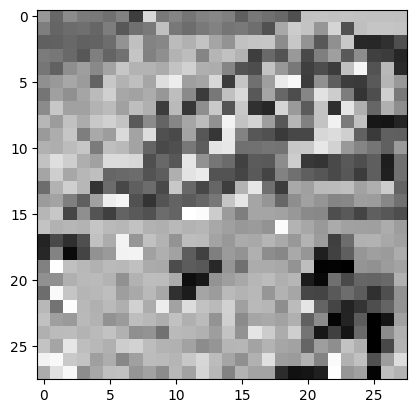

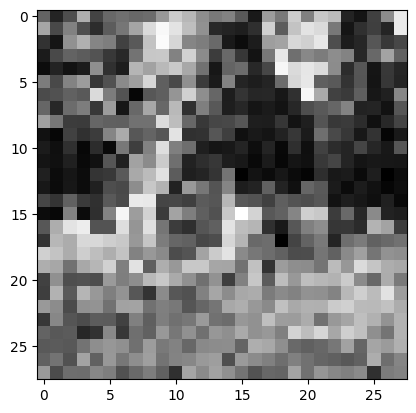

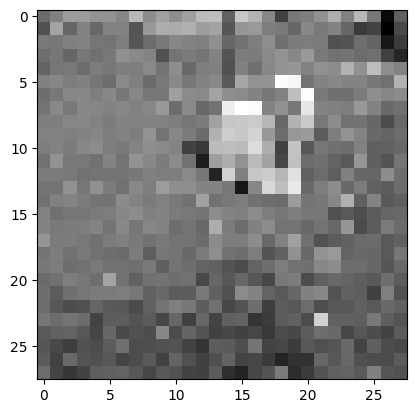

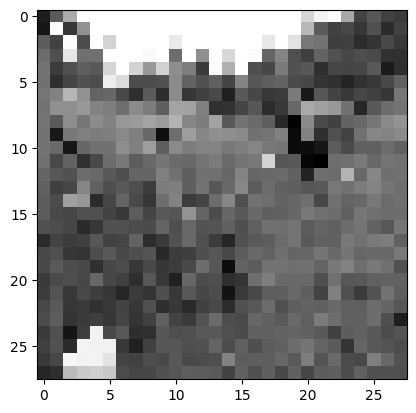

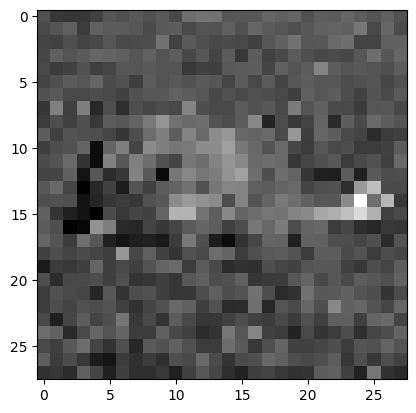

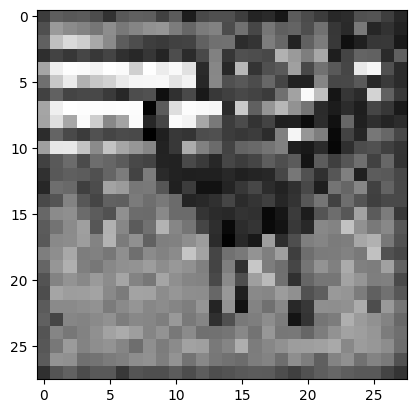

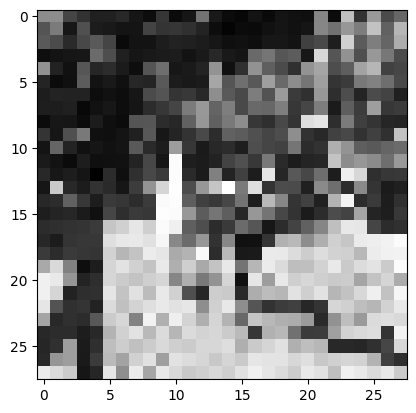

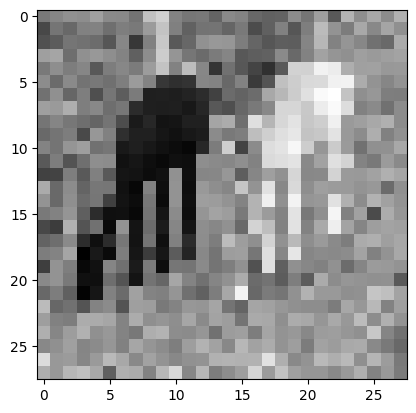

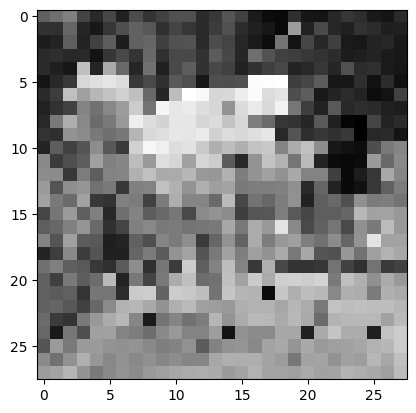

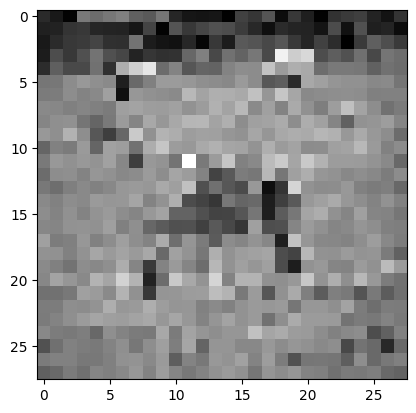

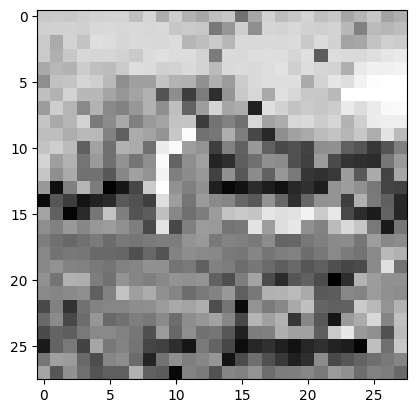

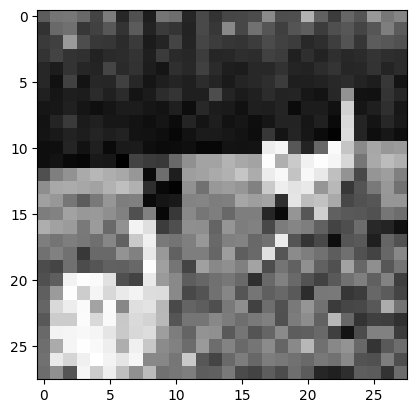

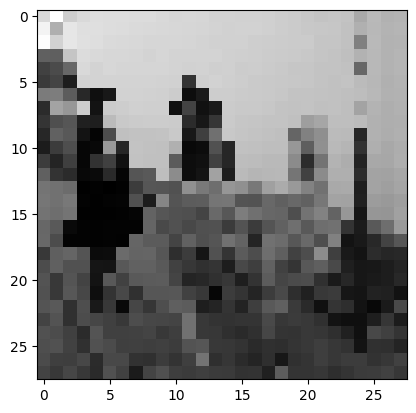

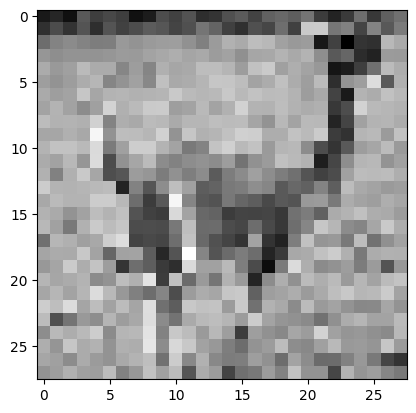

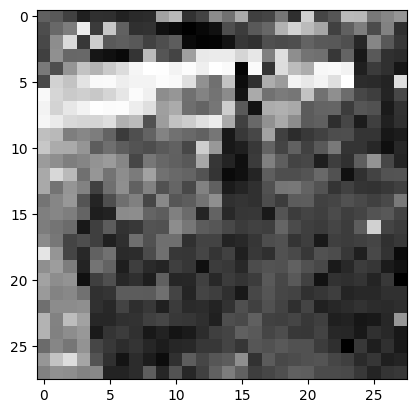

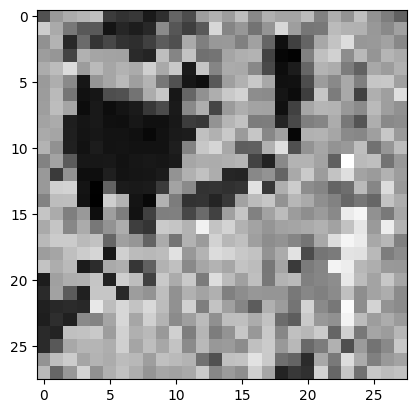

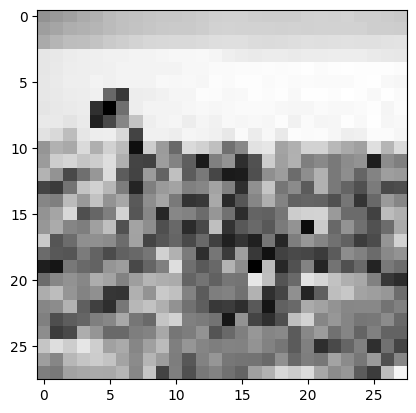

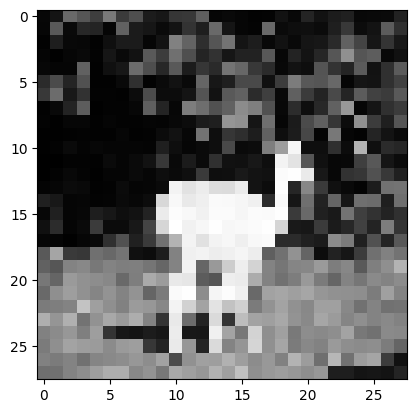

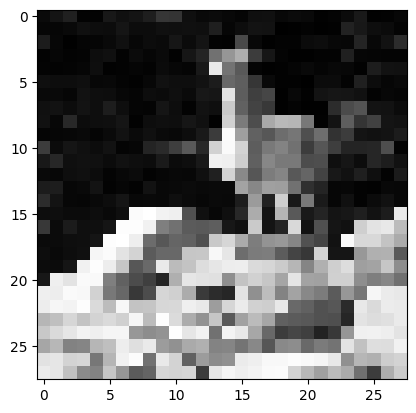

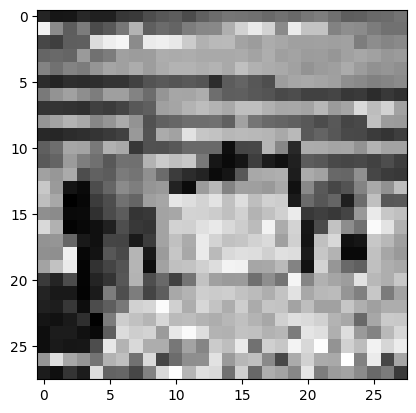

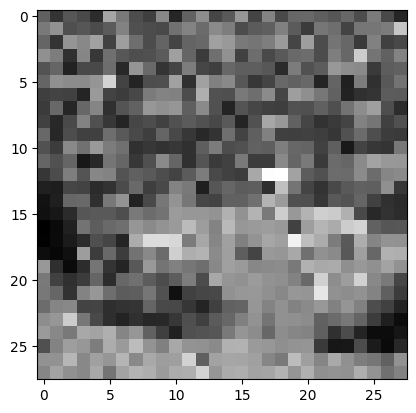

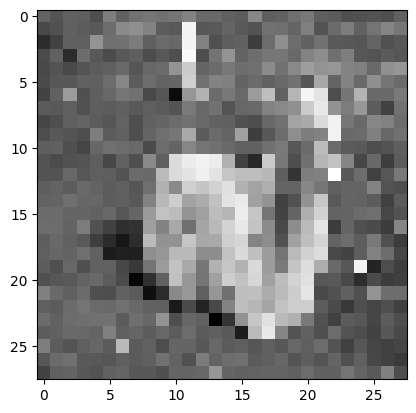

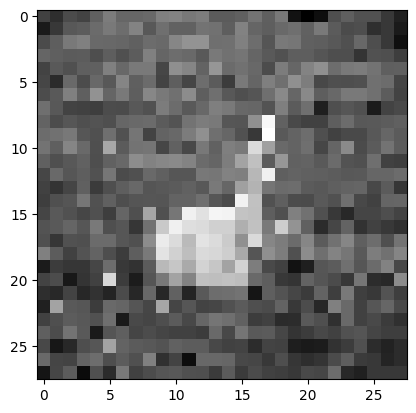

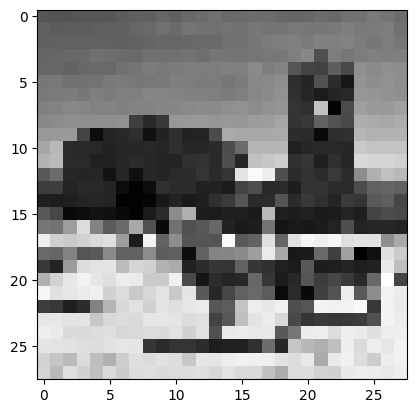

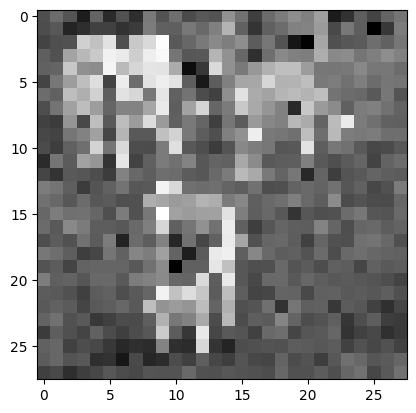

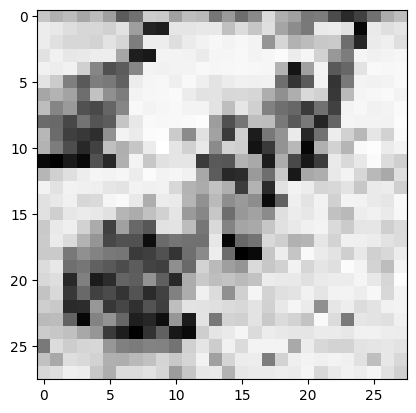

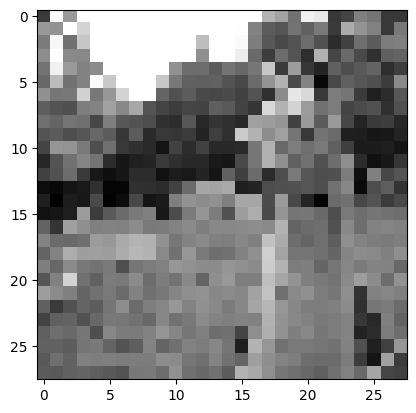

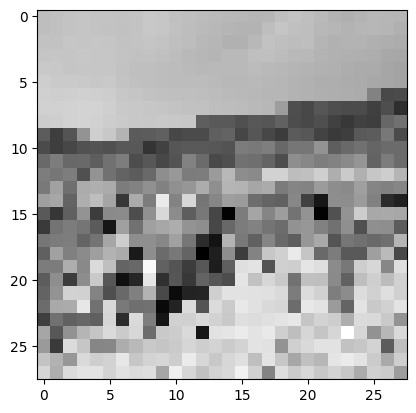

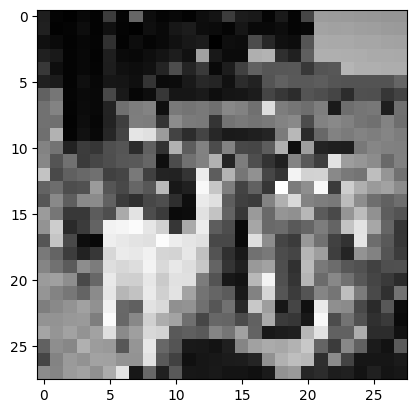

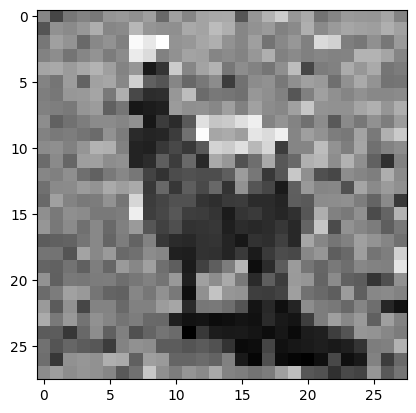

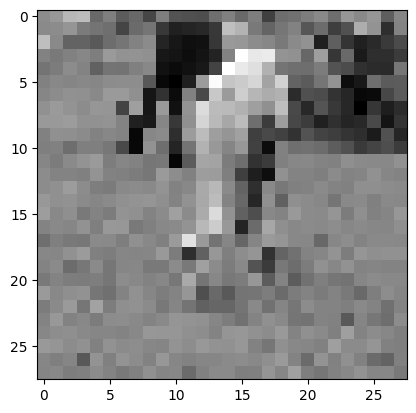

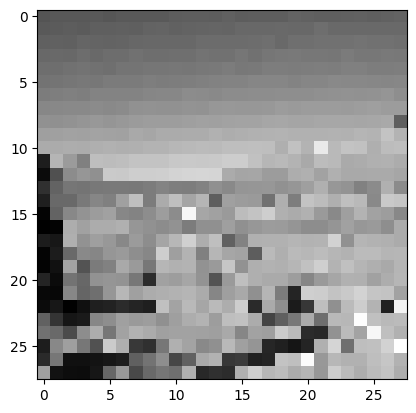

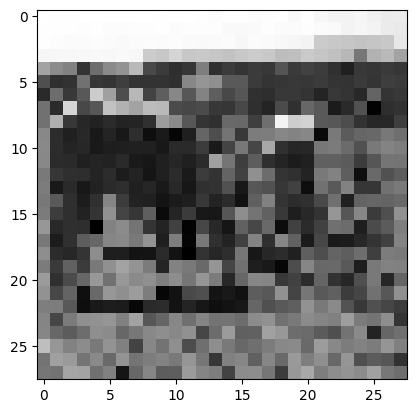

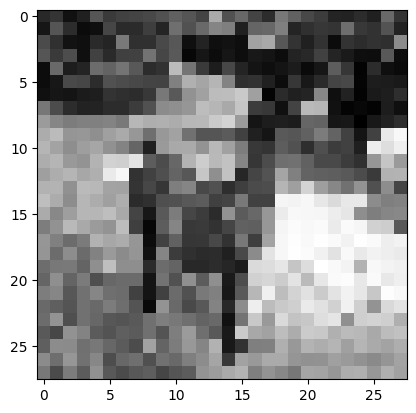

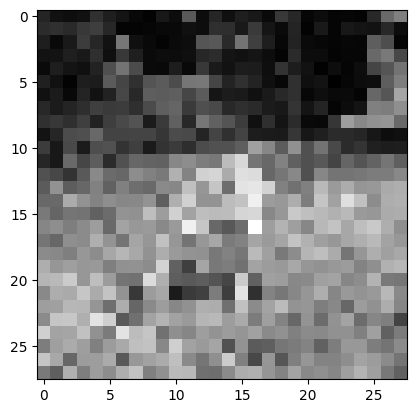

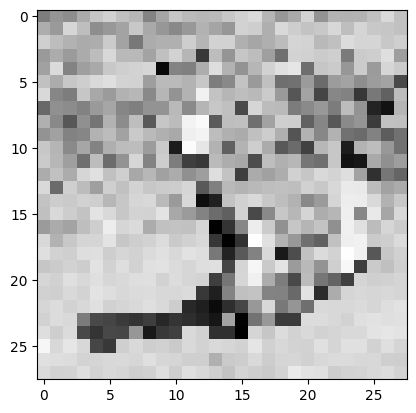

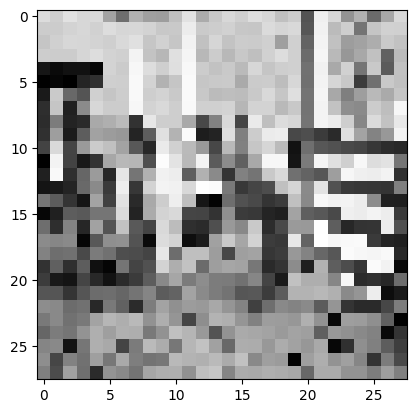

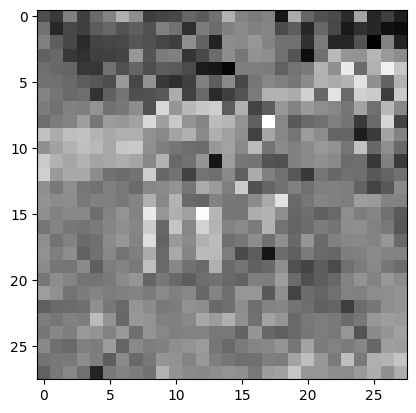

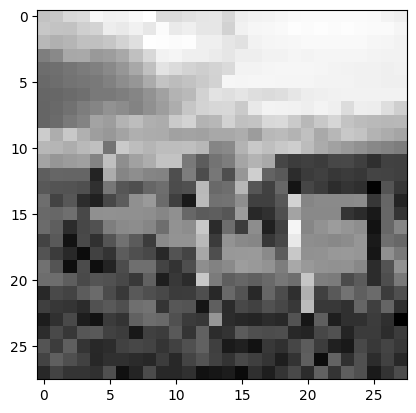

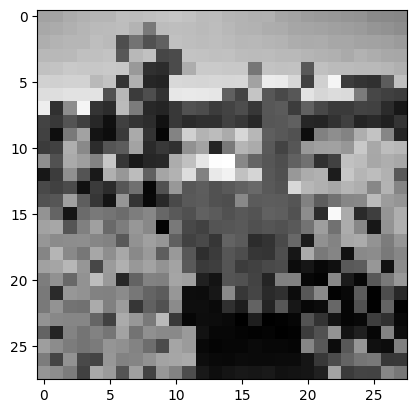

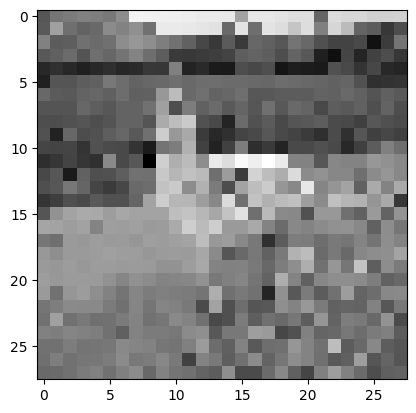

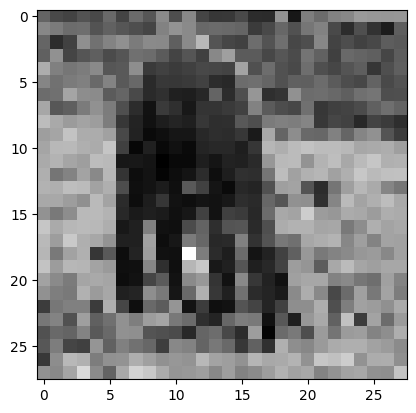

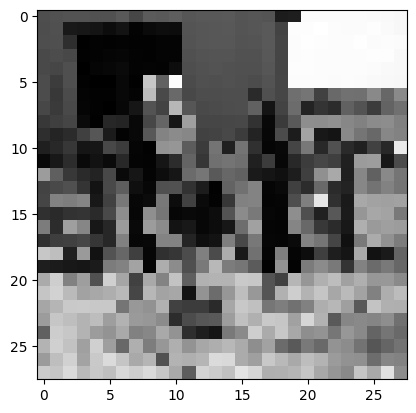

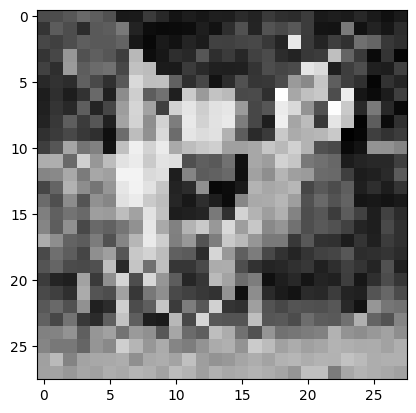

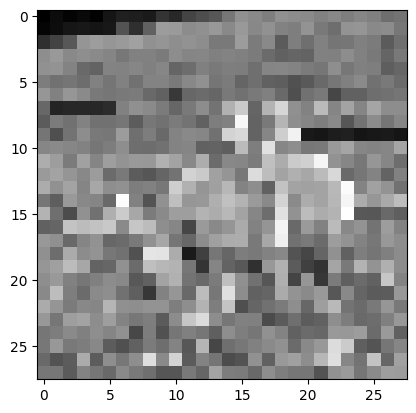

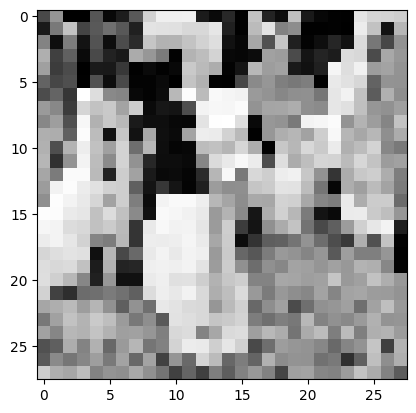

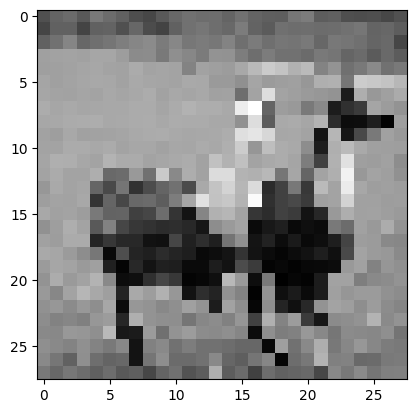

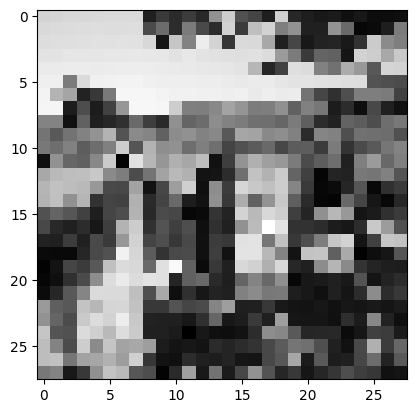

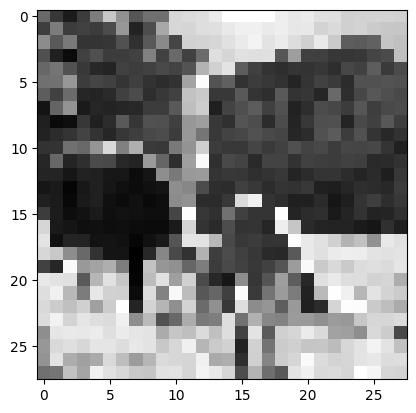

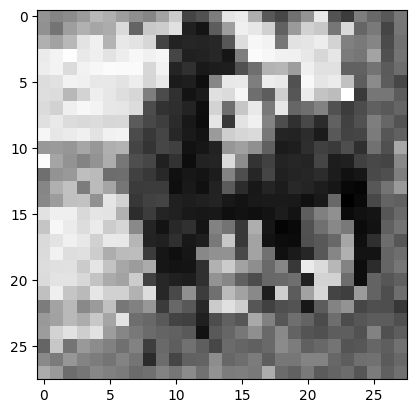

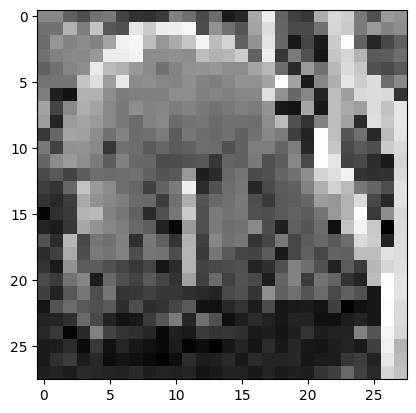

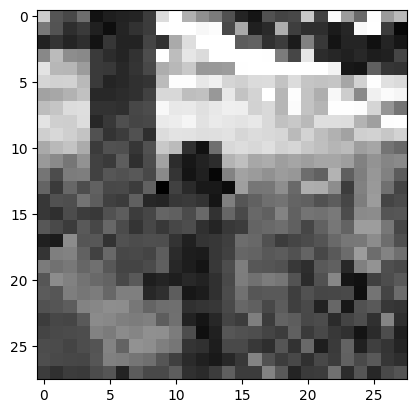

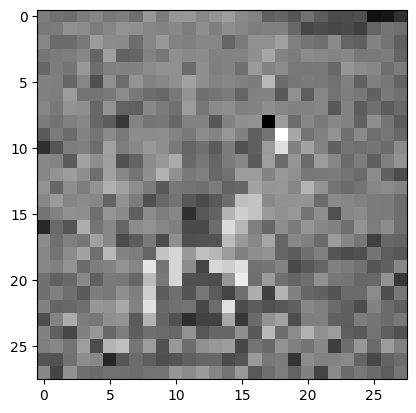

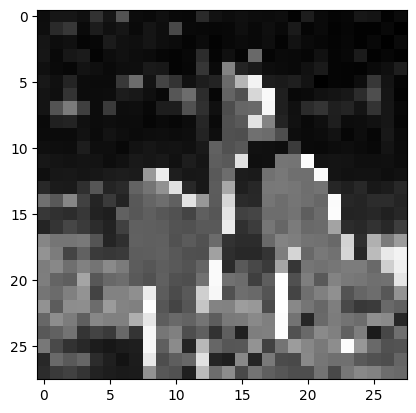

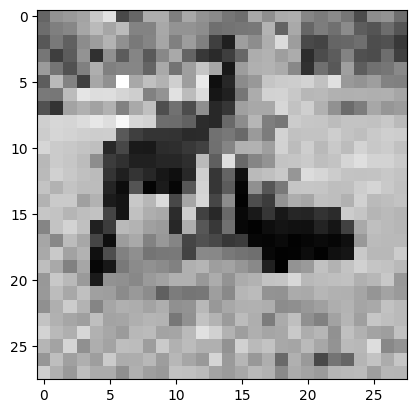

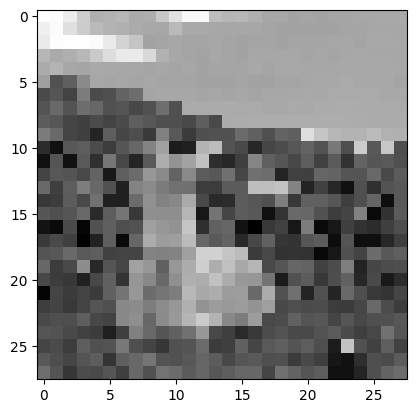

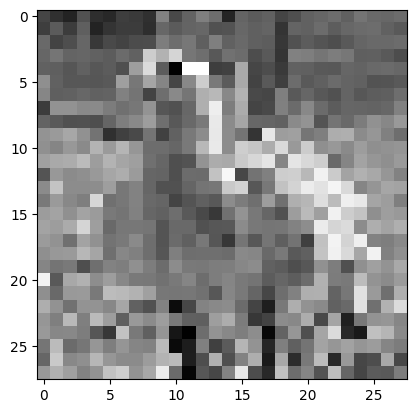

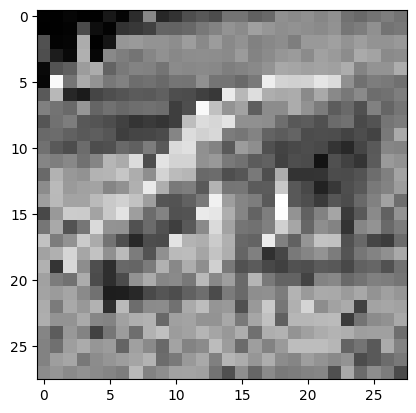

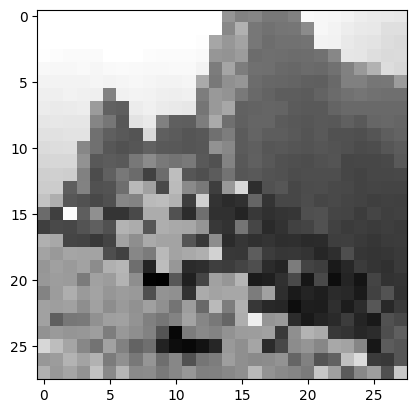

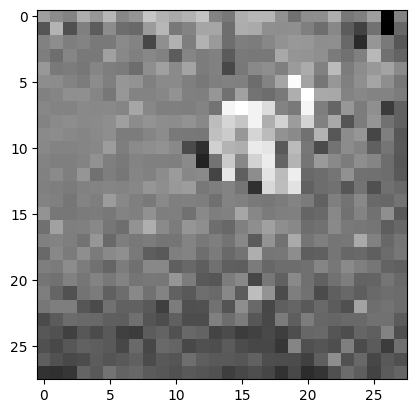

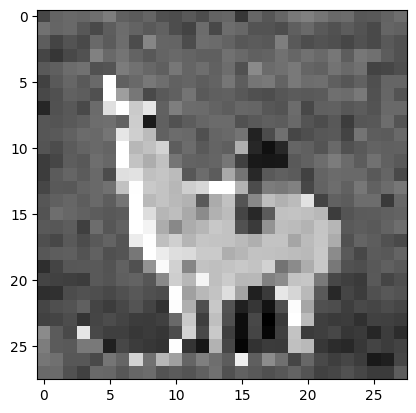

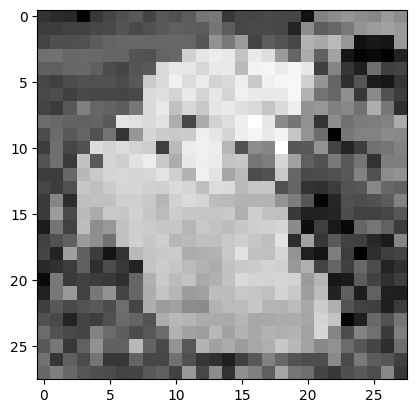

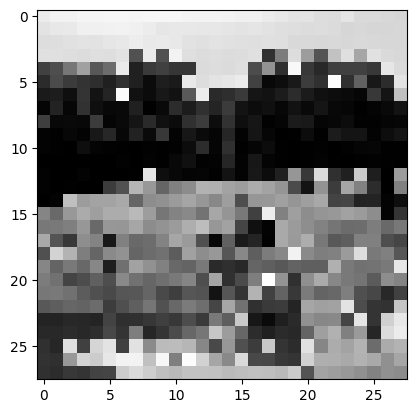

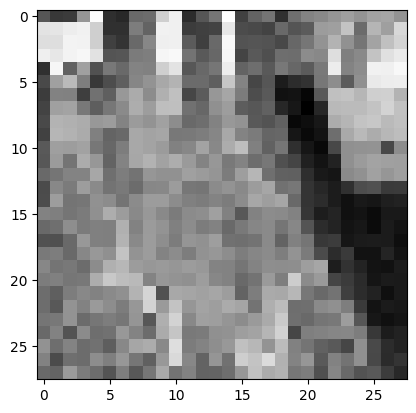

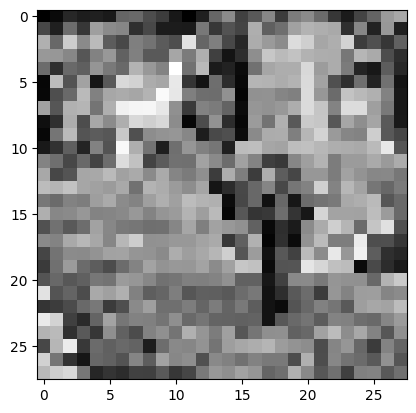

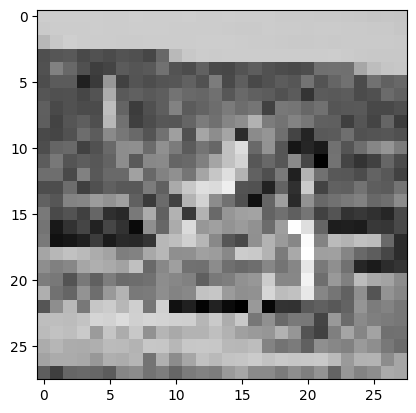

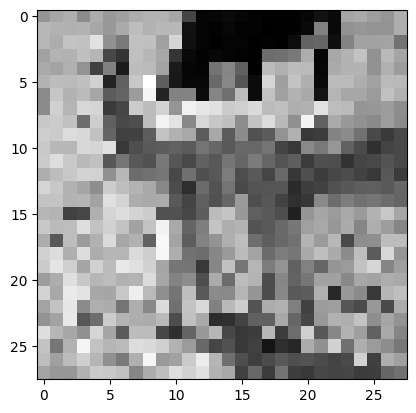

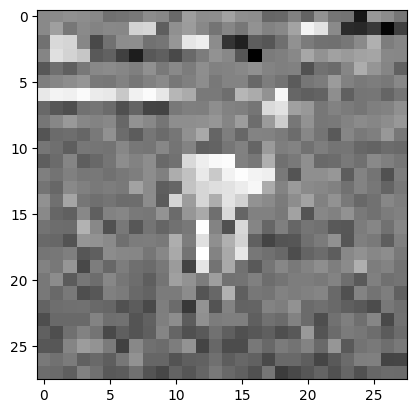

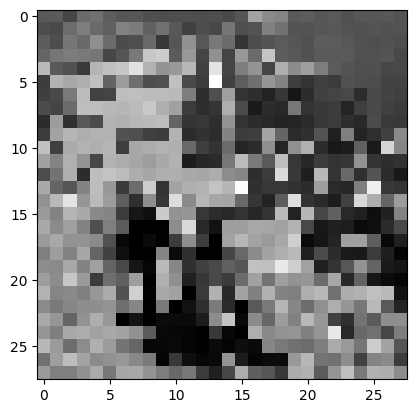

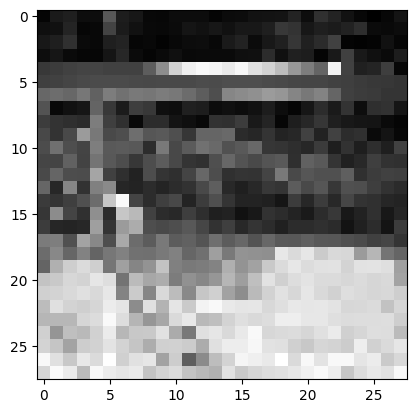

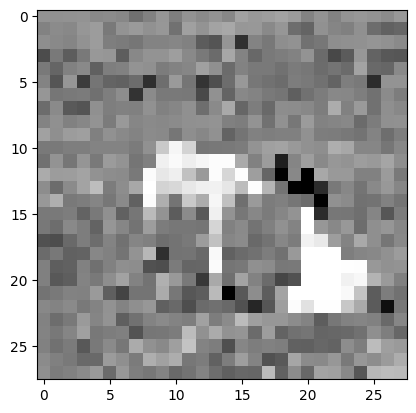

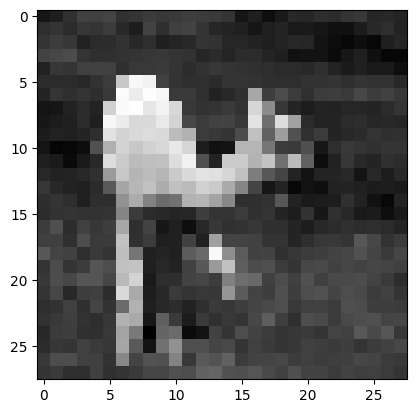

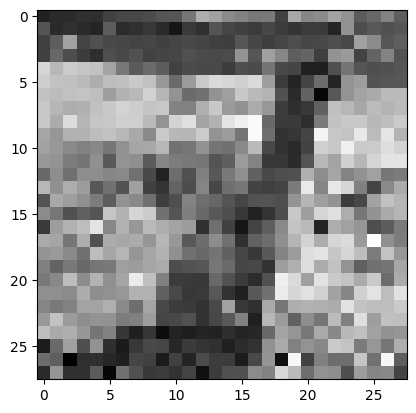

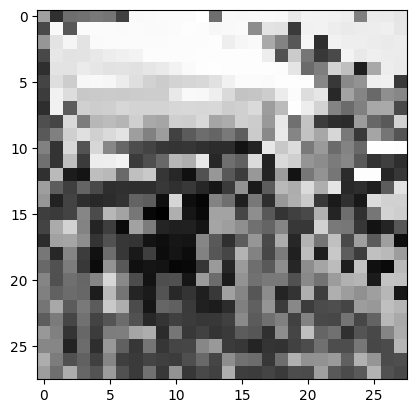

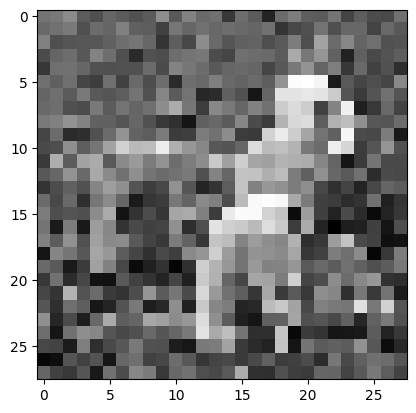

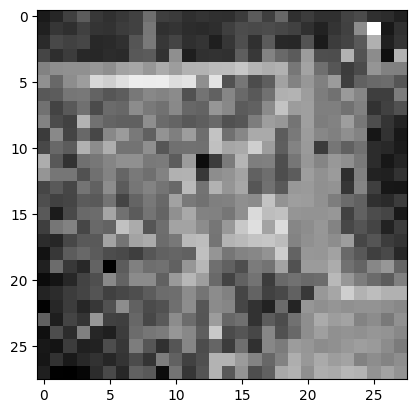

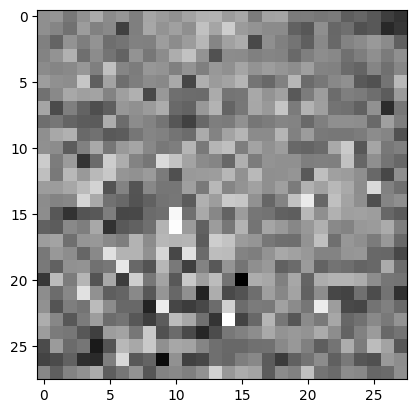

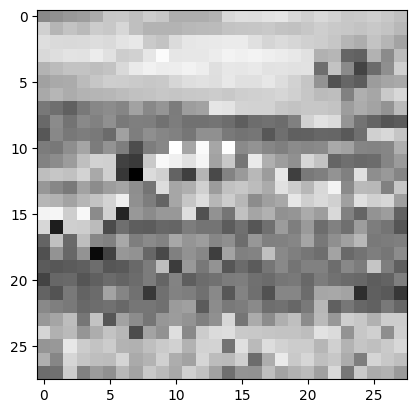

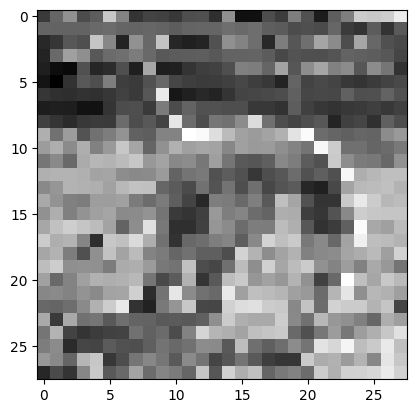

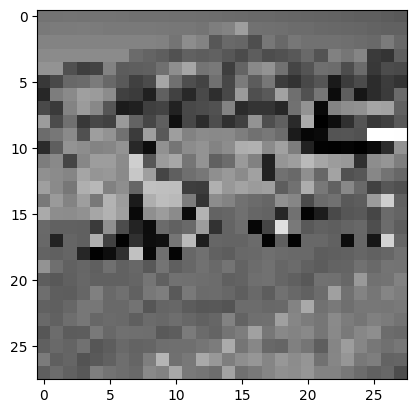

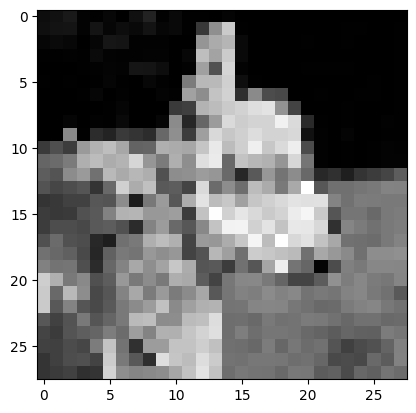

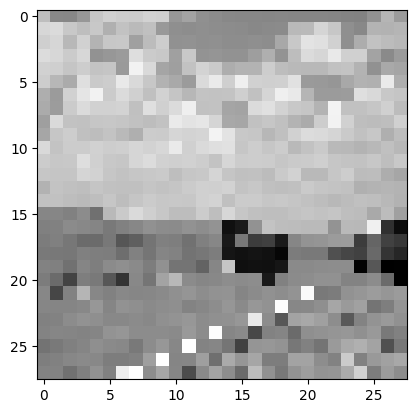

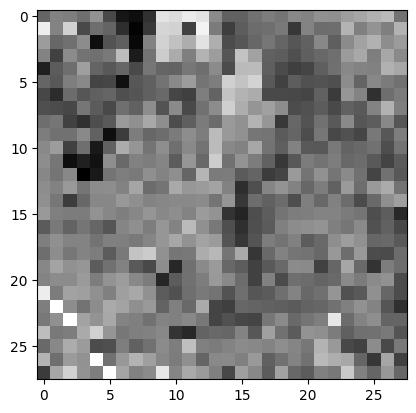

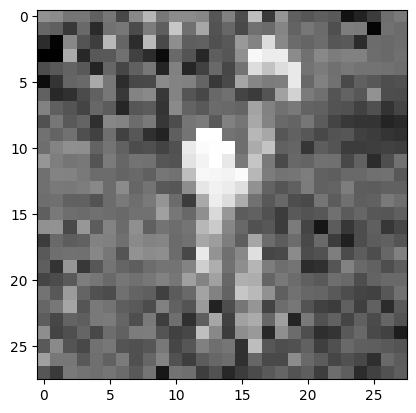

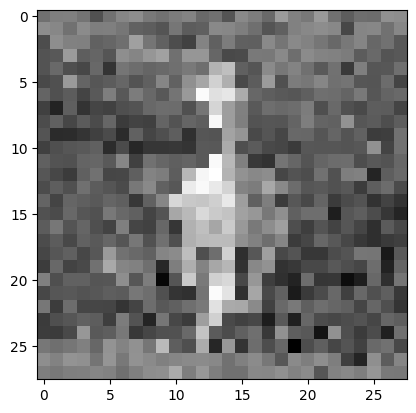

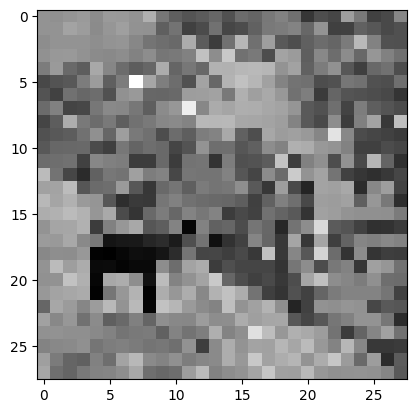

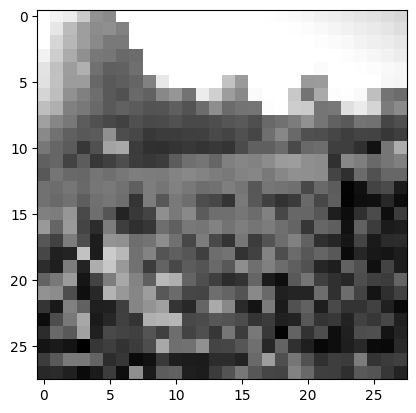

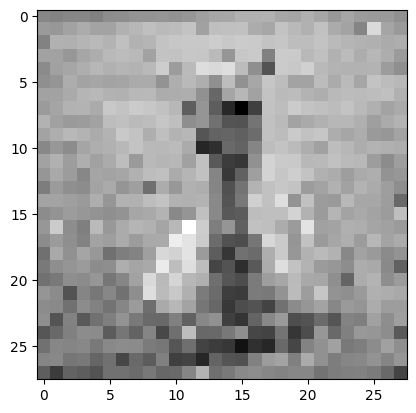

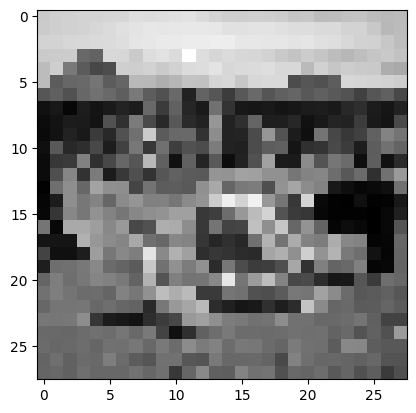

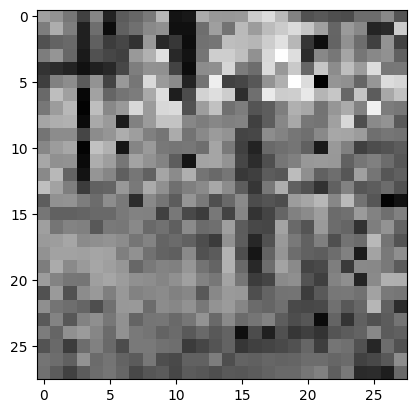

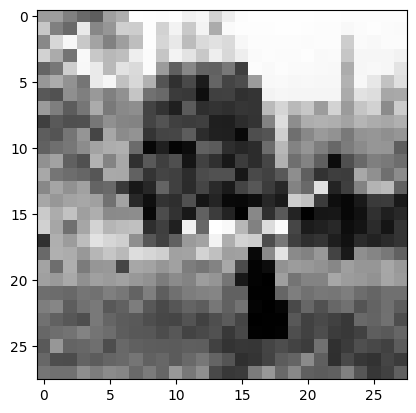

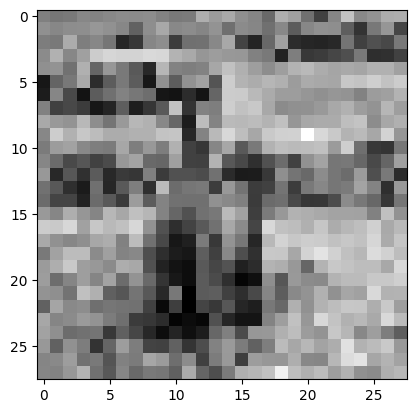

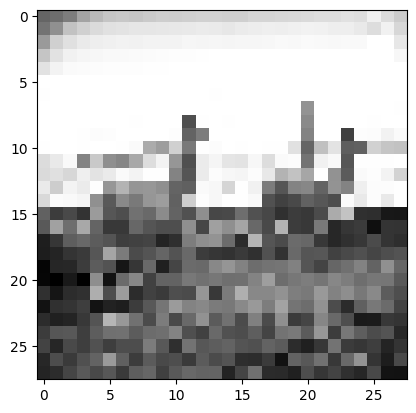

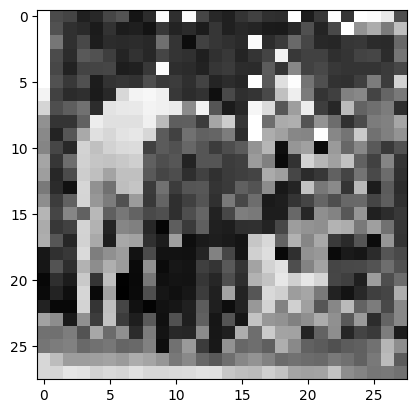

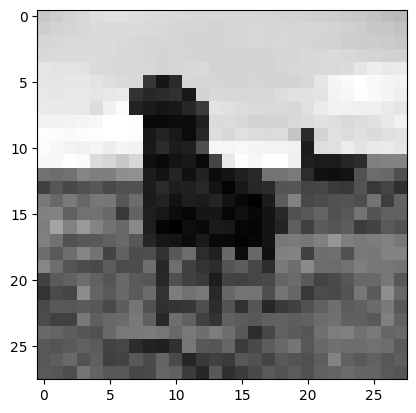

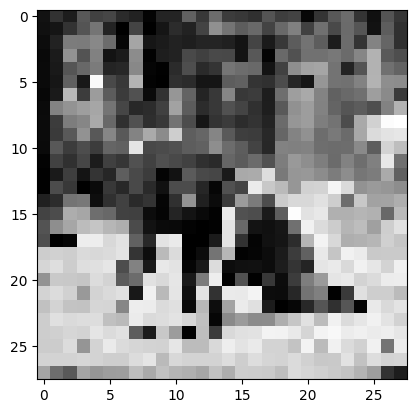

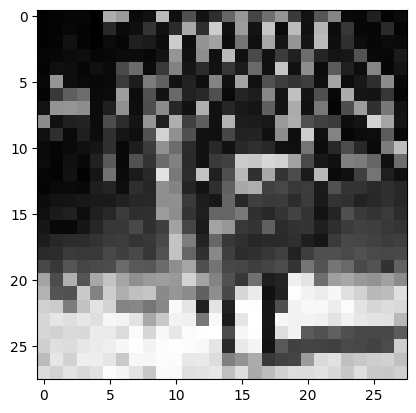

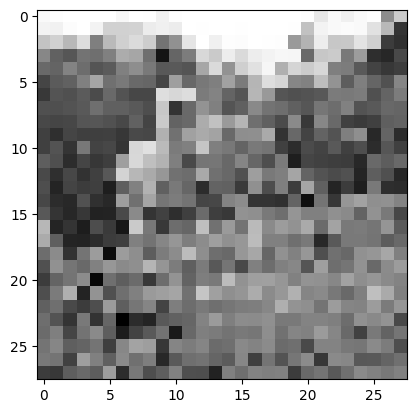

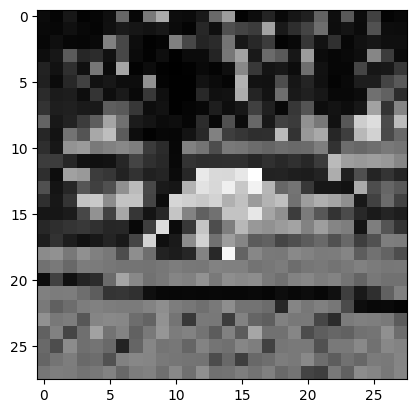

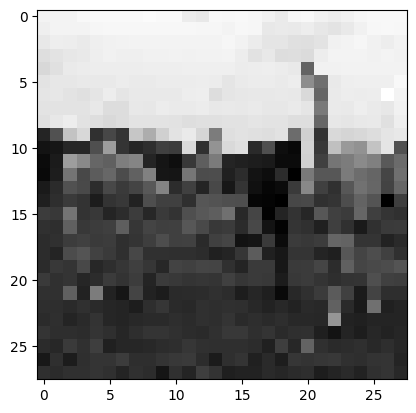

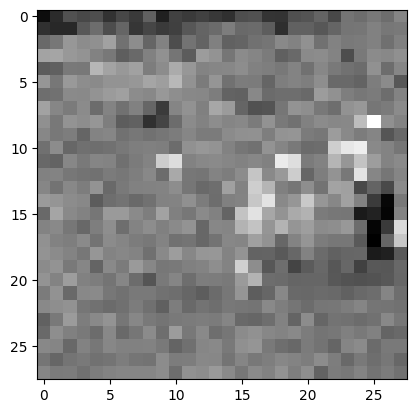

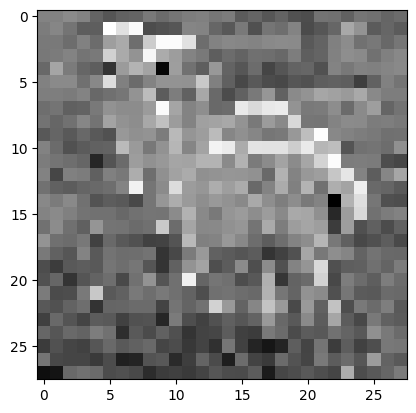

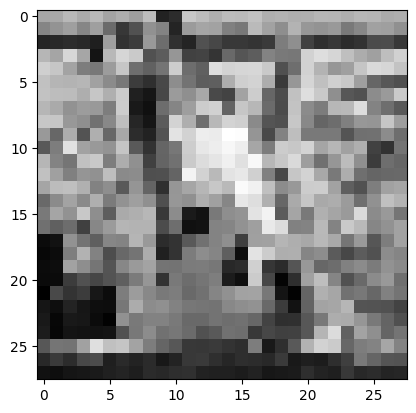

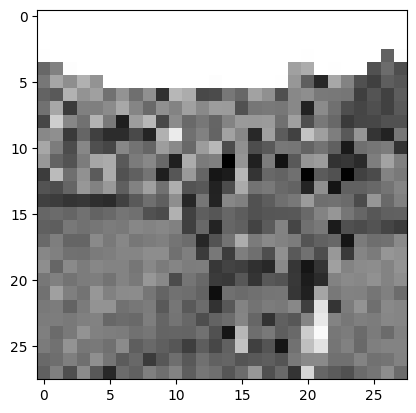

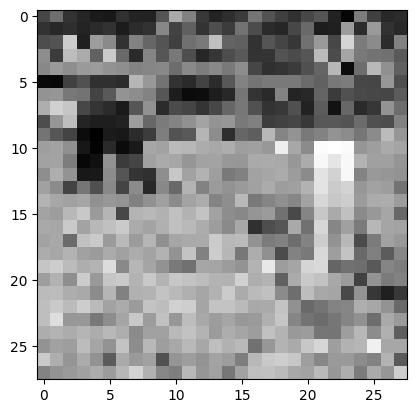

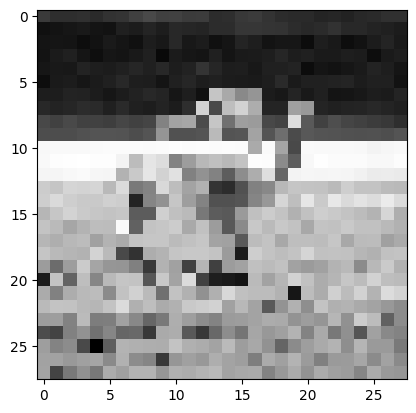

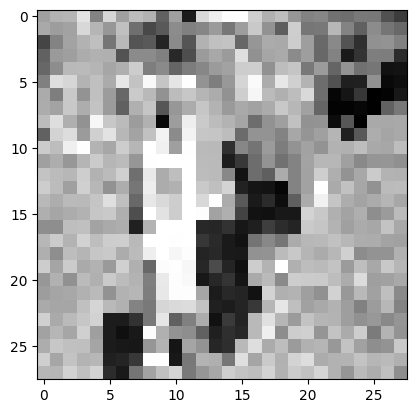

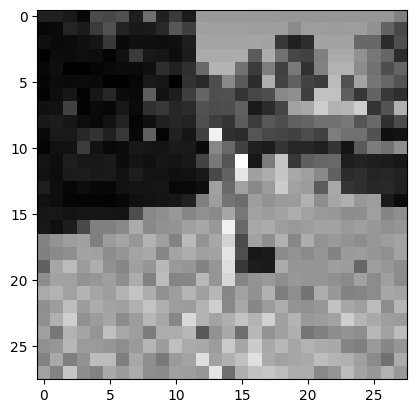

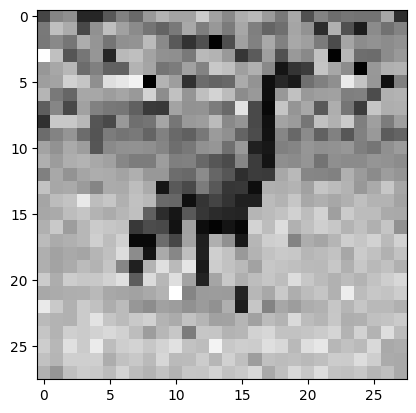

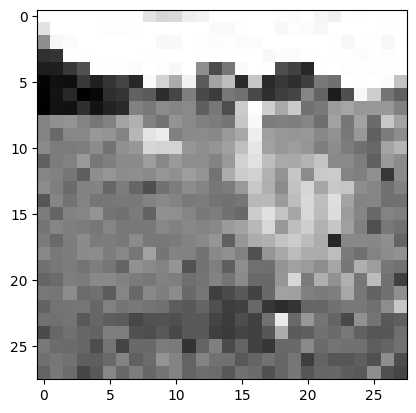

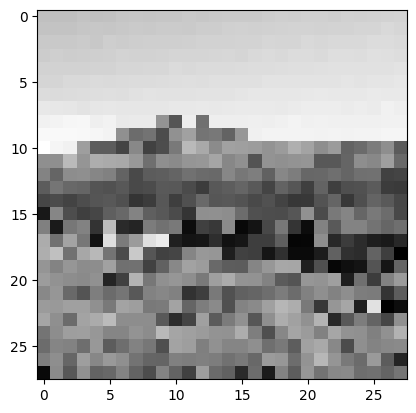

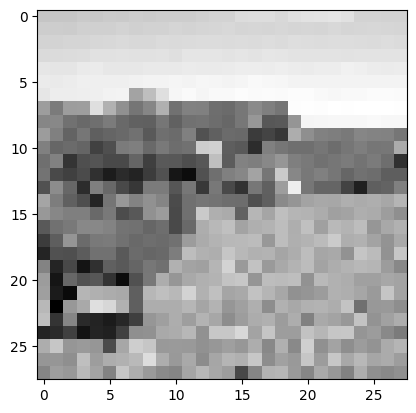

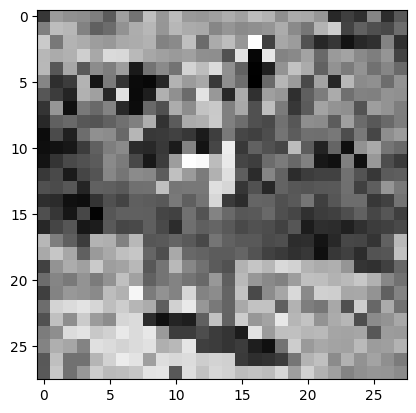

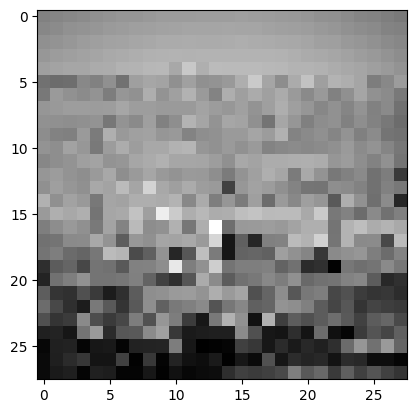

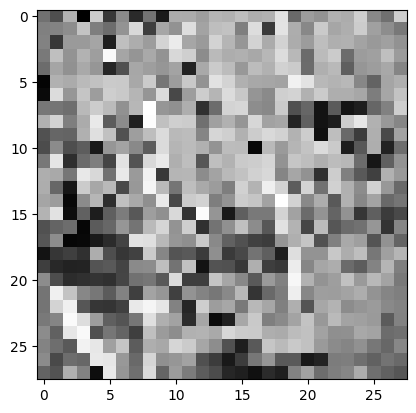

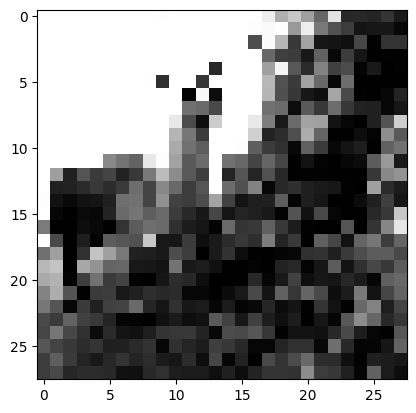

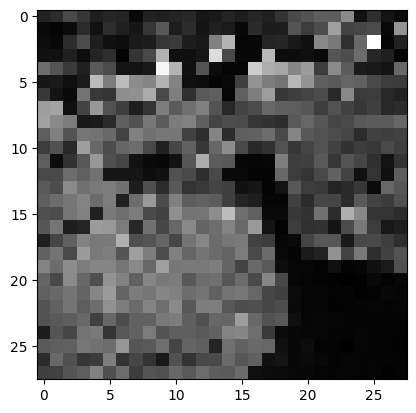

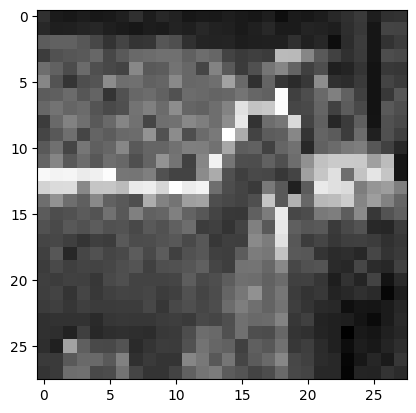

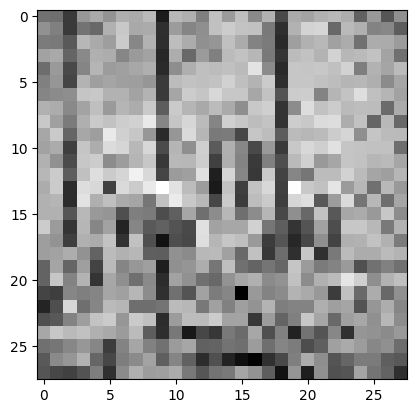

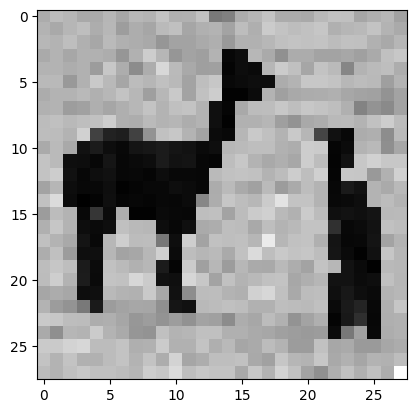

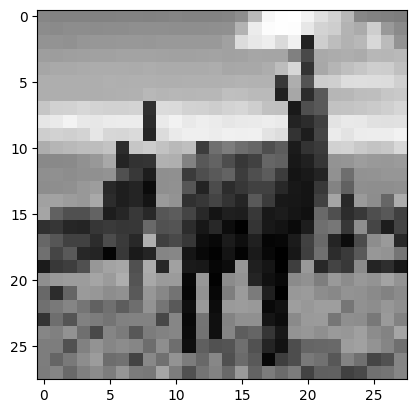

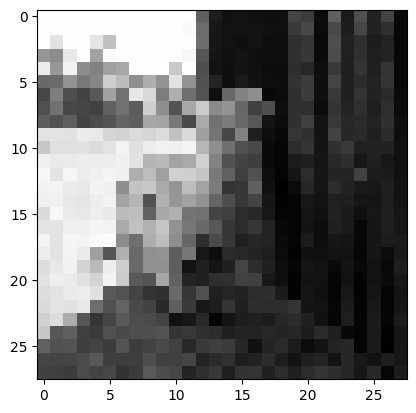

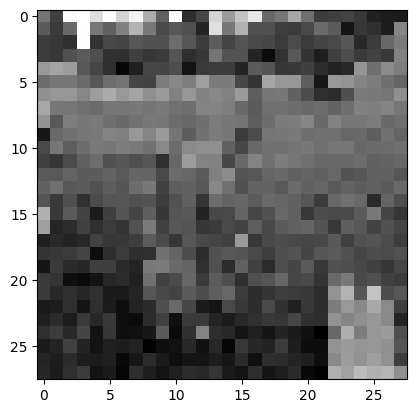

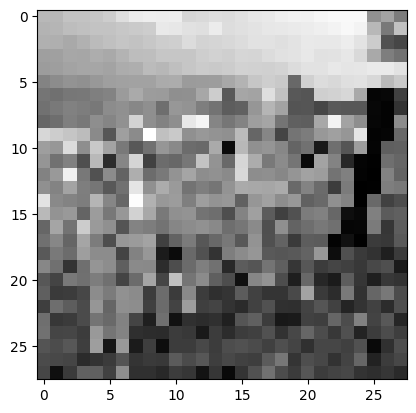

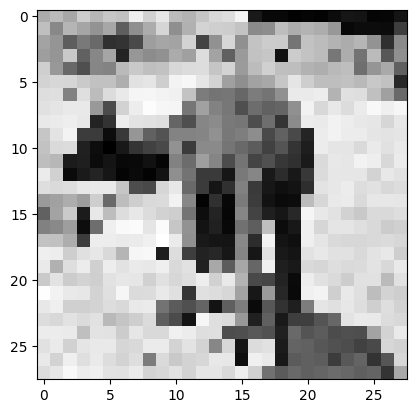

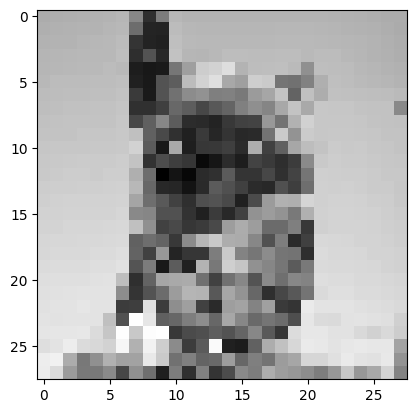

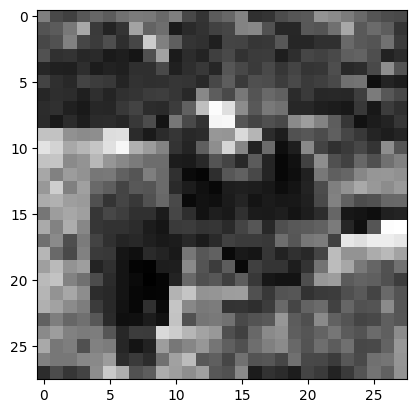

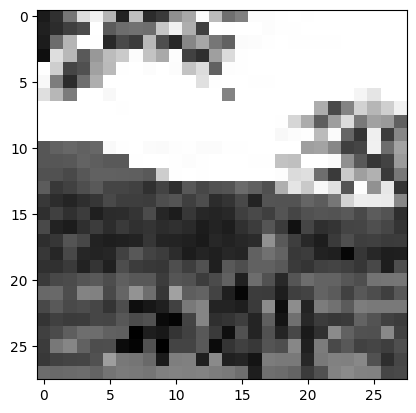

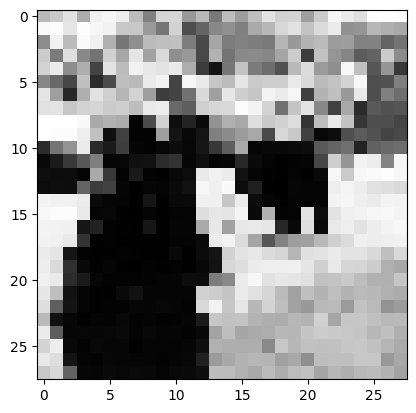

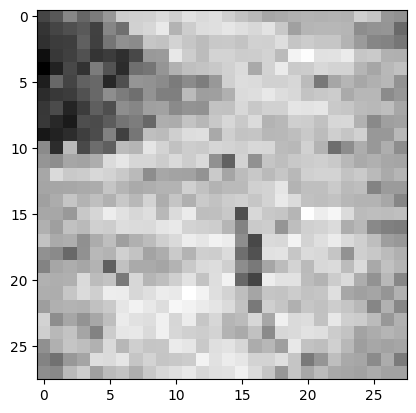

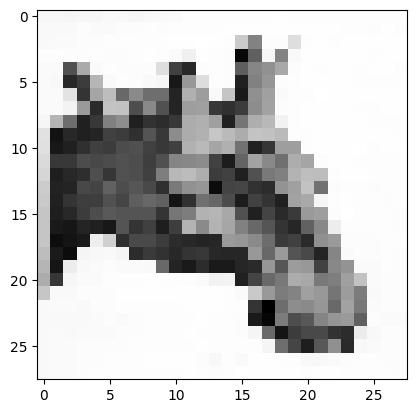

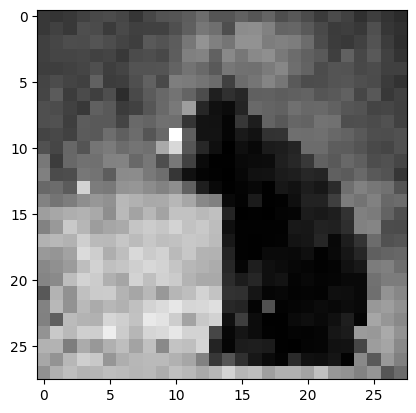

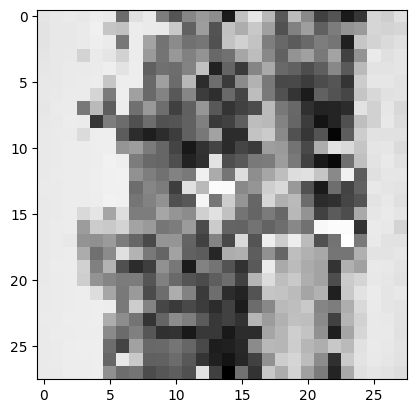

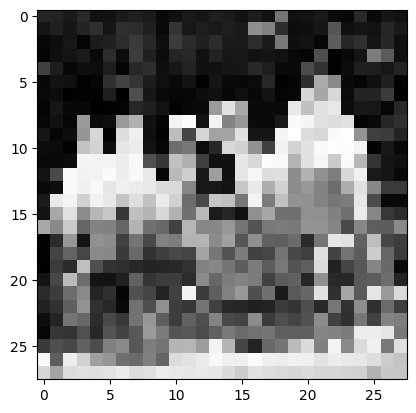

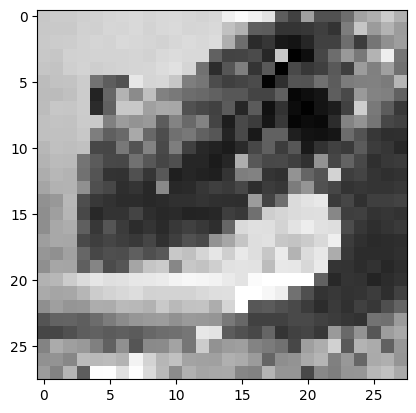

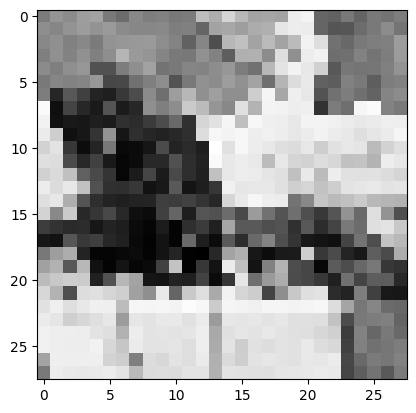

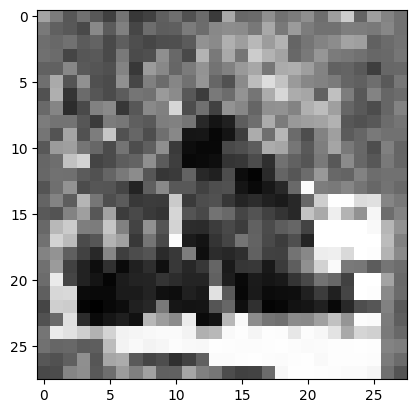

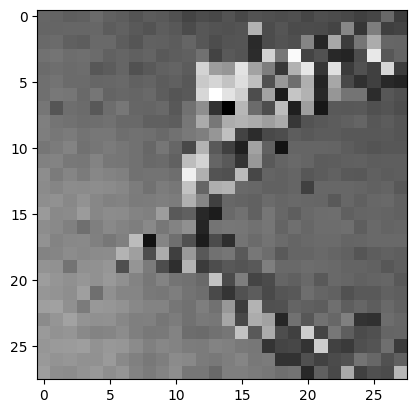

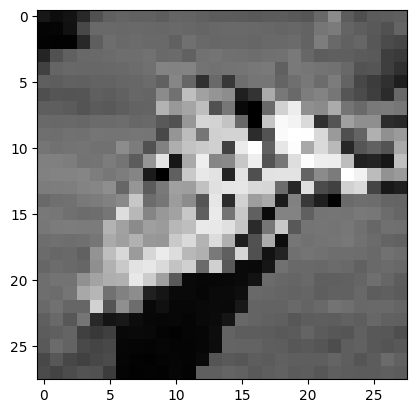

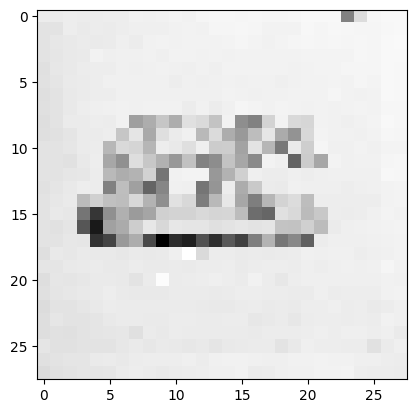

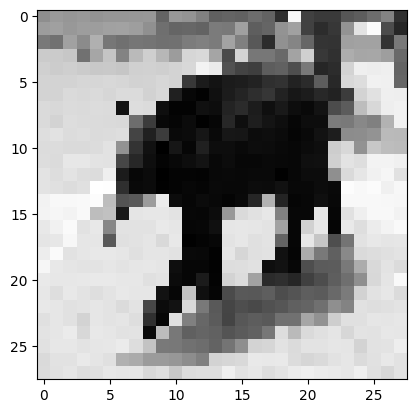

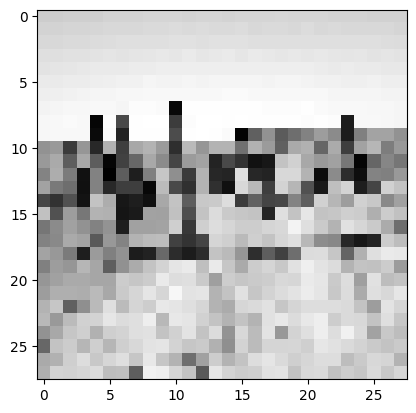

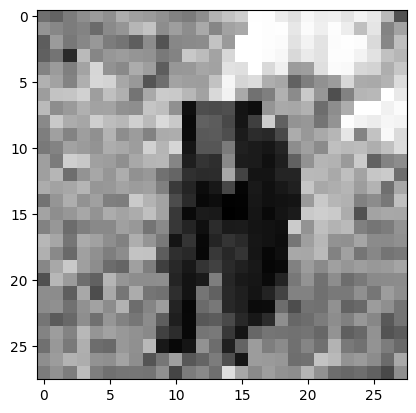

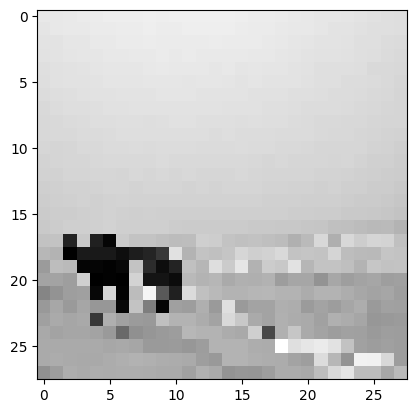

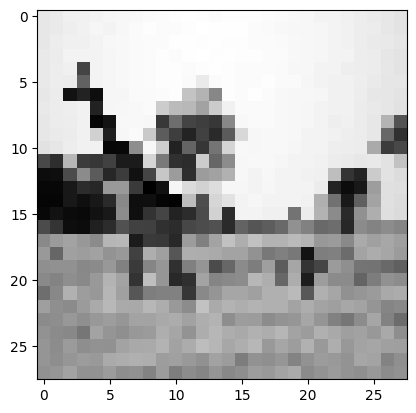

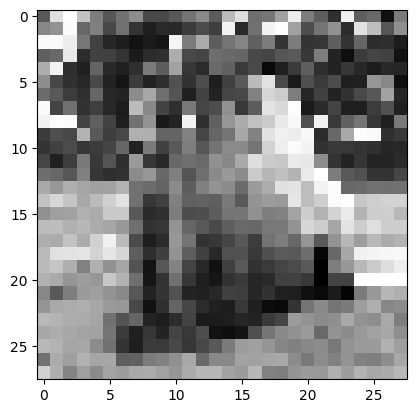

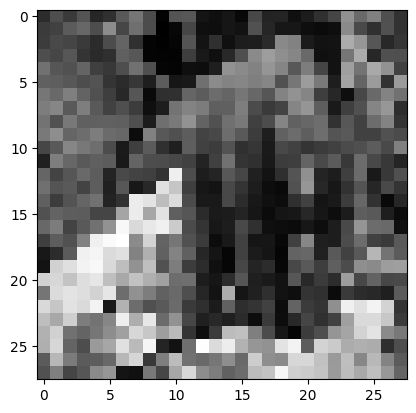

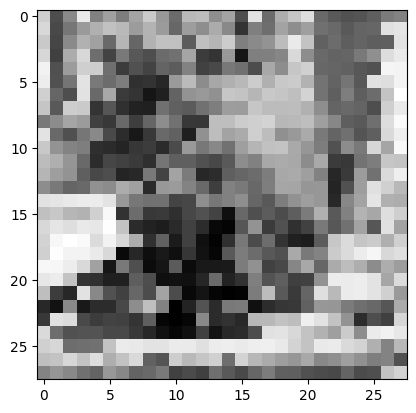

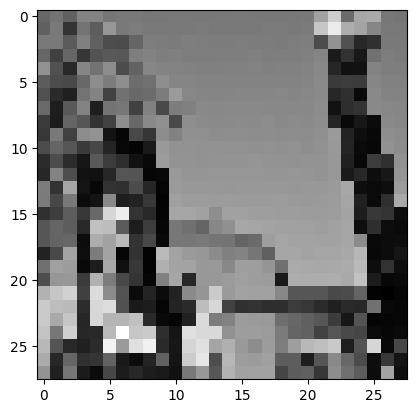

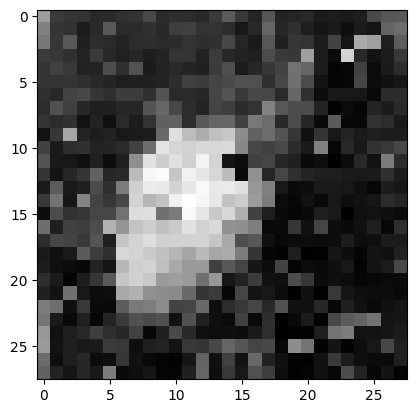

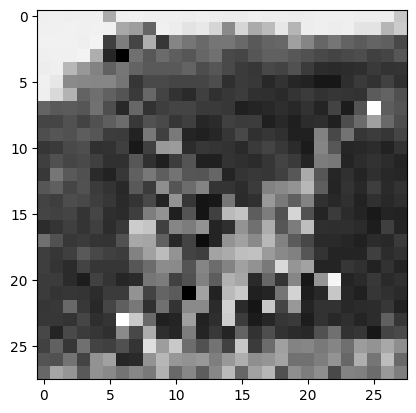

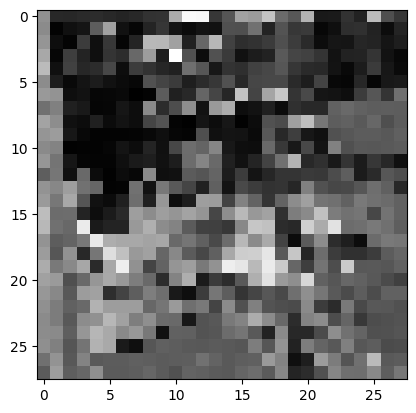

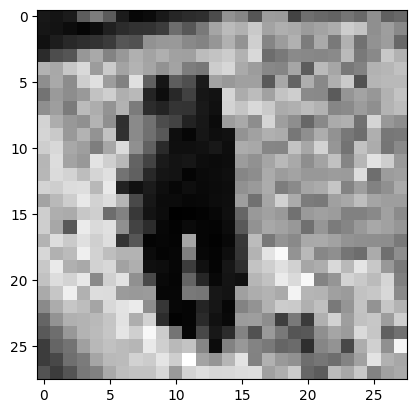

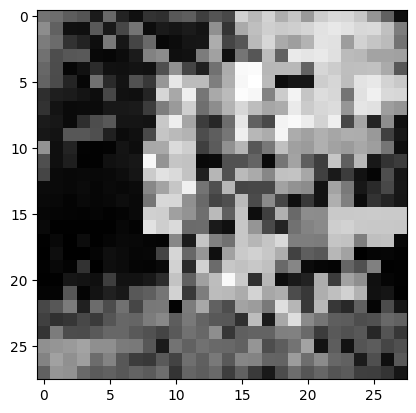

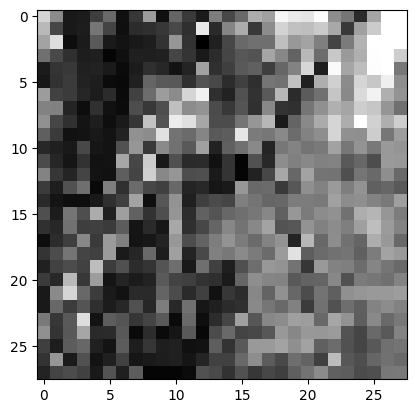

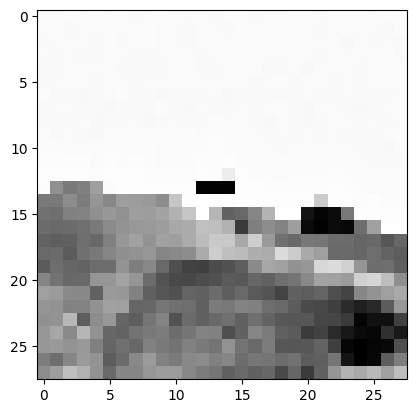

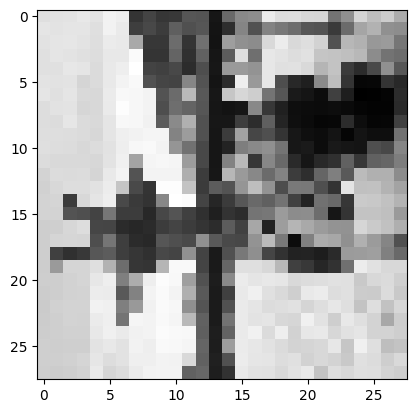

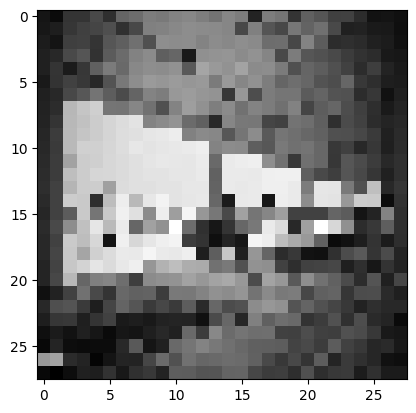

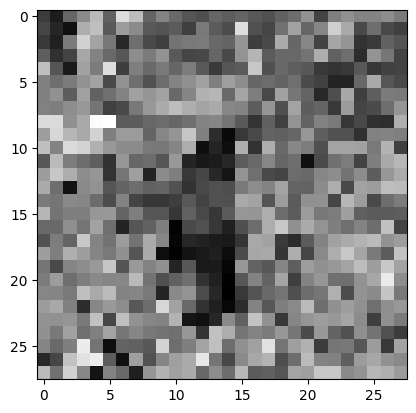

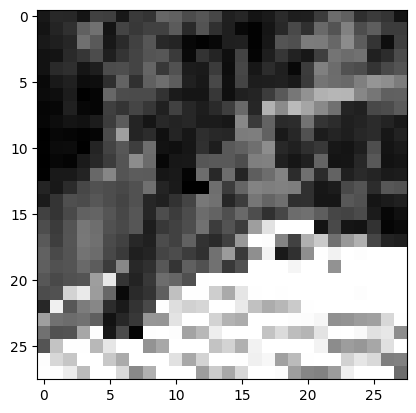

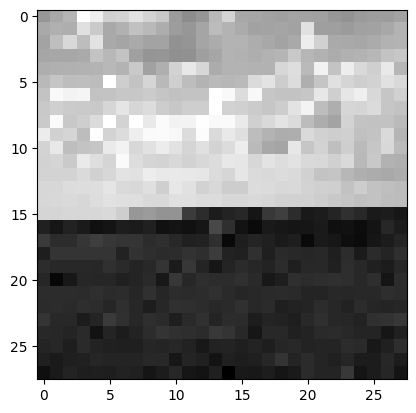

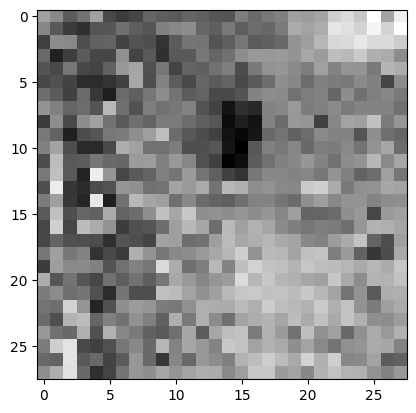

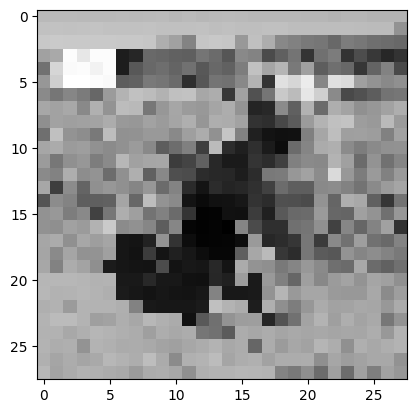

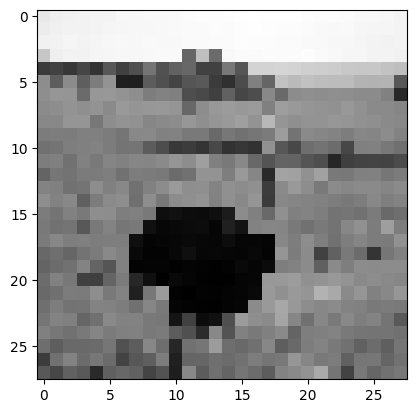

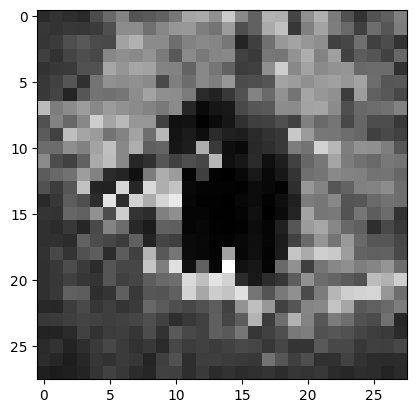

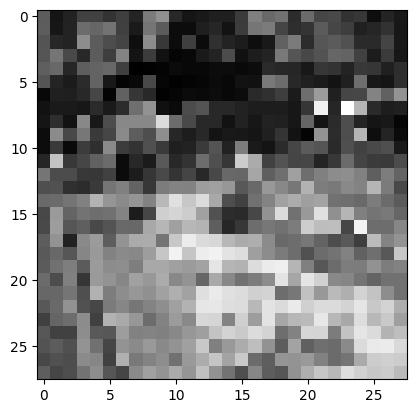

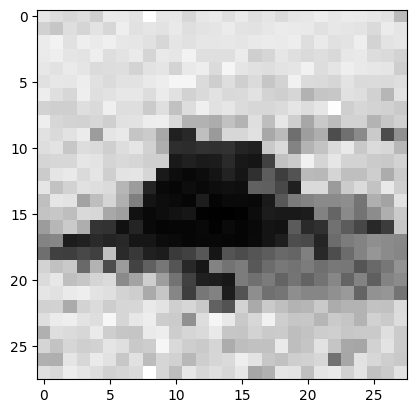

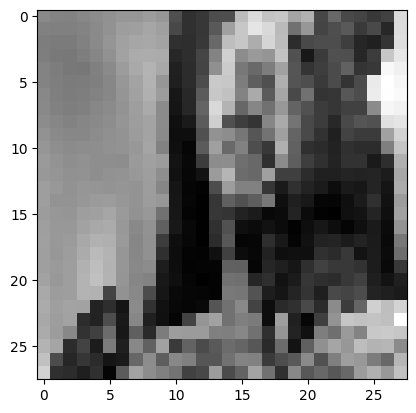

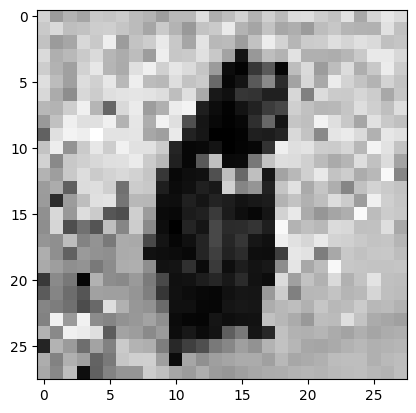

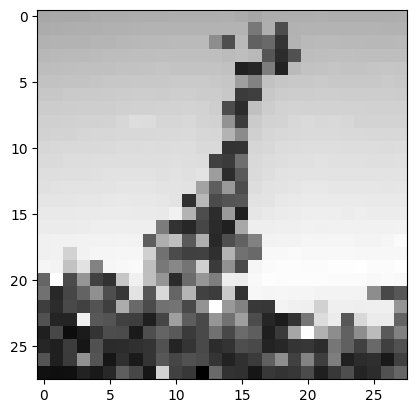

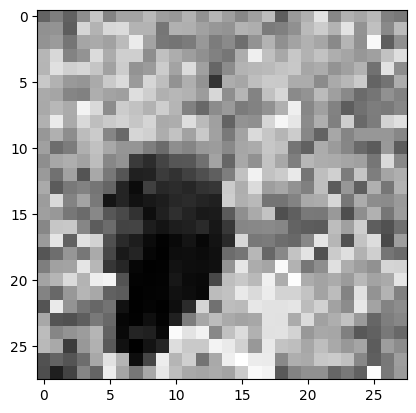

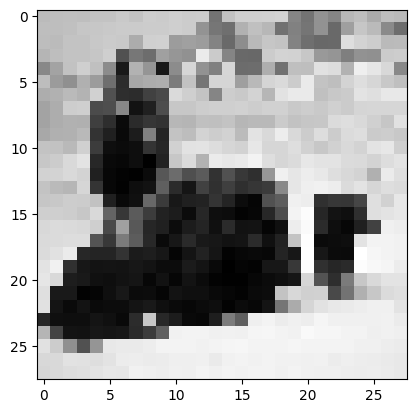

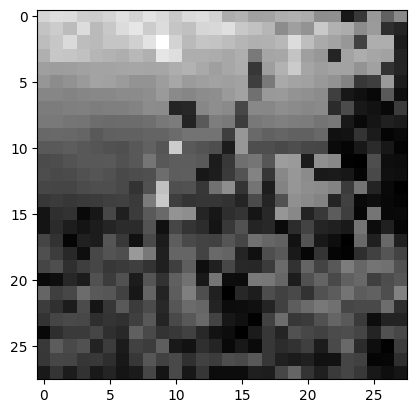

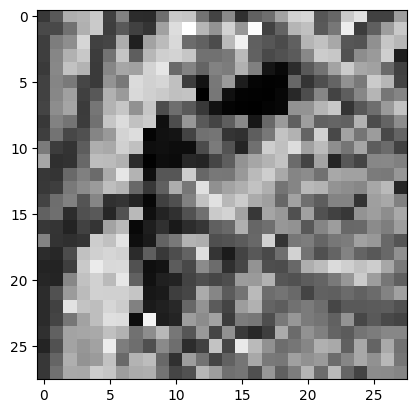

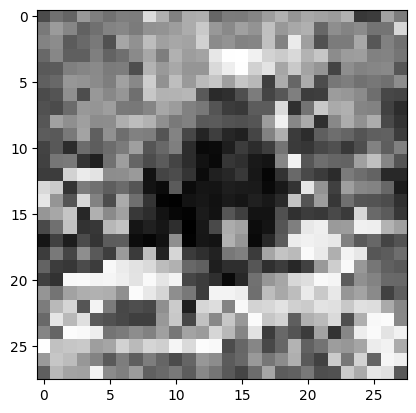

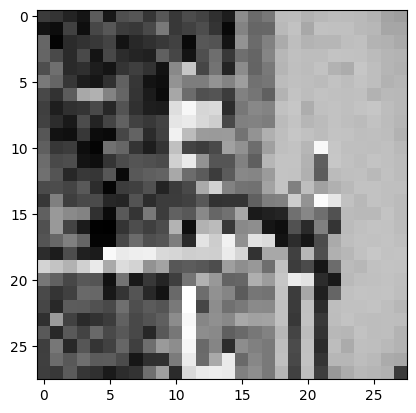

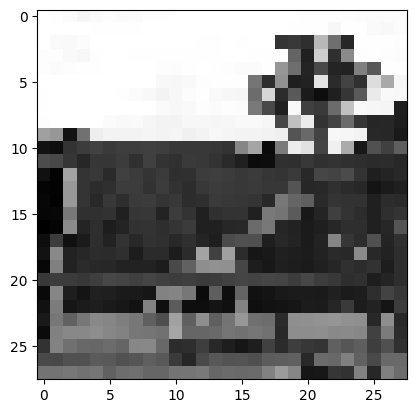

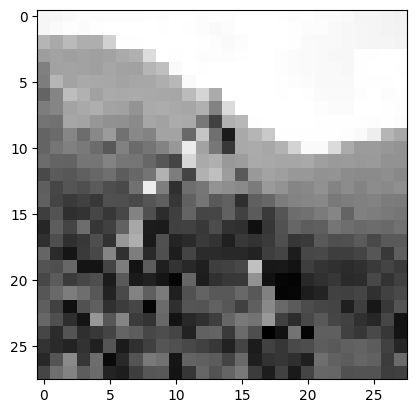

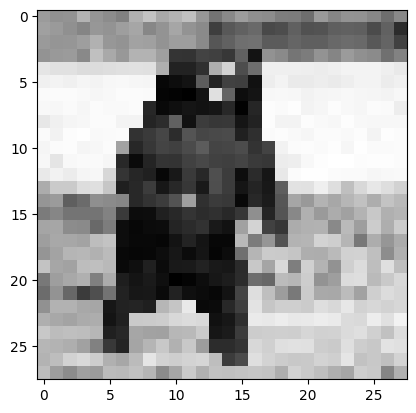

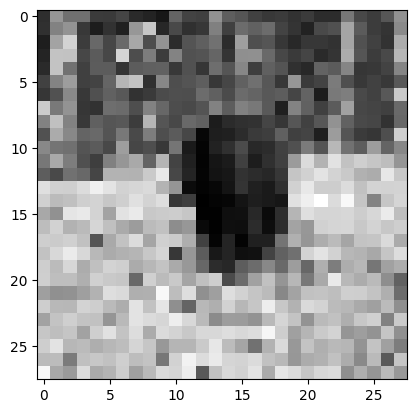

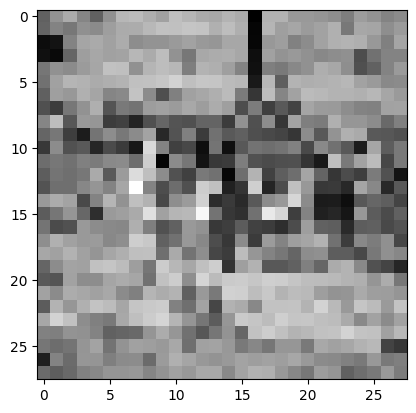

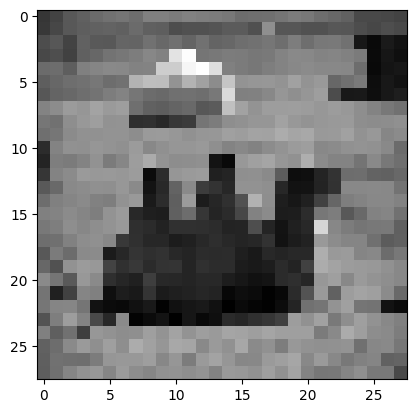

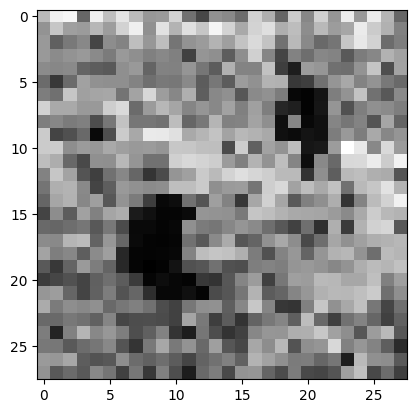

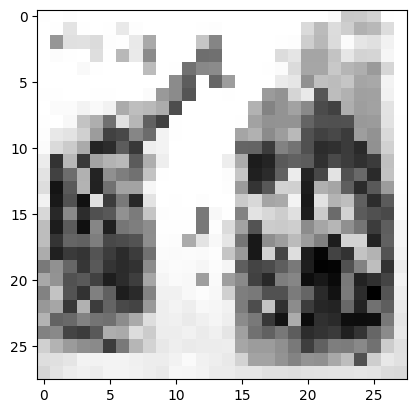

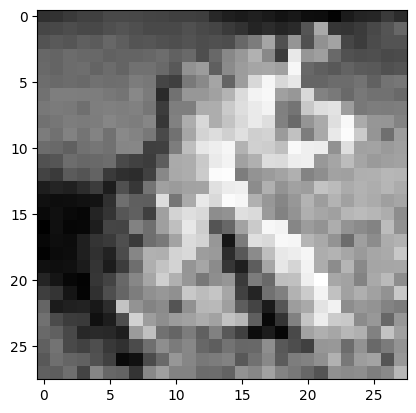

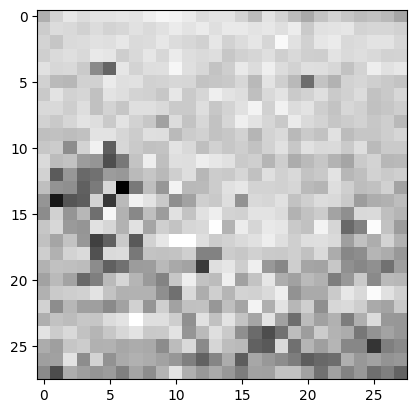

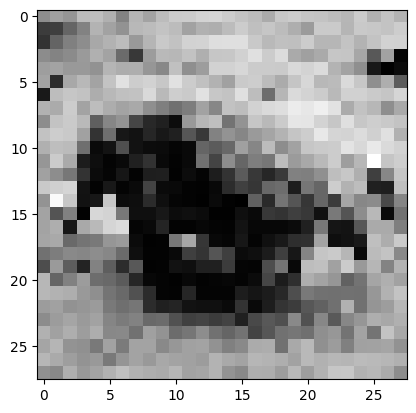

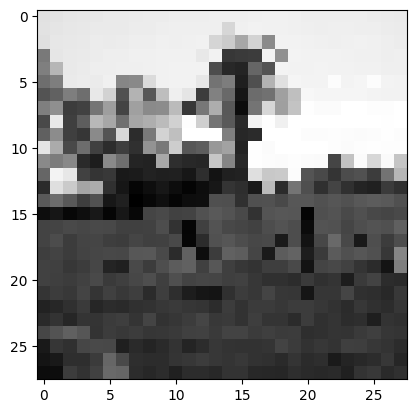

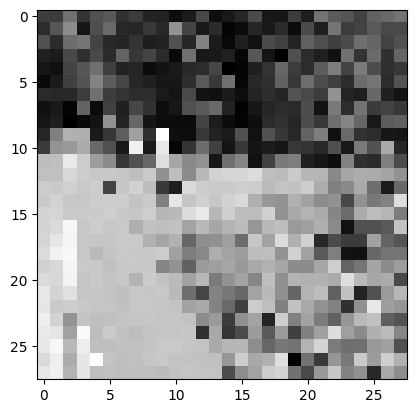

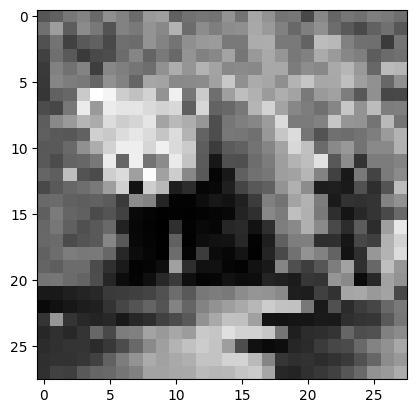

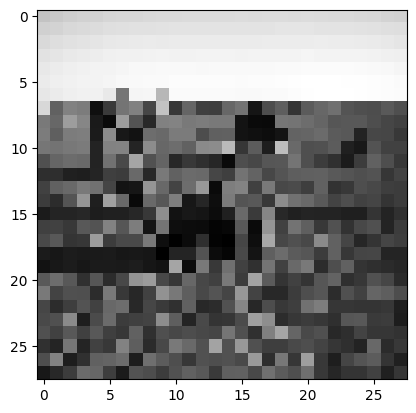

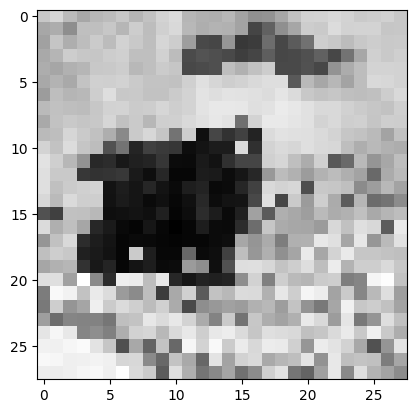

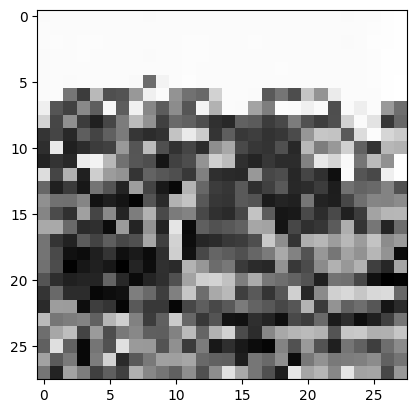

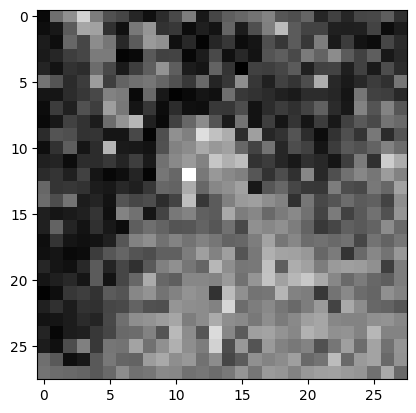

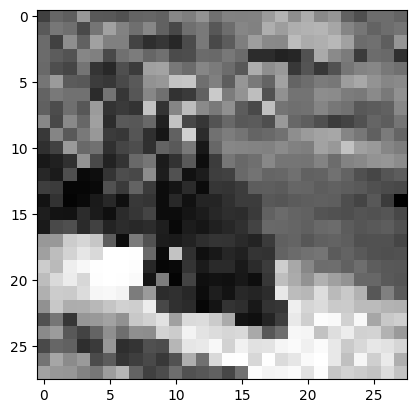

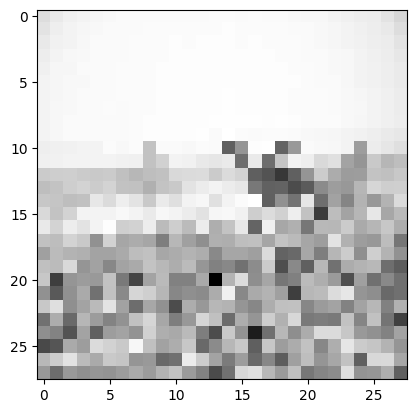

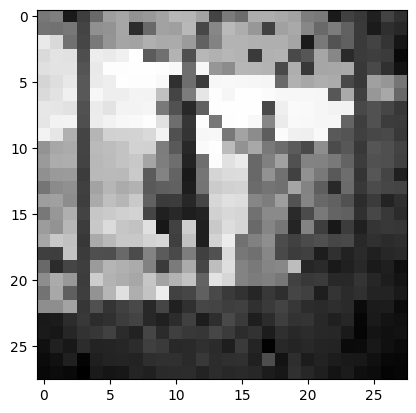

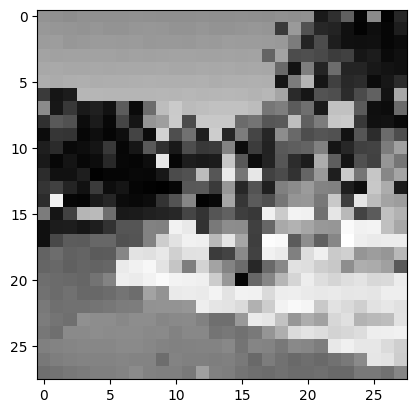

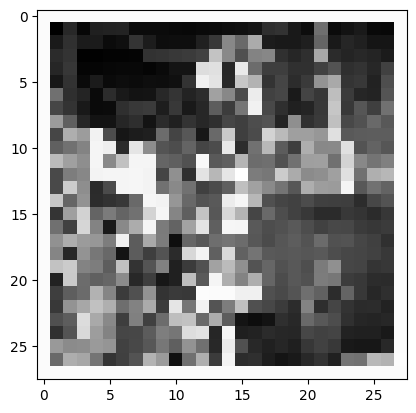

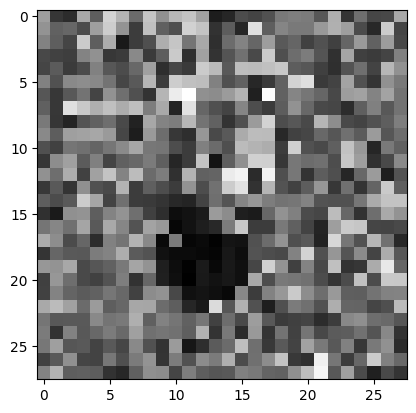

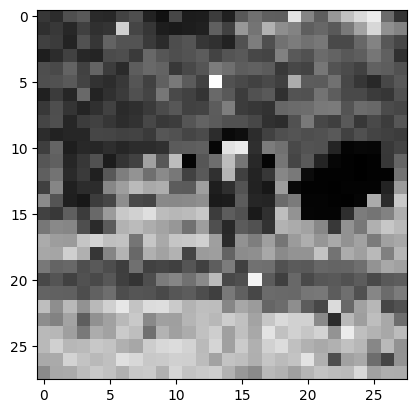

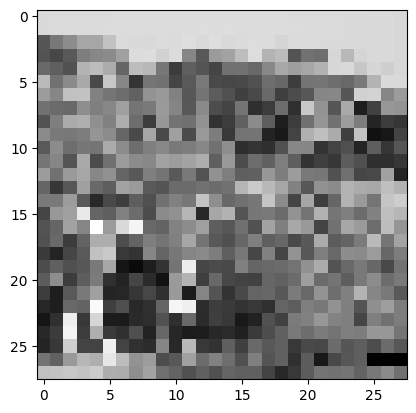

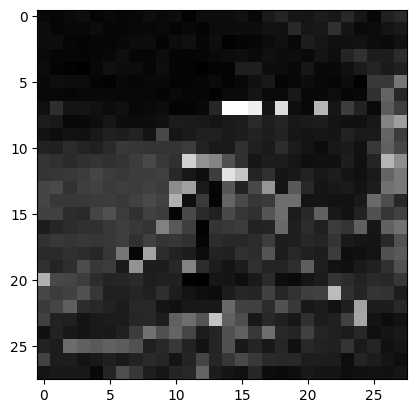

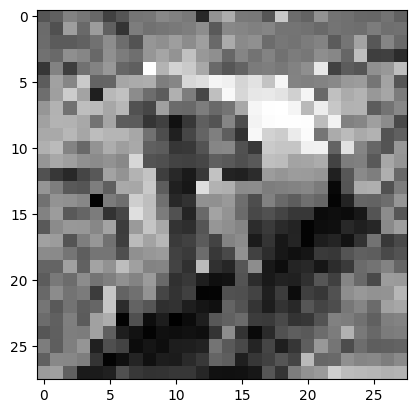

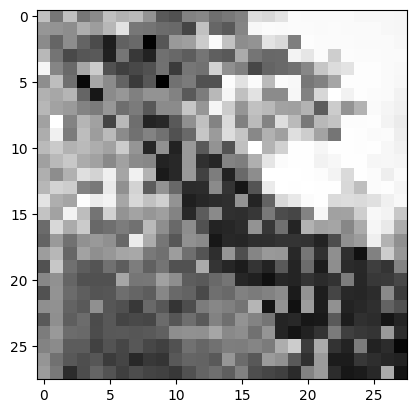

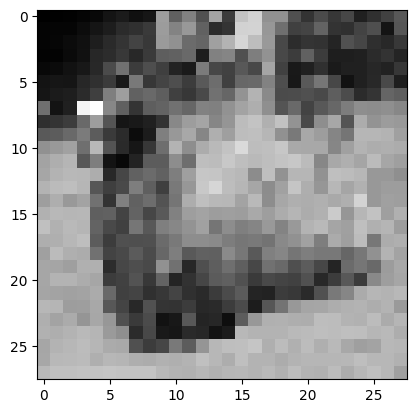

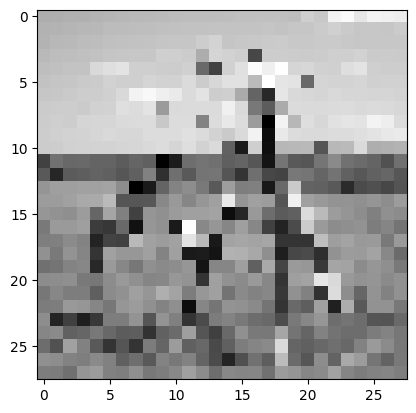

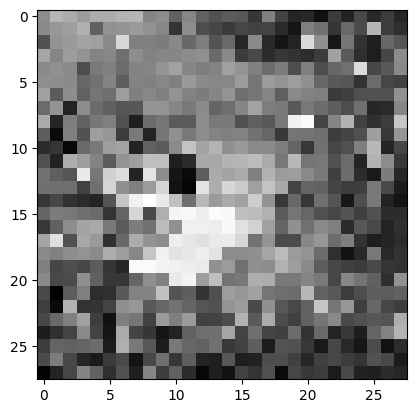

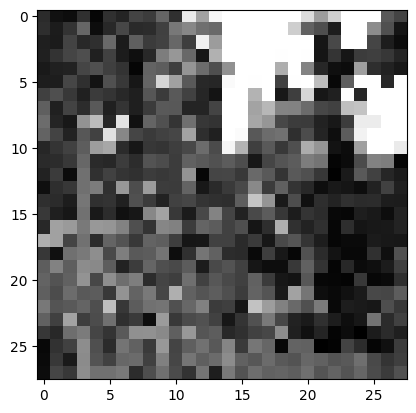

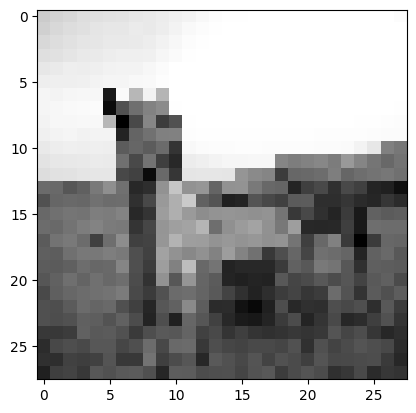

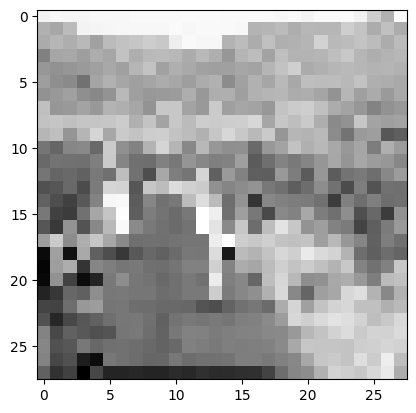

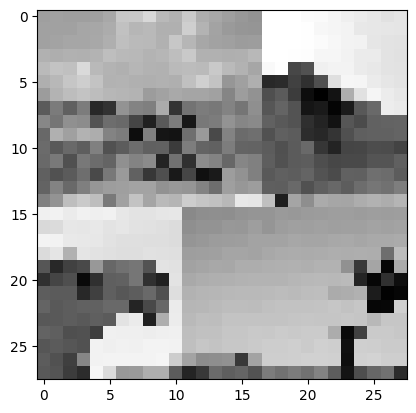

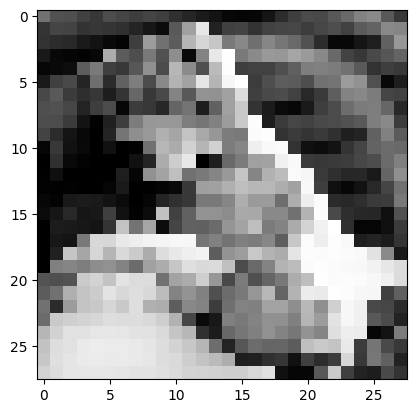

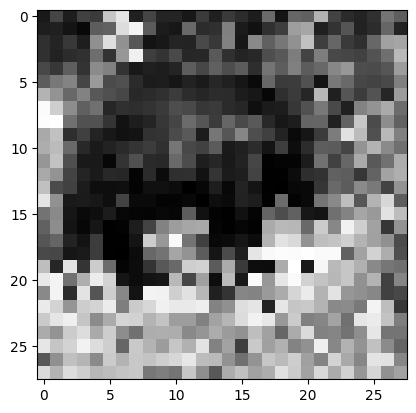

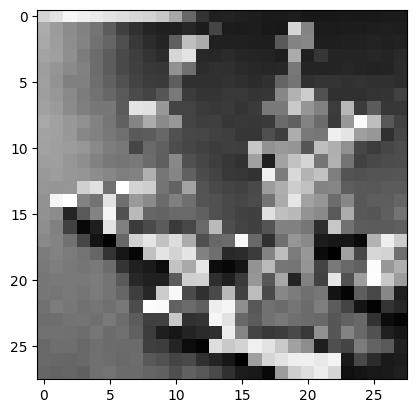

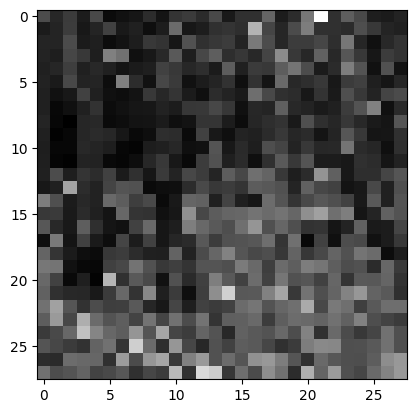

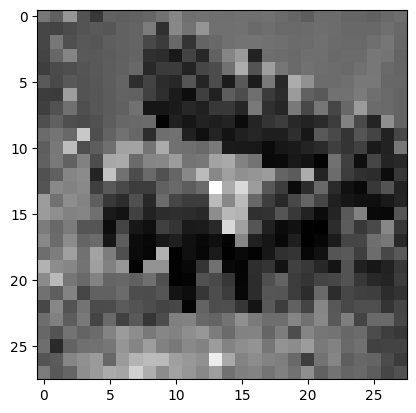

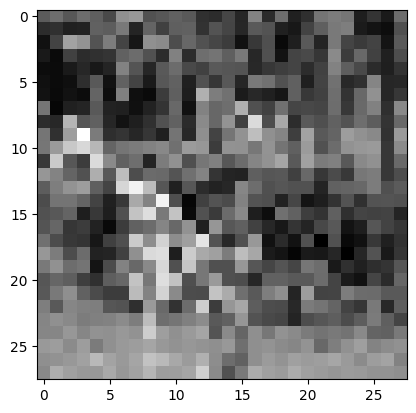

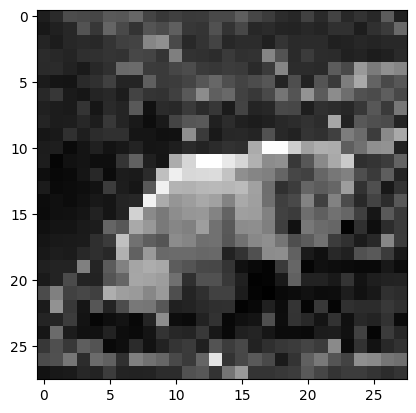

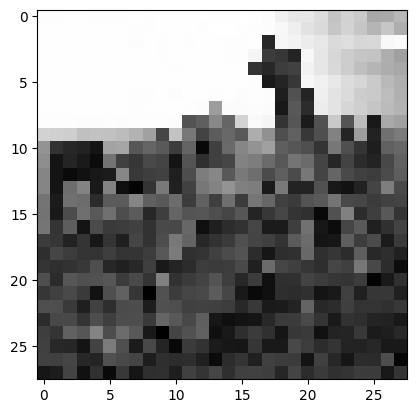

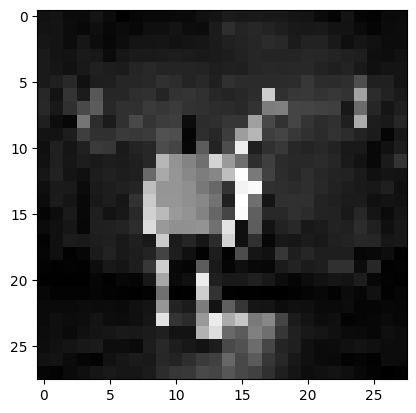

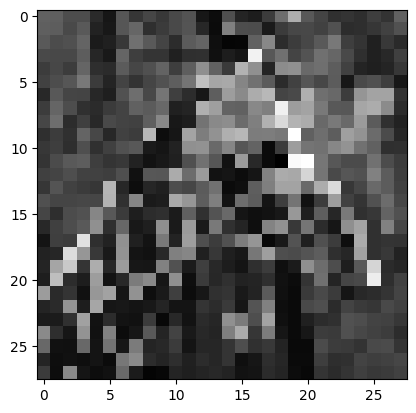

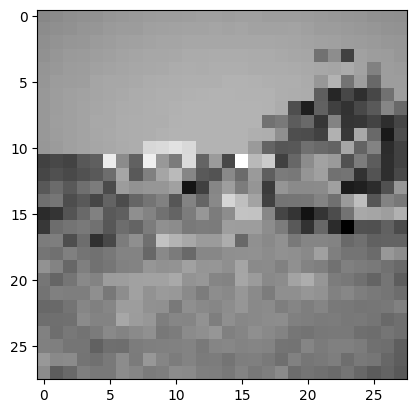

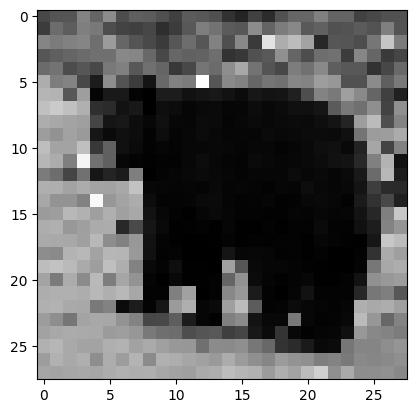

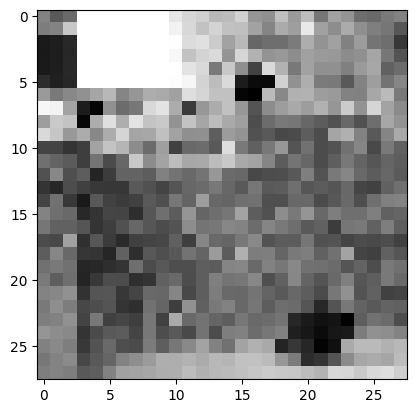

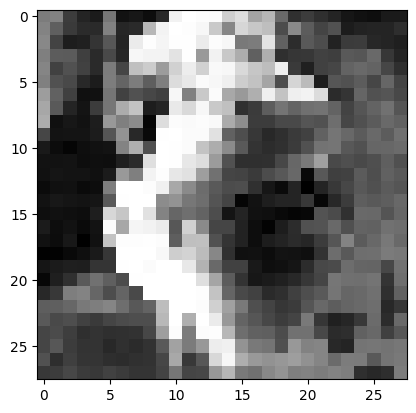

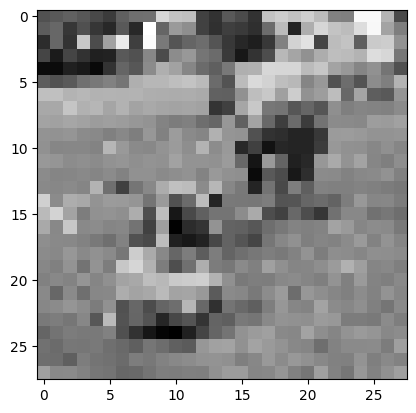

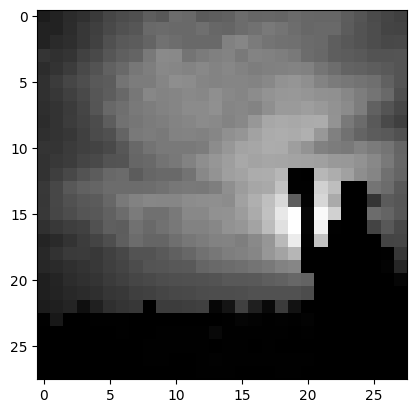

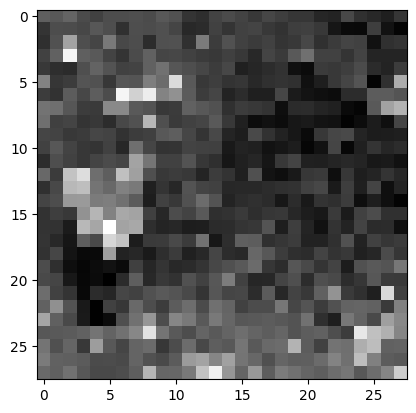

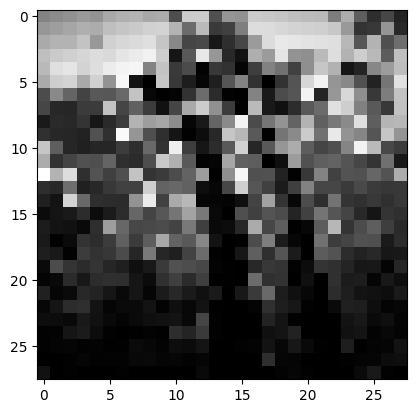

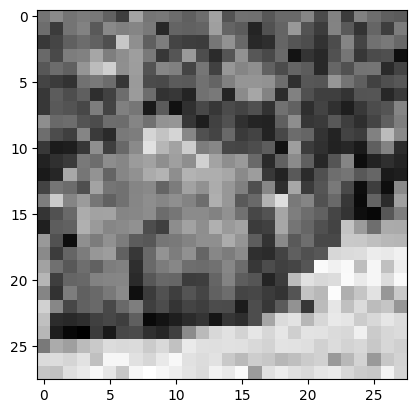

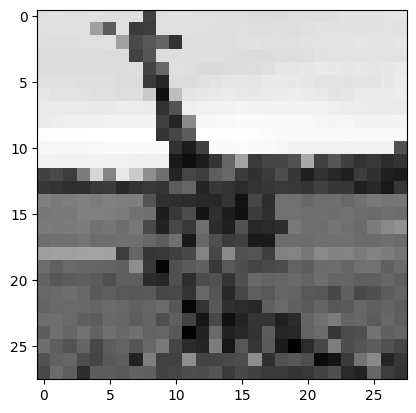

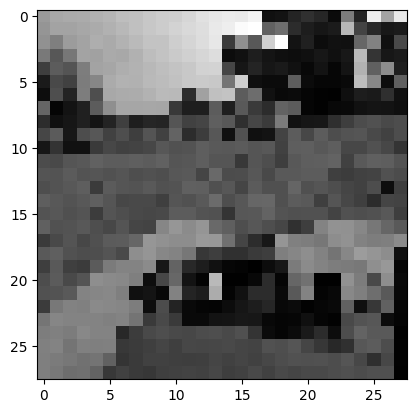

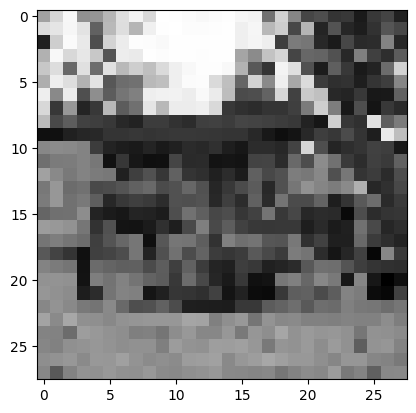

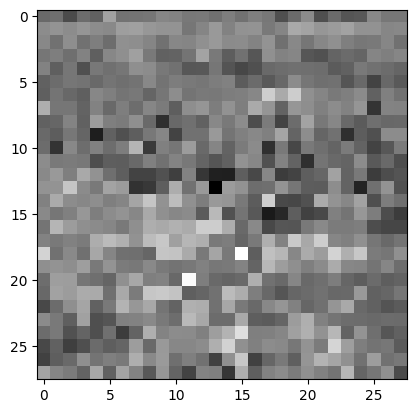

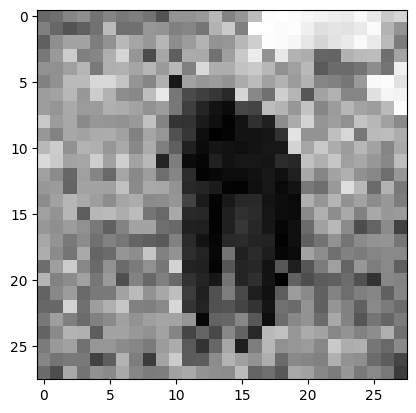

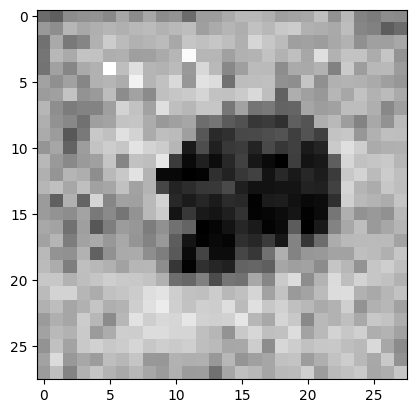

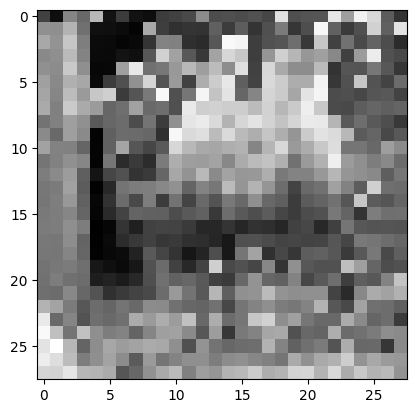

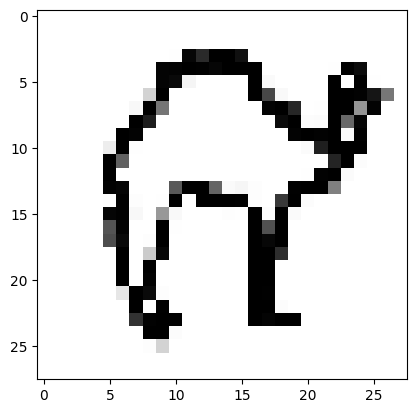

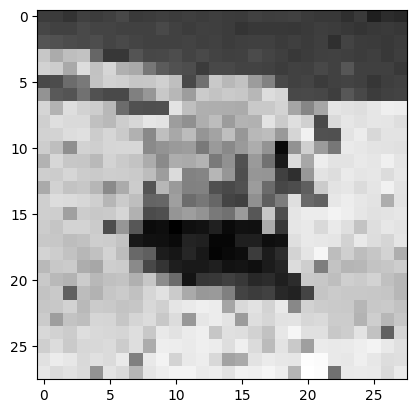

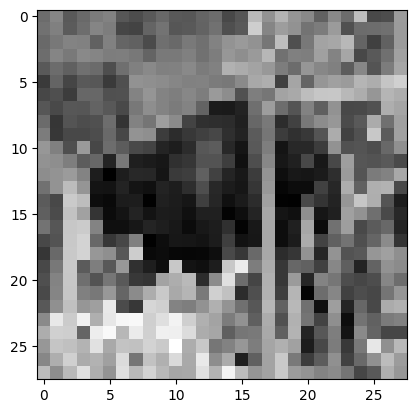

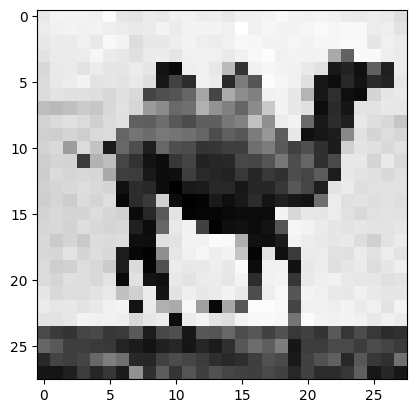

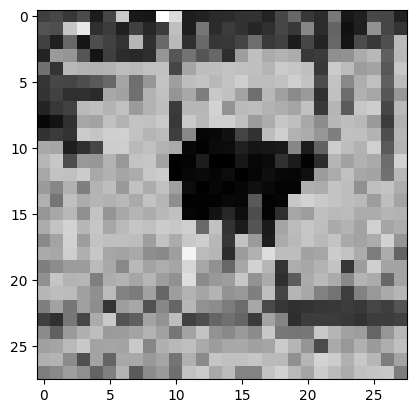

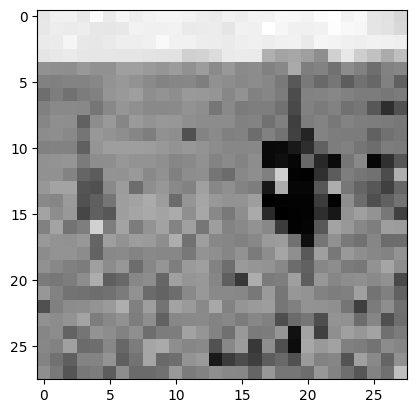

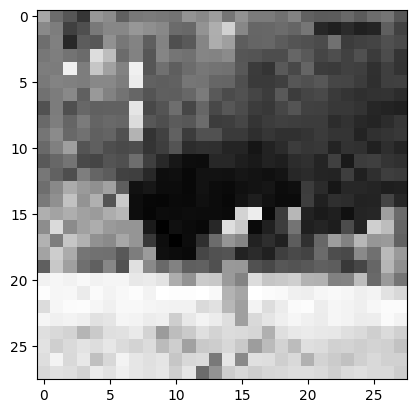

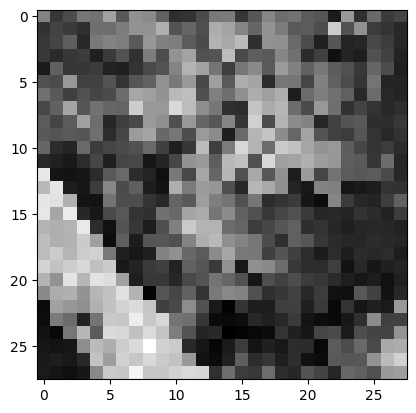

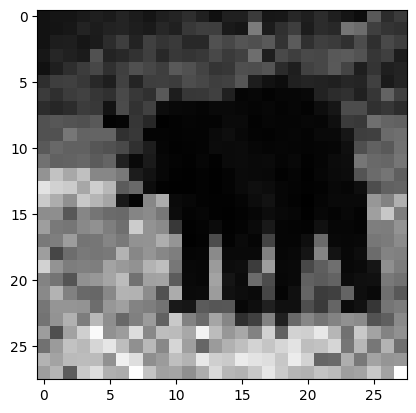

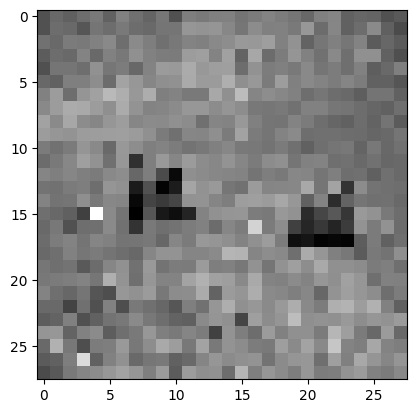

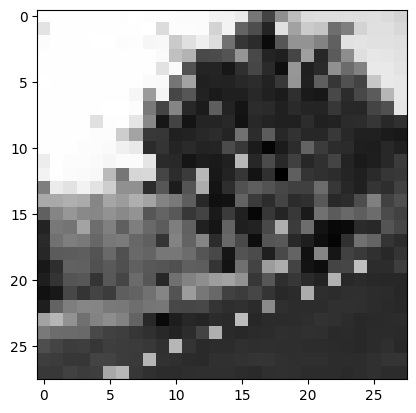

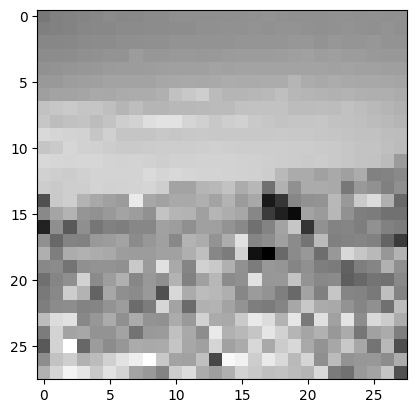

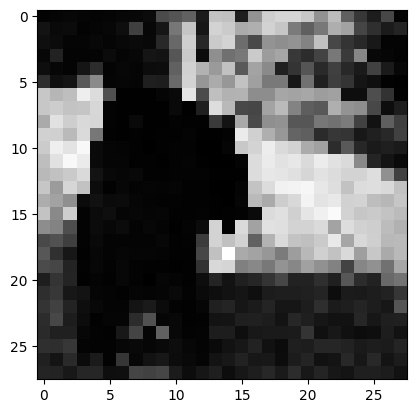

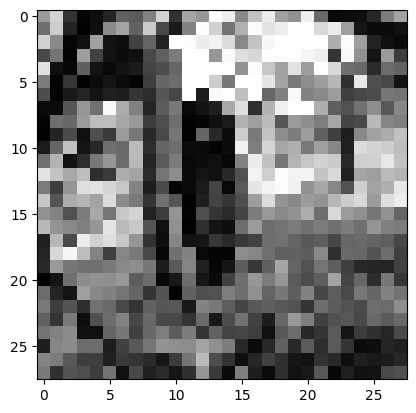

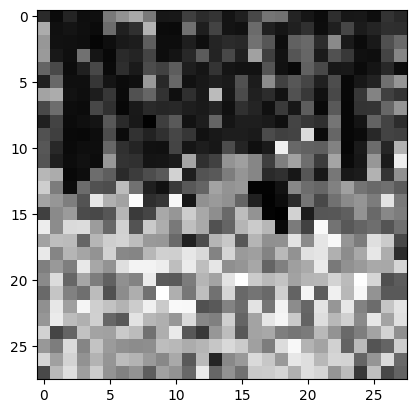

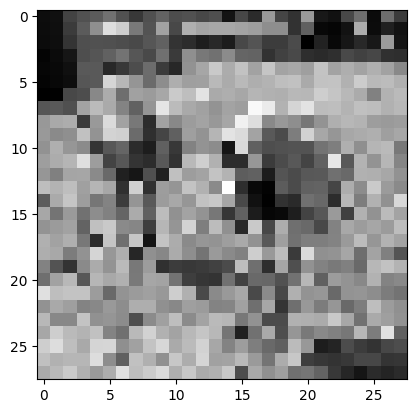

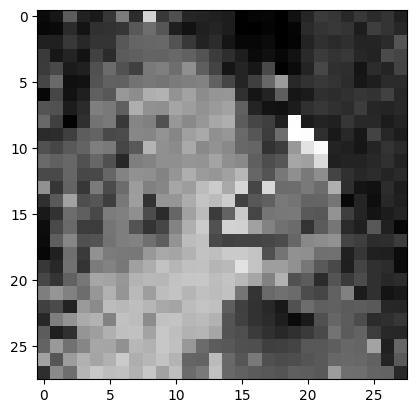

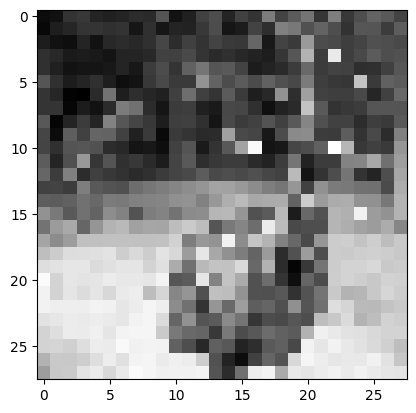

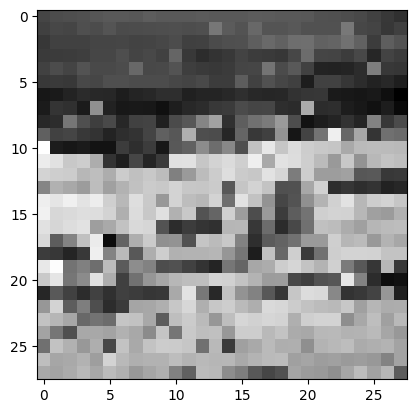

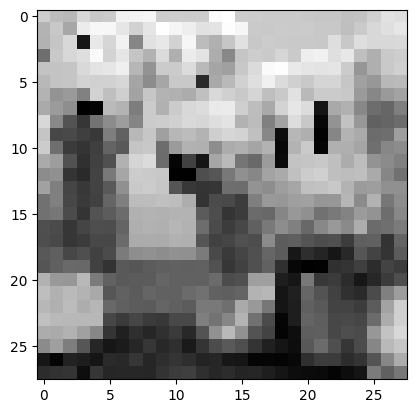

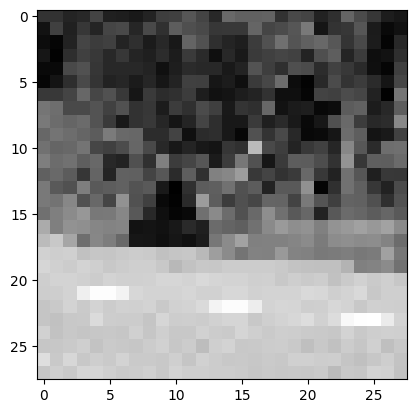

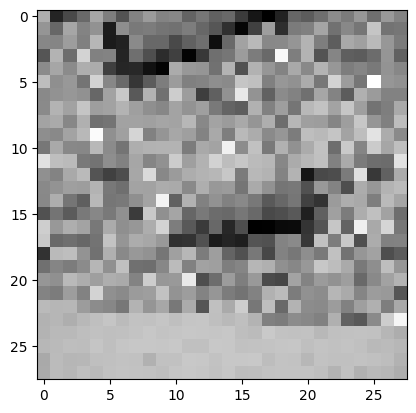

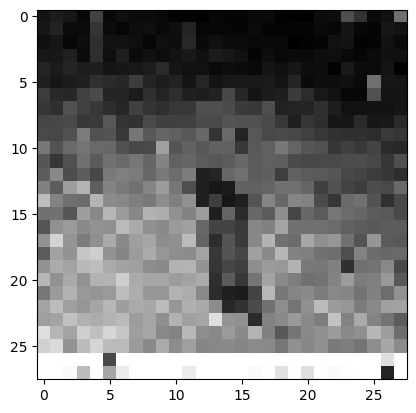

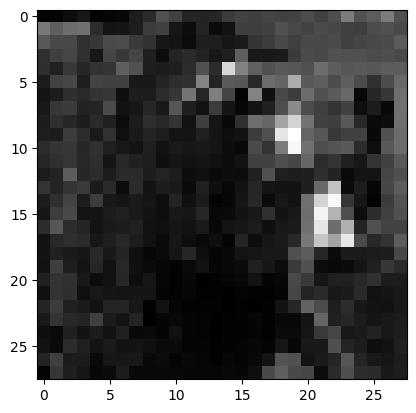

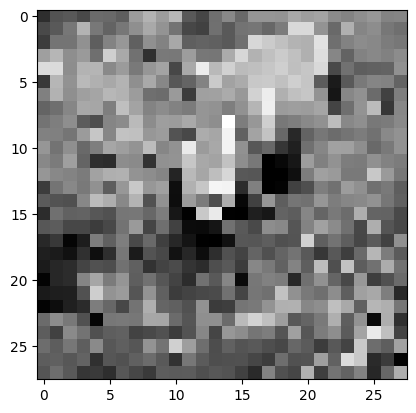

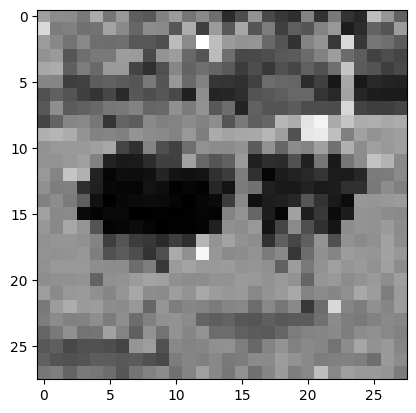

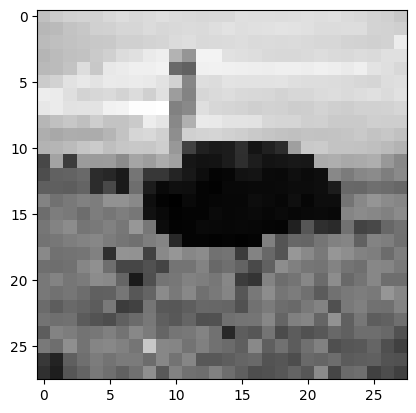

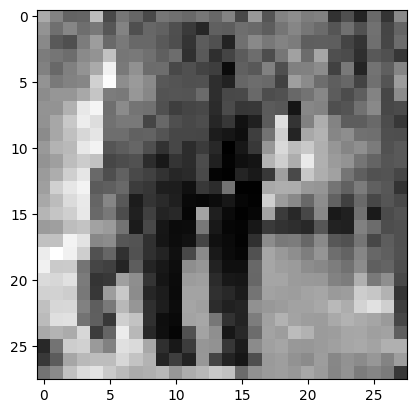

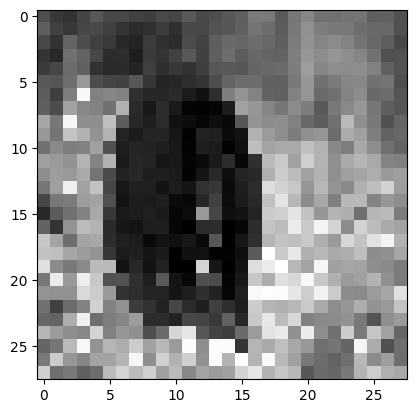

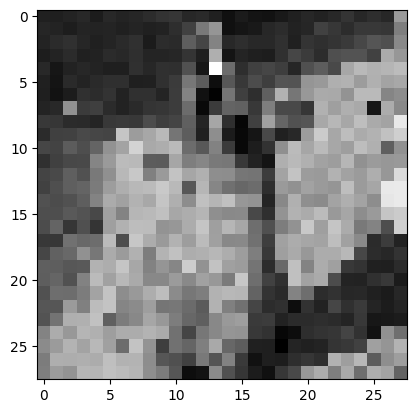

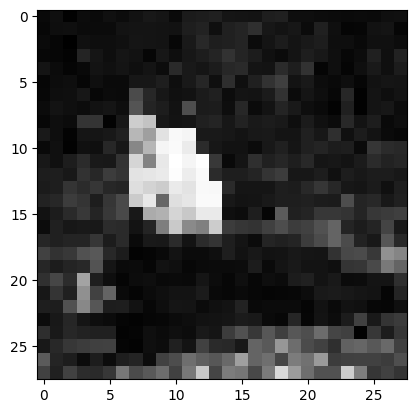

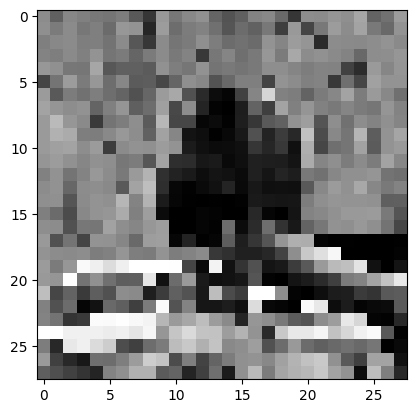

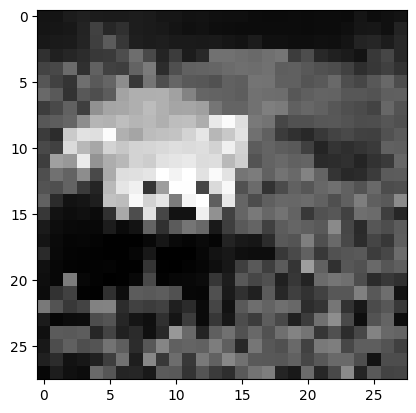

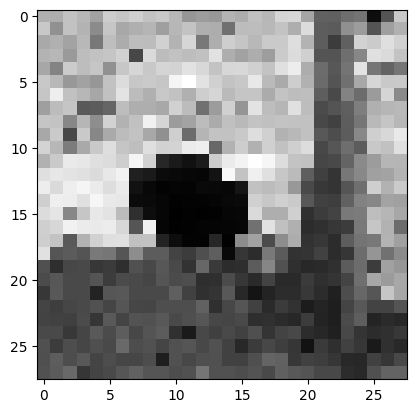

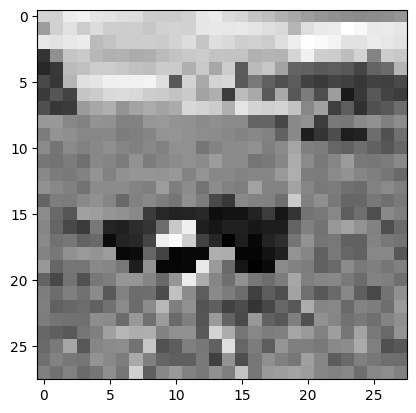

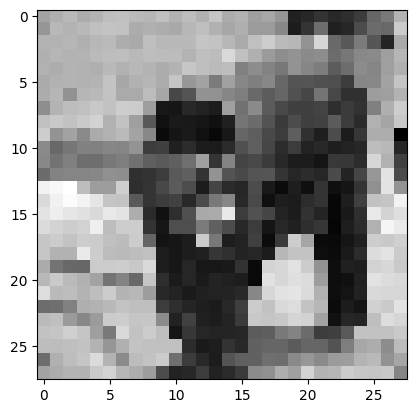

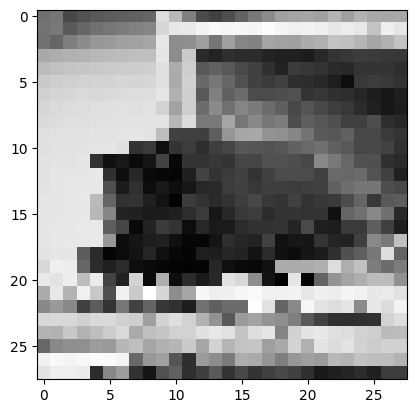

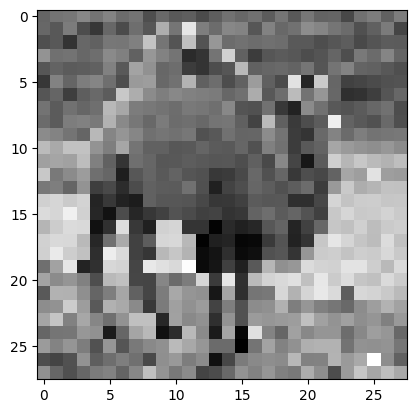

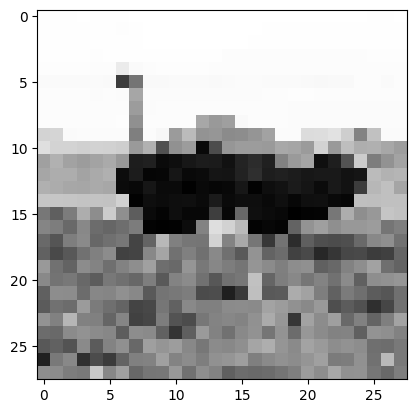

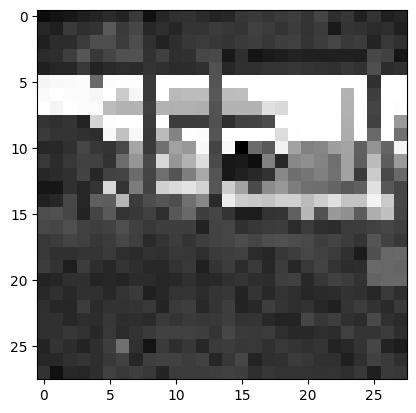

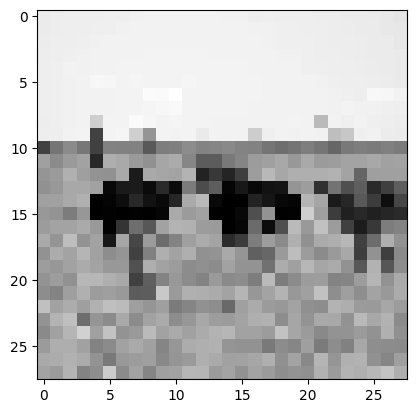

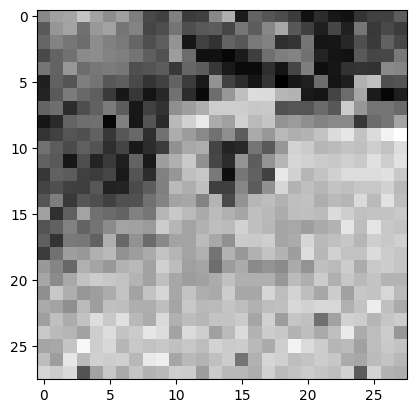

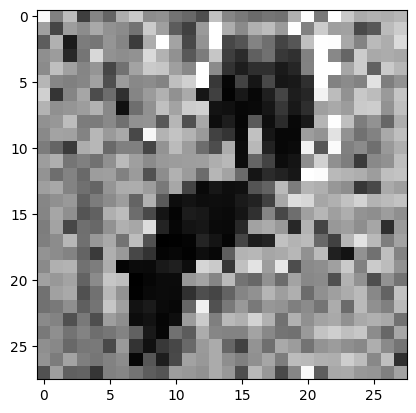

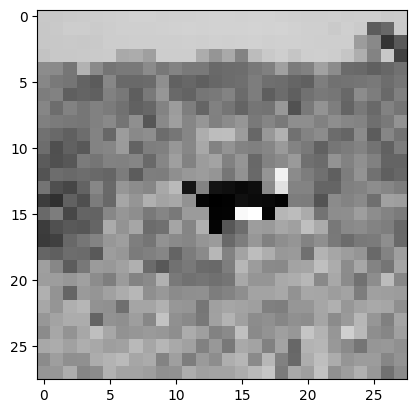

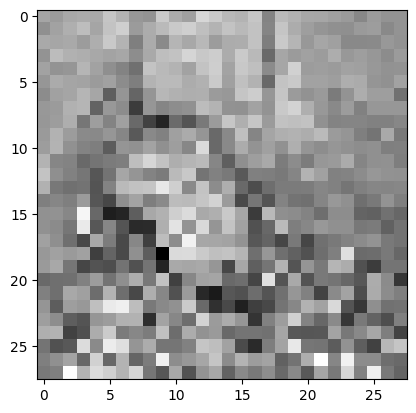

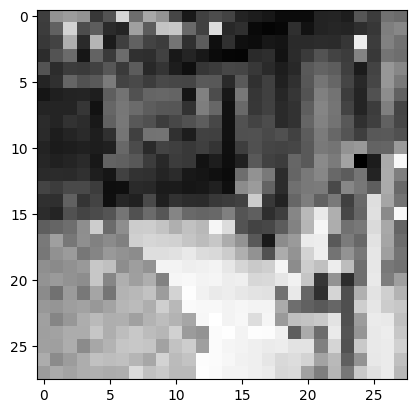

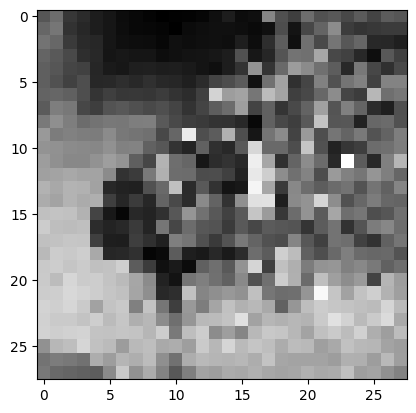

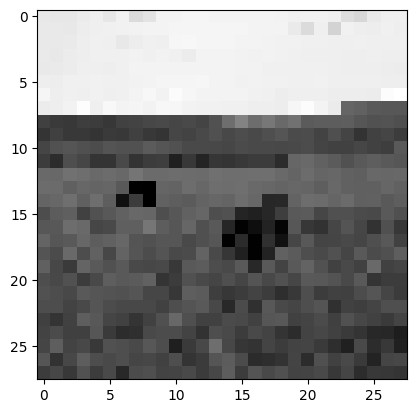

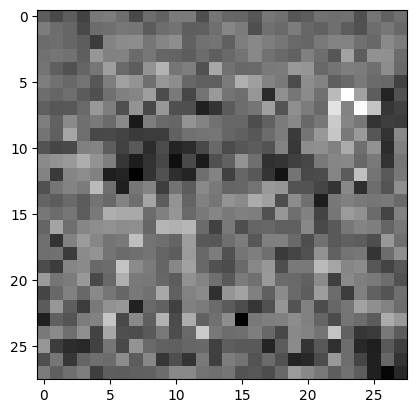

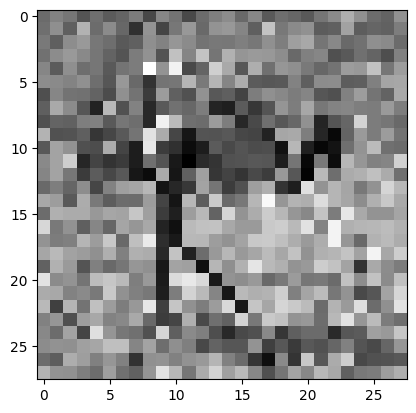

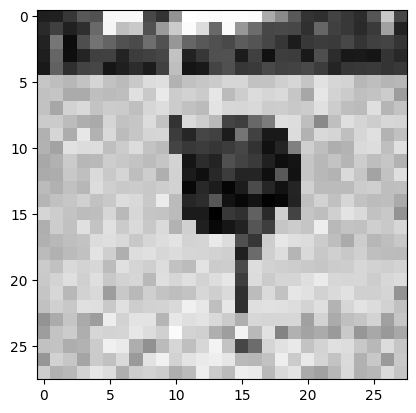

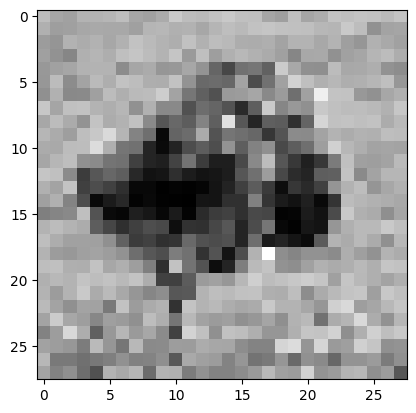

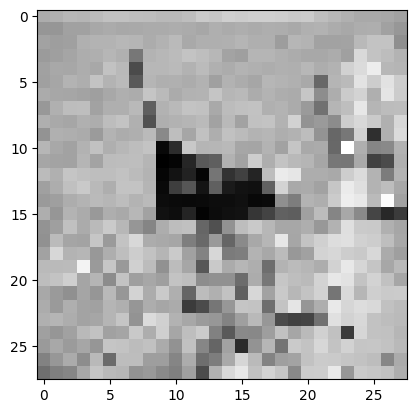

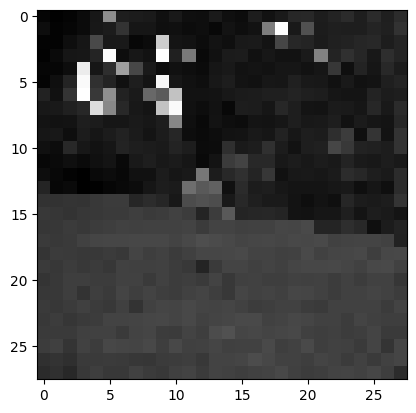

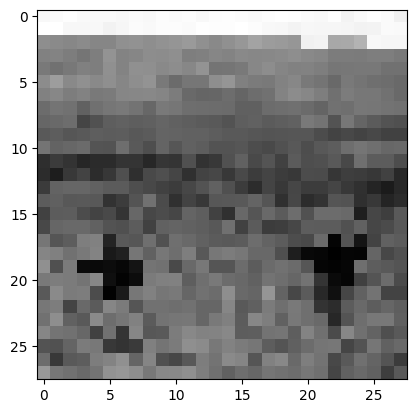

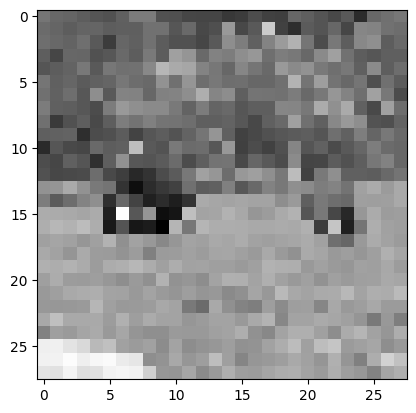

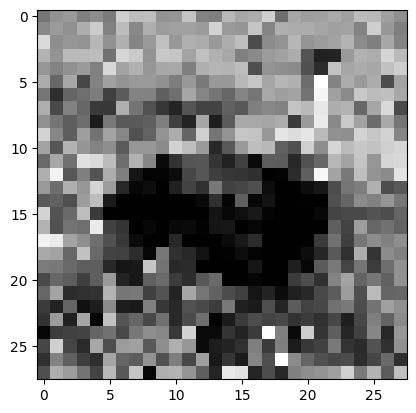

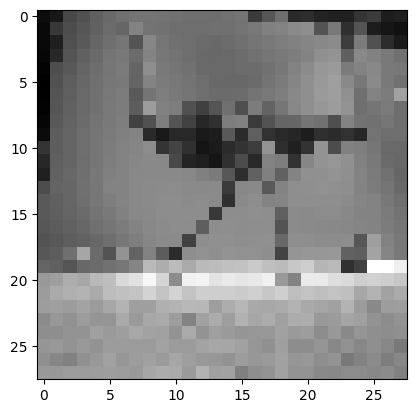

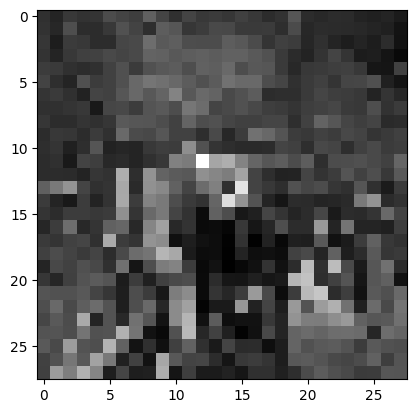

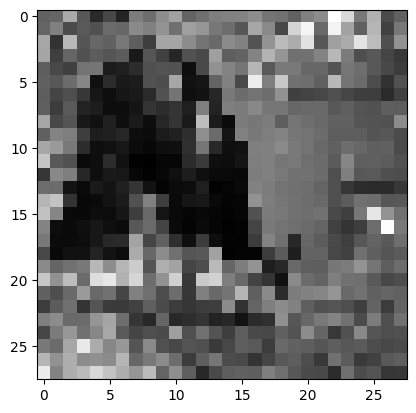

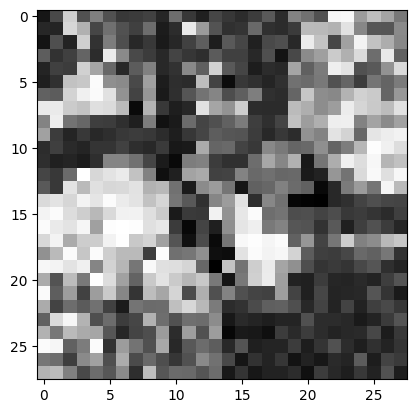

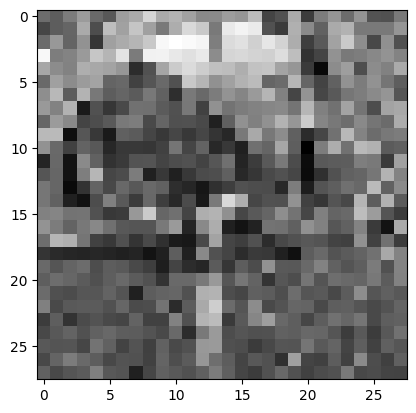

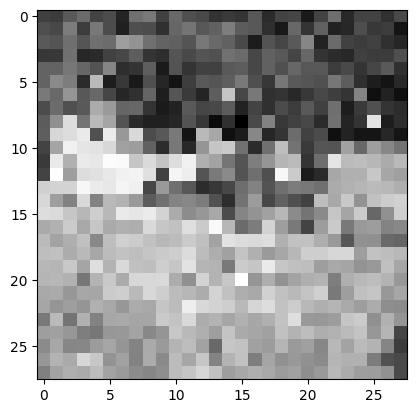

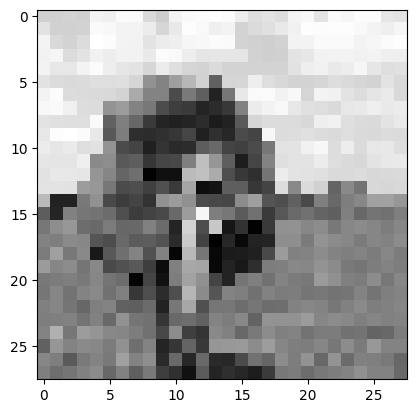

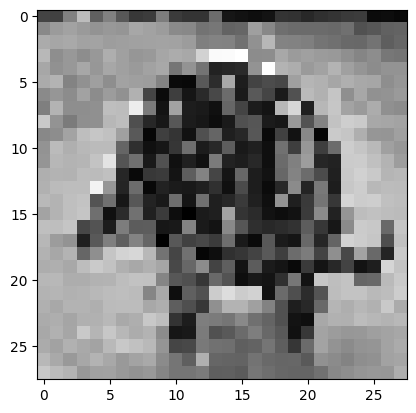

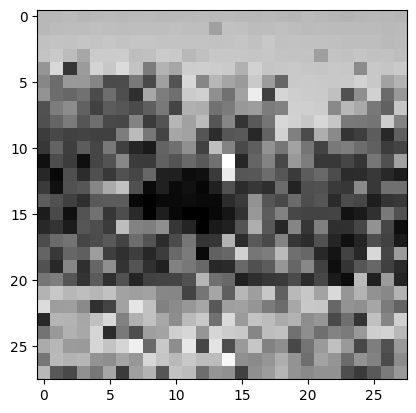

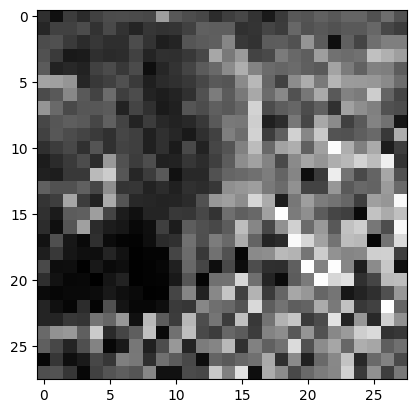

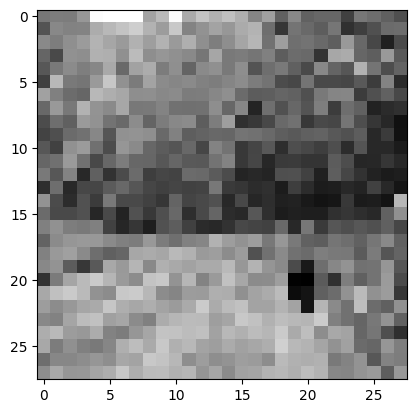

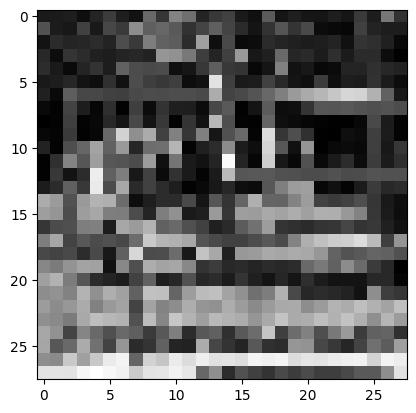

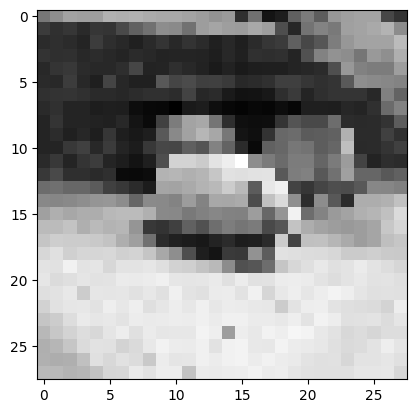

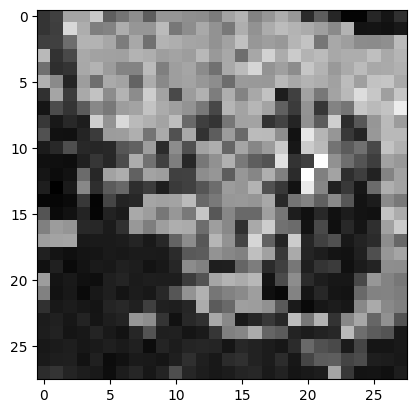

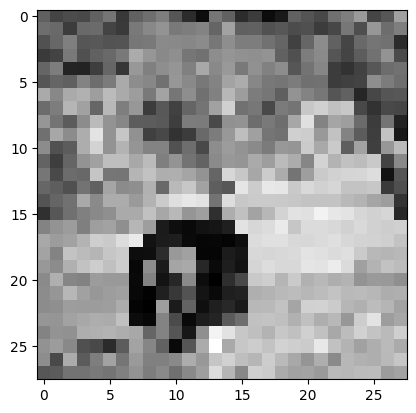

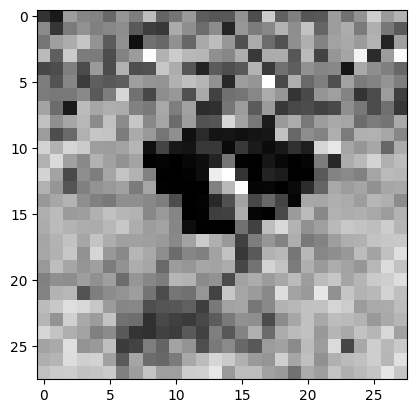

Features + Label: 327
Train data: X: (218, 1, 28, 28), y: (218,)
Val data: X: (54, 1, 28, 28), y: (54,)
Testi data : X: (55, 1, 28, 28), y: (55,)


In [61]:
# Define the path to the directory containing the image dataset
data_dir = "/content/drive/MyDrive/dataset"

# Define the image size to be used
img_size = 28

# Define the list of categories in the dataset
categories = ["alpaca", "not alpaca"]

# Create an empty list to hold the training data
training_data = []
print("All images of alpaca  and not alpaca after reducing their diminsions.")
# Define a function to load and preprocess all images in the dataset
def load_data():
    # Iterate over the categories
    for category in categories:
        # Get the path to the category directory
        category_path = os.path.join(data_dir, category)
        # Get the class label for this category
        class_label = categories.index(category)
        # Iterate over the images in the category directory
        for img_name in os.listdir(category_path):
            try:
                # Load the image and convert it to grayscale
                img_path = os.path.join(category_path, img_name)
                img_original = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                # Resize the image to the desired size
                img = cv2.resize(img_original, (img_size, img_size))
                plt.imshow(img, cmap = "gray")  
                plt.show()
                # Add the image and its label to the training data list
                training_data.append((img, class_label))

            except Exception as e:
                pass

# Load the data
load_data()

# Shuffle the training data
random.shuffle(training_data)

# Split the training data into features and labels
Features = []
y = []
for features, label in training_data:
    Features.append(features)
    y.append(label)

# Convert the feature and label lists to numpy arrays
Features = np.array(Features)
y = np.array(y)

# Reshape the feature array to have channel first format
Features = np.array(Features).reshape(-1, 1, Img_Size, Img_Size)
# Casting images to tensorflow supported format
Features = tf.cast(Features, tf.float32)
# Print the shapes of the feature and label arrays
data_length = len(Features)
validation_test_size = data_length // 3
validation_size = validation_test_size // 2

train_Features = Features[:data_length - validation_test_size]
train_y = y[:data_length - validation_test_size]

valid_Features = Features[data_length - validation_test_size:data_length - validation_test_size + validation_size]
valid_y = y[data_length - validation_test_size:data_length - validation_test_size + validation_size]

test_Features = Features[data_length - validation_test_size + validation_size:]
test_y = y[data_length - validation_test_size + validation_size:]

print(f"Features + Label: {data_length}")
print(f"Train data: Features: {train_Features.shape}, y: {train_y.shape}")
print(f"Val data: Features: {valid_Features.shape}, y: {valid_y.shape}")
print(f"Test data : Features: {test_Features.shape}, y: {test_y.shape}")

**Created Custom layer:**

---



In [ ]:
# Define a custom layer class that inherits from keras.layers.Layer
class proposed_layer(keras.layers.Layer):

    # Define the constructor method
    def __init__(self, filters):
      # Call the constructor of the parent class
      super(proposed_layer, self).__init__()
      # Initialize the number of filters
      self.filters = filters
  
    # Define the build method to create the layer's variables
    def build(self, input_shape):
      # Create a weight tensor with random normal initialization
      # The shape of the weight tensor is (filters, input_shape[-1], input_shape[-1])
      self.kernel = self.add_weight(
        shape=(self.filters, input_shape[-1], input_shape[-1]),
        initializer="random_normal",
        trainable=True,
      )

    # Define the call method to perform the forward pass of the layer
    def call(self, inputs):
      # Get the number of samples in the batch
      num_samples = tf.shape(inputs)[0]
      # Get the number of feature maps in the input
      previous_maps = tf.shape(inputs)[1]
      # Initialize the output tensor with zeros
      # The shape of the output tensor is (num_samples, filters, input_shape[2]-2, input_shape[3]-2)
      features_maps = tf.zeros((num_samples, self.filters, tf.shape(inputs)[2]-2, tf.shape(inputs)[3]-2))
      # Get the dimensions of the output tensor
      a0 = tf.shape(features_maps)[0]
      a1 = tf.shape(features_maps)[1]
      a2 = tf.shape(features_maps)[2]
      a3 = tf.shape(features_maps)[3]
      
      # Loop over each sample in the batch
      for n in range(a0):
        # Loop over each filter in the layer
        for k in range(a1):
          # Initialize the starting indices for the sliding window
          x1 = 0
          x2 = 0
          # Loop over each row in the input feature maps
          for i in range(a2):
            # Reset the starting index for the sliding window
            x1 = 0
            # Loop over each column in the input feature maps
            for j in range(a3):
              # Initialize the weighted sum to 0
              weighted_sum = tf.constant(0.0)
              # Loop over each feature map in the input
              for feature in range(previous_maps):
                # Perform a 2D convolution between the kernel and the input feature map
                # Add the result to the weighted sum
                weighted_sum += tf.math.reduce_sum(tf.matmul(inputs[n, feature, x1:x1+3, x2:x2+3], self.kernel[k, x1:x1+3, x2:x2+3]))
              # Create a sparse tensor with the weighted sum and the corresponding indices
              sparse_tensor = tf.SparseTensor(indices=[[n, k, i, j]],
                        values=[weighted_sum],
                        dense_shape=[a0, a1, a2, a3])
              # Add the sparse tensor to the output tensor
              features_maps = features_maps + tf.sparse.to_dense(sparse_tensor)
              # Move the sliding window one column to the right
              x1 += 1
            # Move the sliding window one row down
            x2 += 1

      # Reshape the output tensor to match the input shape
      return tf.reshape(features_maps, (a0, a1, a2, a3))


**Implementation of Layer and Complete Model**


In [ ]:
class custom_model(tf.keras.Model):
    # Define the model architecture
    def __init__(self):
        
        # Call the constructor of the parent class
        super(custom_model, self).__init__()
        
        # Define the layers of the model
        self.prop1 = proposed_layer(filters=5)   # First custom layer with 5 filters
        self.prop2 = proposed_layer(filters=3)   # Second custom layer with 3 filters
        self.prop3 = proposed_layer(filters=2)   # Third custom layer with 2 filters
        self.actv = Activation(activations.relu)   # Activation layer with ReLU activation function
        self.maxp = MaxPooling2D(pool_size=(2,2))  # Max pooling layer with a pool size of 2x2
        
        self.flatten = Flatten()   # Flatten layer
        self.dense1 = Dense(units=16, activation="relu")  # Fully connected layer with 16 units(neurons) and ReLU activation function
        self.output_layer = Dense(units=1, activation="softmax")  # Output layer with 1 unit(neuron) and softmax activation function
        
    # Define the forward pass of the model
    def call(self, inputdata):
       
        x = self.prop1(inputdata)  # Pass the input through the first custom layer
        x = self.actv(x)   # Apply the ReLU activation function to the output of the first custom layer
        x = self.maxp(x)   # Apply max pooling to the output of the first custom layer
        x = self.prop2(x)   # Pass the output of the max pooling layer through the second custom layer
        x = self.actv(x)   # Apply the ReLU activation function to the output of the second custom layer
        x = self.maxp(x)   # Apply max pooling to the output of the second custom layer
        x = self.prop3(x)   # Pass the output of the max pooling layer through the third custom layer
        x = self.actv(x)   # Apply the ReLU activation function to the output of the third custom layer
        x = self.flatten(x)   # Flatten the output of the third custom layer
        x = self.dense1(x)   # Pass the flattened output through the fully connected layer
        x = self.output_layer(x)   # Pass the output of the fully connected layer through the output layer with softmax activation function
        
        return x   # Return the output of the model

In [ ]:
# Define a function to select the optimizer
def selectoptimizer(alpha=.01,adam=False):
    
    # Check if the 'adam' flag is True
    if adam:
        # If 'adam' is True, use the Adam optimizer with specified learning rate
        optimizer = tf.keras.optimizers.Adam(learning_rate=alpha)
    else:
        # If 'adam' is False, use the SGD optimizer with specified learning rate
        optimizer = tf.keras.optimizers.SGD(learning_rate=alpha)
    
    # Return the selected optimizer
    return optimizer

In [ ]:
# Define a function to train a given model and return its history
def modelHistory(Proposed_Model,alpha=.01,adam = False,batchSize = None,epochs=4):
    
    # Set up a directory for TensorBoard logs and create a callback for it
    log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
    
    # Compile the model with the specified optimizer, loss function, and metrics
    Proposed_Model.compile(optimizer=selectoptimizer(alpha,adam), 
                      loss='BinaryCrossentropy', 
                      metrics=['accuracy'])
    
    # Train the model on the training data and validate it on the validation data
    # using the specified batch size, number of epochs, and TensorBoard callback
    History_data = Proposed_Model.fit(Features_train, y_train, 
                  epochs=epochs,
                  batch_size=batchSize,
                  validation_data=(Features_valid, y_valid), 
                  callbacks=[tensorboard_callback])
    
    # Return the history of the trained model
    return History_data

**Default setting of Hyper Parameters**

In [ ]:
# Set the learning rate of optimizer to 0.01
alpha = 0.01

# Set the optimizer to Stochastic Gradient Descent (SGD)
adam = False

# Set the batch size to None (which means that the default batch size will be used)
batchSize = None

# Set the number of epochs to 4
epochs = 4

# Instantiate a custom model
Proposed_Model = custom_model()

# Train the model and store the training history in History_data
History_data = modelHistory(Proposed_Model, alpha, adam, batchSize, epochs)

Epoch 1/4


7/7 [==============================] - 846s 119s/step - loss: 35.6496 - accuracy: 0.5459 - val_loss: 0.6929 - val_accuracy: 0.5926
Epoch 2/4
7/7 [==============================] - 815s 118s/step - loss: 0.6930 - accuracy: 0.5459 - val_loss: 0.6926 - val_accuracy: 0.5926
Epoch 3/4
7/7 [==============================] - 820s 119s/step - loss: 0.6929 - accuracy: 0.5459 - val_loss: 0.6923 - val_accuracy: 0.5926
Epoch 4/4
7/7 [==============================] - 816s 118s/step - loss: 0.6927 - accuracy: 0.5459 - val_loss: 0.6921 - val_accuracy: 0.5926


In [ ]:
# Get the training accuracy from the training history of the model
train_acc = History_data.history['accuracy']

# Evaluate the trained model on the test set and store the test loss and test accuracy in test_loss and test_acc respectively
test_loss, test_acc = Proposed_Model.evaluate(Features_test, y_test)

2/2 [==============================] - 81s 27s/step - loss: 0.6918 - accuracy: 0.6182


In [ ]:
# List for storing Results
FinalResults = []

In [ ]:
# Create a dictionary containing the training and testing results
results = { "Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}


In [ ]:
FinalResults.append(results)

In [ ]:
def plot_history(history, name):
    # Create a figure with a size of 18 by 5 inches
    fig = plt.figure(figsize=(18,5))
    
    # Add a subplot with 1 row, 2 columns, and plot #1
    fig.add_subplot(1,2,1)
    
    # Set the title and labels for the plot
    plt.title('Train Vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    # Plot the train loss and validation loss from the history object
    plt.plot(history.history['loss'], label = 'Train Loss')
    plt.plot(history.history['val_loss'], label = 'Val Loss')
    
    # Add a subplot with 1 row, 2 columns, and plot #2
    fig.add_subplot(1,2,2)
    
    # Set the title and labels for the plot
    plt.title('Train Vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    
    # Plot the train accuracy and validation accuracy from the history object
    plt.plot(history.history['accuracy'], label = 'Train Accuracy')
    plt.plot(history.history['val_accuracy'], label = 'Val Accuracy')
   
    # Add a legend to the plot
    plt.legend()
    
    # Add a title to the entire figure
    fig.suptitle(name, y = 1, fontsize = 17)

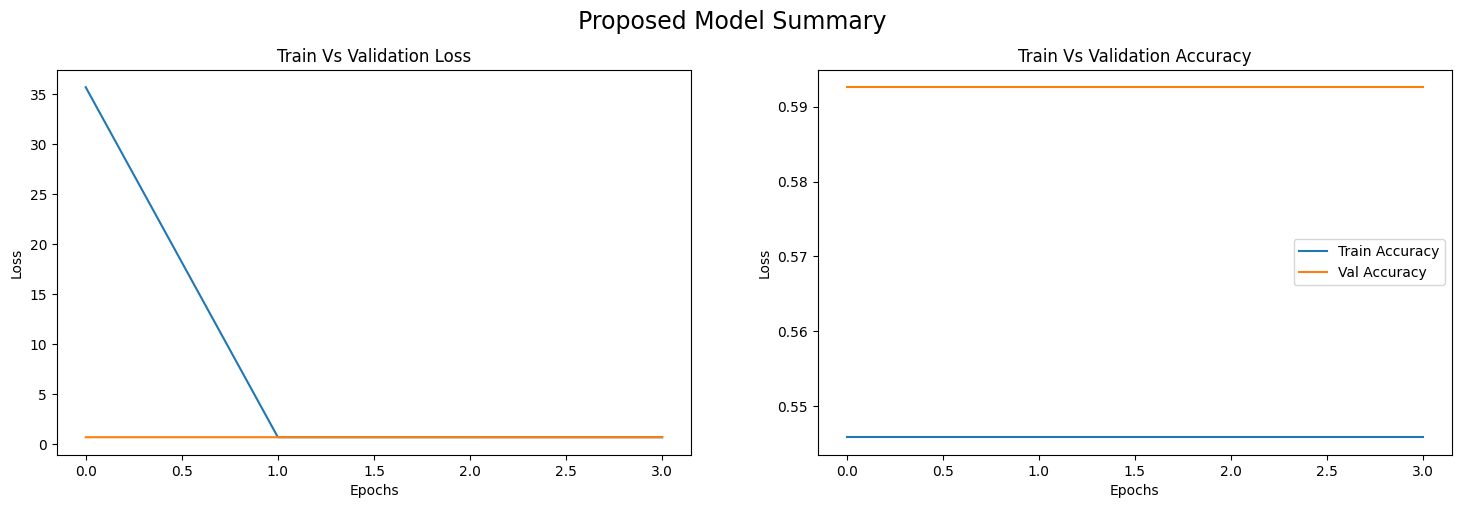

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Tensorboard with results for all runs stored in the logs folder:**

In [ ]:
%tensorboard --logdir logs/fit

**Training Model with Different Hyperparameters**

**Hyper-Parameter: Alpha = 0.001,optimiser = sgd,batchsize = 30,epochs = 4**

In [ ]:
# Define the hyperparameters
alpha = 0.001
adam = False
batchSize = 30
epochs = 4

# Create an instance of the custom model
Proposed_Model = custom_model()

# Train the model with the given hyperparameters and save the training history
History_data = modelHistory(Proposed_Model, alpha, adam, batchSize, epochs)

Epoch 1/4
8/8 [==============================] - 841s 103s/step - loss: 1.6977 - accuracy: 0.5459 - val_loss: 0.6791 - val_accuracy: 0.5926
Epoch 2/4
8/8 [==============================] - 814s 102s/step - loss: 0.6863 - accuracy: 0.5459 - val_loss: 0.7051 - val_accuracy: 0.5926
Epoch 3/4
8/8 [==============================] - 839s 102s/step - loss: 0.6887 - accuracy: 0.5459 - val_loss: 0.6746 - val_accuracy: 0.5926
Epoch 4/4
8/8 [==============================] - 829s 104s/step - loss: 0.6835 - accuracy: 0.5459 - val_loss: 0.6872 - val_accuracy: 0.5926


In [ ]:
# Evaluating test loss and accuracy using the trained model and test data
train_acc = History_data.history['accuracy']
# Getting train accuracy from the training history of the model
test_loss, test_acc = Proposed_Model.evaluate(Features_test, y_test)

2/2 [==============================] - 82s 28s/step - loss: 0.6850 - accuracy: 0.6182


In [ ]:
# Storing the results of the current model in a dictionary named results
results = { "Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
# Appending the results of the current model to the list FinalResults
FinalResults.append(results)

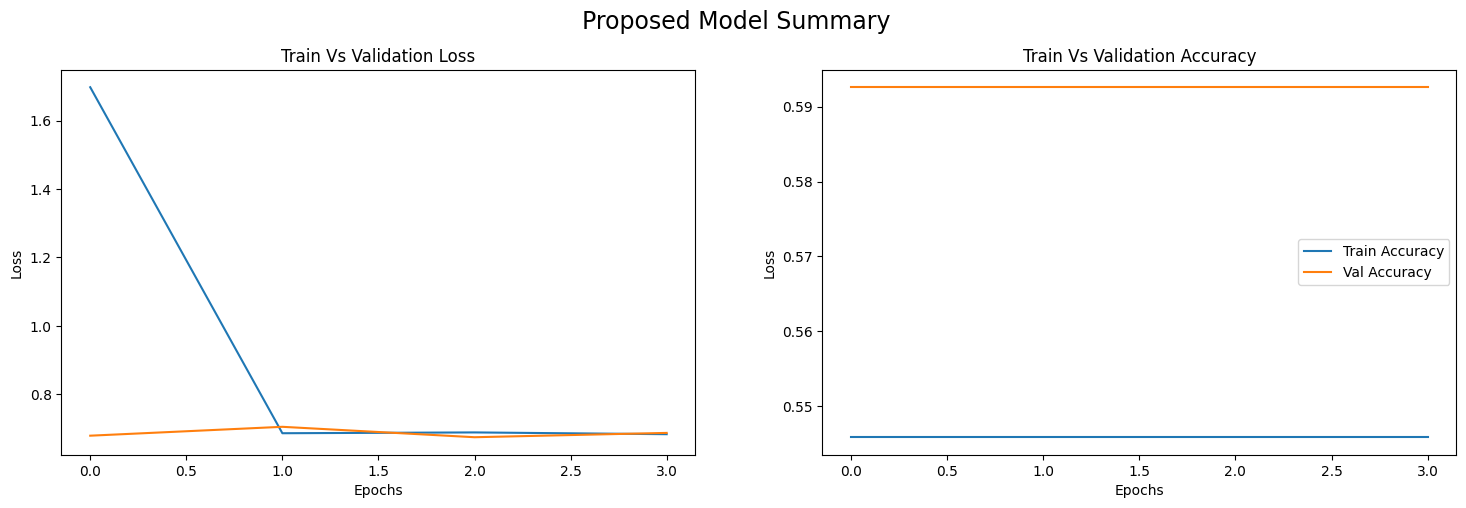

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Hyper-Parameter: Alpha= .01 ,batchsize=None ,optimiser=adam  ,epochs=4**

In [ ]:
# Setting hyperparameters for the model
alpha = 0.01
adam = True
batchSize = None
epochs = 4

# Creating a custom model
Proposed_Model = custom_model()

# Training the model and saving the history
History_data = modelHistory(Proposed_Model,alpha,adam,batchSize,epochs)

Epoch 1/4
7/7 [==============================] - 836s 118s/step - loss: 0.9264 - accuracy: 0.5459 - val_loss: 0.6669 - val_accuracy: 0.5926
Epoch 2/4
7/7 [==============================] - 811s 117s/step - loss: 0.7001 - accuracy: 0.5459 - val_loss: 0.6833 - val_accuracy: 0.5926
Epoch 3/4
7/7 [==============================] - 997s 148s/step - loss: 0.6881 - accuracy: 0.5459 - val_loss: 0.6738 - val_accuracy: 0.5926
Epoch 4/4
7/7 [==============================] - 840s 117s/step - loss: 0.6751 - accuracy: 0.5459 - val_loss: 0.8010 - val_accuracy: 0.5926


In [ ]:
# Extracting the accuracy values from the history of the trained model
train_acc = History_data.history['accuracy']

# Evaluating the model's performance on the test data and getting the loss and accuracy values
test_loss, test_acc = Proposed_Model.evaluate(Features_test, y_test)

2/2 [==============================] - 79s 27s/step - loss: 0.8047 - accuracy: 0.6182


In [ ]:
# creates a dictionary with the results of the current model run.
results = { "Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
FinalResults.append(results)

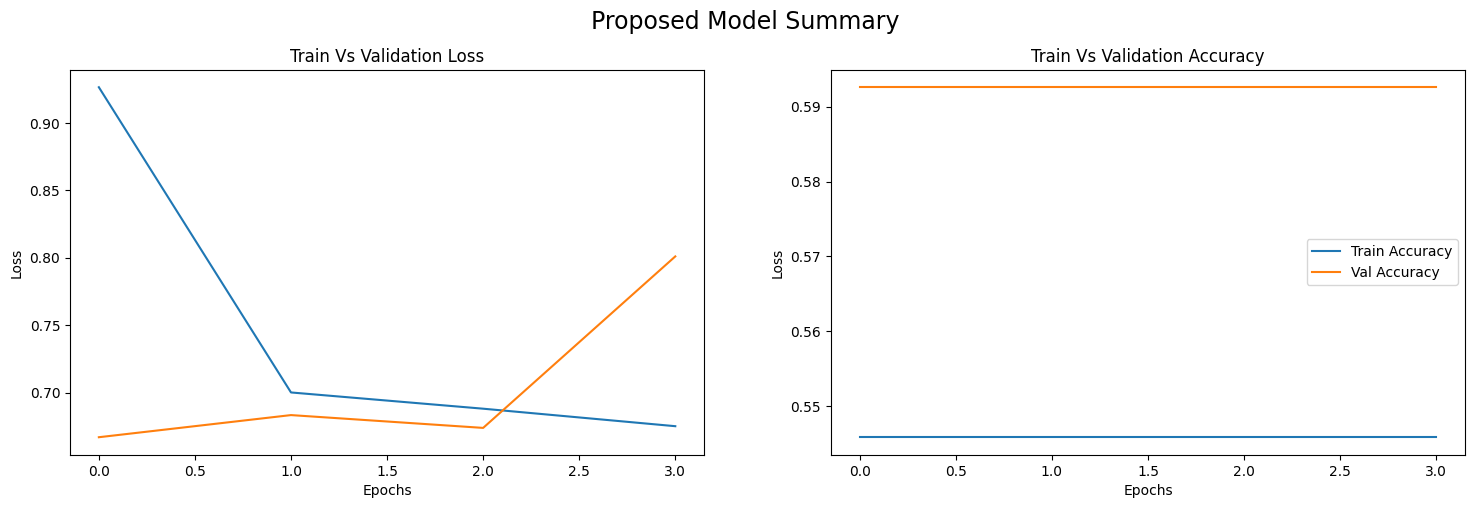

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Hyper-Parameter: Alpha=0.001 ,batchsize= 30 ,optimiser= Adam ,epochs=4**

In [ ]:
# Setting the values for alpha, adam, batch size, and epochs
alpha = 0.001
adam = True
batchSize = 30
epochs = 4

# Creating a custom model
Proposed_Model = custom_model()

# Fitting the model with the specified hyperparameters and storing the training history
History_data = modelHistory(Proposed_Model, alpha, adam, batchSize, epochs)

Epoch 1/4
8/8 [==============================] - 844s 103s/step - loss: 2.4582 - accuracy: 0.5459 - val_loss: 1.3231 - val_accuracy: 0.5926
Epoch 2/4
8/8 [==============================] - 831s 104s/step - loss: 0.9760 - accuracy: 0.5459 - val_loss: 0.7328 - val_accuracy: 0.5926
Epoch 3/4
8/8 [==============================] - 820s 103s/step - loss: 0.7383 - accuracy: 0.5459 - val_loss: 0.7127 - val_accuracy: 0.5926
Epoch 4/4
8/8 [==============================] - 819s 103s/step - loss: 0.7117 - accuracy: 0.5459 - val_loss: 0.6887 - val_accuracy: 0.5926


In [ ]:
# Extracting train accuracy from the history of the trained model
train_acc = History_data.history['accuracy']

# Evaluating the trained model on test data and extracting test loss and accuracy
test_loss, test_acc = Proposed_Model.evaluate(Features_test, y_test)

2/2 [==============================] - 79s 27s/step - loss: 0.6955 - accuracy: 0.6182


In [ ]:
results = { "Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
FinalResults.append(results)

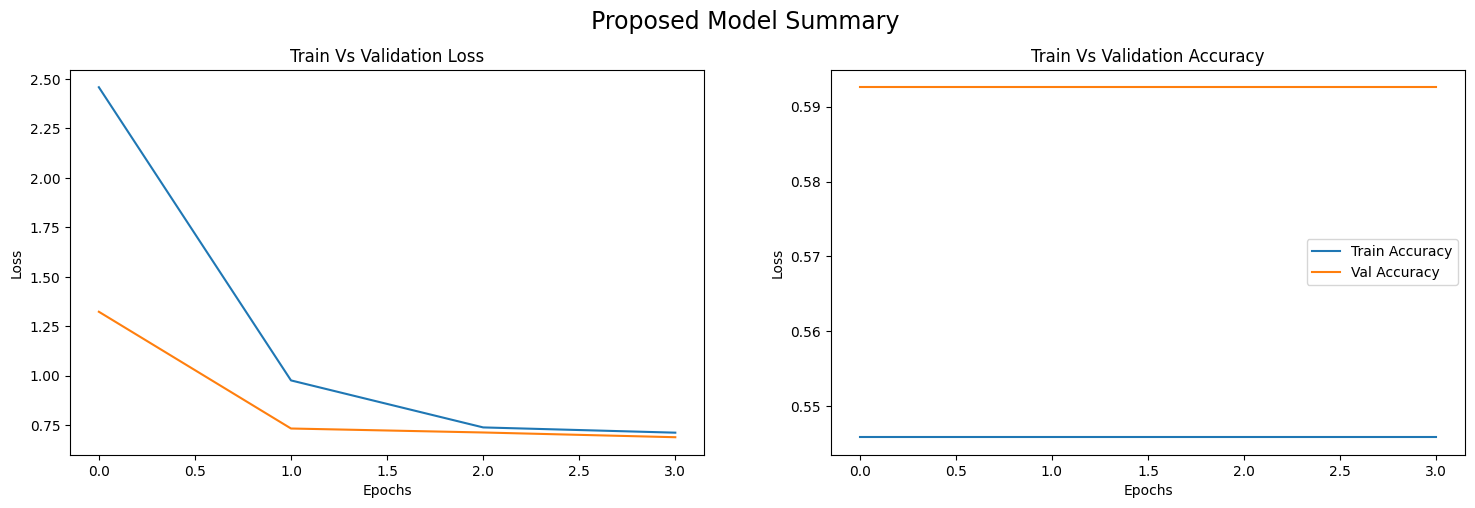

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Result Table for the Comparison:**

In [ ]:
# create a new pandas DataFrame called results_df using the FinalResults data
results_df = pd.DataFrame(FinalResults)

# create a new list called Optimizer with four strings as elements
Optimizer = ['SGD', 'SGD', 'ADAM', 'ADAM']

# add a new column called "Optimizer" to the results_df DataFrame and set its values to the Optimizer list
results_df['Optimizer'] = Optimizer

# convert the results_df DataFrame to a Markdown-formatted table and print it to the console
print(results_df.to_markdown())

|    |   Epochs |   Learning Rate | Train Accuracy   | Test Accuracy   |   Batch Size | Optimizer   |
|---:|---------:|----------------:|:-----------------|:----------------|-------------:|:------------|
|  0 |        4 |           0.01  | 54.59%           | 61.82%          |          nan | SGD         |
|  1 |        4 |           0.001 | 54.59            | 61.82           |           30 | SGD         |
|  2 |        4 |           0.01  | 54.59            | 61.82           |          nan | ADAM        |
|  3 |        4 |           0.001 | 54.59            | 61.82           |           30 | ADAM        |


Depth Increase

In [ ]:
# Define a custom model class called "custom_modelwithdepth" that inherits from tf.keras.Model
class custom_modelwithdepth(tf.keras.Model):
    
    # Define the constructor function for the model
    def __init__(self):
        # Call the constructor of the parent class
        super(custom_modelwithdepth, self).__init__()
        
        # Define the layers of the model as instance variables
        # using a custom layer called "proposed_layer" with different number of filters
        self.prop1 = proposed_layer(filters=5)
        self.prop2 = proposed_layer(filters=3)
        self.prop3 = proposed_layer(filters=2)
        
        # Define the activation function layer
        self.actv = Activation(activations.relu)
        
        # Define the max pooling layer
        self.maxp = MaxPooling2D(pool_size=(2,2))
        
        # Define the flattening layer
        self.flatten = Flatten()
        
        # Define two dense (fully connected) layers with 16 and 8 units and relu activation
        self.dense1 = Dense(units=16, activation="relu")
        self.dense2 = Dense(units=8, activation="relu")
        
        # Define the output layer with 1 unit and softmax activation
        self.output_layer = Dense(units=1, activation="softmax")
        
    # Define the call function for the model
    def call(self, inputdata):
       
        # Apply the first custom layer to the input data
        x = self.prop1(inputdata)
        
        # Apply the activation function to the output of the first layer
        x = self.actv(x)
        
        # Apply the max pooling layer to the output of the activation function
        x = self.maxp(x)
        
        # Apply the second custom layer to the output of the max pooling layer
        x = self.prop2(x)
        
        # Apply the activation function to the output of the second layer
        x = self.actv(x)
        
        # Apply the max pooling layer to the output of the activation function
        x = self.maxp(x)
        
        # Apply the third custom layer to the output of the max pooling layer
        x = self.prop3(x)
        
        # Apply the activation function to the output of the third layer
        x = self.actv(x)
        
        # Flatten the output of the activation function
        x = self.flatten(x)
        
        # Apply the first dense layer to the flattened output
        x = self.dense1(x)
        
        # Apply the second dense layer to the output of the first dense layer
        x = self.dense2(x)
        
        # Apply the output layer to the output of the second dense layer
        x = self.output_layer(x)
        
        # Return the output of the output layer
        return x


In [ ]:
# Set the learning rate to 0.01
alpha = 0.01

# Set the optimizer to stochastic gradient descent (SGD) if True, or Adam if False
adam = False

# Set the batch size to 20
batchSize = 20

# Set the number of epochs to 2
epochs = 2

# Instantiate a custom Keras model called "depth_model"
depth_model = custom_modelwithdepth()

# Call the modelHistory function to train the model and return its training history
# Pass the custom Keras model, learning rate, optimizer choice, batch size, and number of epochs as arguments
History_data = modelHistory(depth_model,alpha,adam,batchSize,epochs)

Epoch 1/2
11/11 [==============================] - 867s 77s/step - loss: 1.0971 - accuracy: 0.5459 - val_loss: 0.6849 - val_accuracy: 0.5926
Epoch 2/2
11/11 [==============================] - 718s 66s/step - loss: 0.6930 - accuracy: 0.5459 - val_loss: 0.6848 - val_accuracy: 0.5926


In [ ]:
train_acc = History_data.history['accuracy']
test_loss, test_acc = depth_model.evaluate(Features_test, y_test)

2/2 [==============================] - 80s 27s/step - loss: 0.6851 - accuracy: 0.6182


In [ ]:
results = { "Optimizer": "SGD","Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
results

{'Optimizer': 'SGD',
 'Epochs': 2,
 'Learning Rate': 0.01,
 'Train Accuracy': 54.59,
 'Test Accuracy': 61.82,
 'Batch Size': 20}

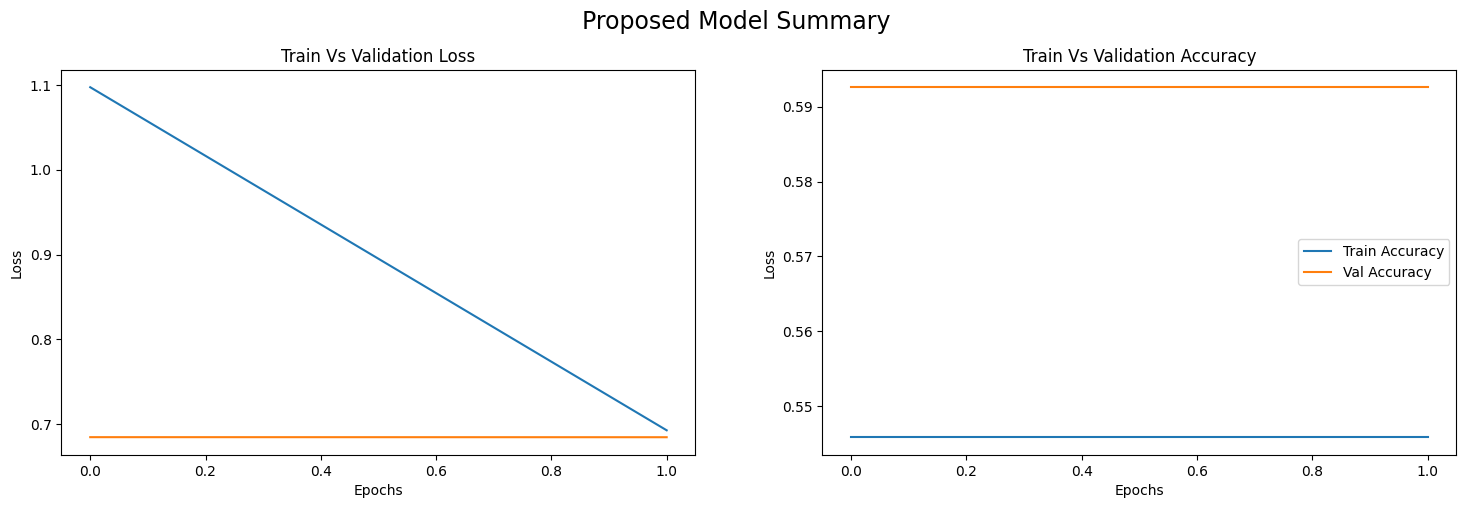

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Width Increase**

In [ ]:
# Define a custom Keras model called "custom_modelwithwidth"
class custom_modelwithwidth(tf.keras.Model):
    
    def __init__(self):
        super(custom_modelwithwidth, self).__init__()
        
        # Create three instances of a custom layer called "proposed_layer" with different filter sizes
        self.prop1 = proposed_layer(filters=6)
        self.prop2 = proposed_layer(filters=4)
        self.prop3 = proposed_layer(filters=2)
        
        # Define an activation function for the model to use (ReLU)
        self.actv = Activation(activations.relu)
        
        # Define a pooling layer for the model to use (MaxPooling2D with pool size 2x2)
        self.maxp = MaxPooling2D(pool_size=(2,2))
        
        # Define a flatten layer for the model to use
        self.flatten = Flatten()
        
        # Create two dense layers with 16 and 1 output units, respectively, and ReLU and softmax activation functions
        self.dense1 = Dense(units=16, activation="relu")
        self.output_layer = Dense(units=1, activation="softmax")
        
    def call(self, inputdata):
       
        # Pass the input data through the three custom layers, with ReLU activations and max pooling in between
        x = self.prop1(inputdata)
        x = self.actv(x)
        x = self.maxp(x)
        x = self.prop2(x)
        x = self.actv(x)
        x = self.maxp(x)
        x = self.prop3(x)
        x = self.actv(x)
        
        # Flatten the output from the custom layers and pass it through the two dense layers, with ReLU and softmax activations, respectively
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.output_layer(x)
        
        # Return the final output of the model
        return x

In [ ]:
alpha = 0.01                # Define the learning rate
adam = False                # Define the optimizer (False means Stochastic Gradient Descent)
batchSize = 20              # Define the batch size
epochs = 2                  # Define the number of epochs
width_model = custom_modelwithwidth()  # Instantiate a custom model with width
History_data = modelHistory(width_model,alpha,adam,batchSize,epochs)  # Train the model and get the training history


Epoch 1/2
11/11 [==============================] - 1002s 90s/step - loss: 382.6992 - accuracy: 0.5459 - val_loss: 0.6924 - val_accuracy: 0.5926
Epoch 2/2
11/11 [==============================] - 992s 92s/step - loss: 0.6924 - accuracy: 0.5459 - val_loss: 0.6921 - val_accuracy: 0.5926


In [ ]:
train_acc = History_data.history['accuracy']
test_loss, test_acc = width_model.evaluate(Features_test, y_test)

2/2 [==============================] - 104s 35s/step - loss: 0.6912 - accuracy: 0.6182


In [ ]:
results = { "Optimizer": "SGD","Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
results

{'Optimizer': 'SGD',
 'Epochs': 2,
 'Learning Rate': 0.01,
 'Train Accuracy': 54.59,
 'Test Accuracy': 61.82,
 'Batch Size': 20}

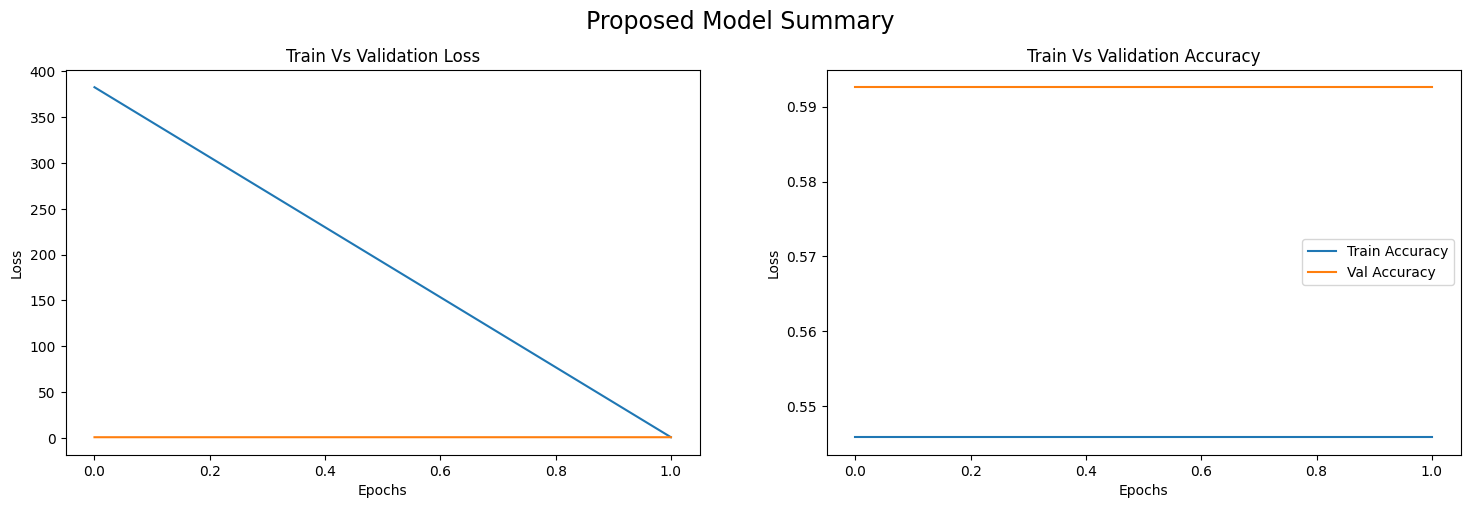

In [ ]:
plot_history(History_data, name = 'Proposed Model Summary')

**Normal Convolution Model**

In [ ]:
Features_copy = np.array(Features_copy).reshape(-1, Img_Size, Img_Size, 1) # Reshape the Features_copy array to a 4D tensor with one channel 
Features_copy = tf.cast(Features_copy, tf.float32)   # Convert Features_copy to a TensorFlow float32 data type

dataset_len_copy = len(Features_copy)    # Get the length of Features_copy
valid_test_size_copy = int(dataset_len_copy / 3)   # Calculate the size of the validation and test sets
valid_size_copy = int(valid_test_size_copy / 2)   

Features_train_copy = Features_copy[:(dataset_len_copy - valid_test_size_copy)]   # Get the training data
y_train_copy = y[:(dataset_len_copy - valid_test_size_copy)]    # Get the labels for the training data

Features_valid_copy = Features_copy[(dataset_len_copy - valid_test_size_copy):((dataset_len_copy - valid_test_size_copy) + valid_size_copy)]   # Get the validation data
y_valid_copy = y[(dataset_len_copy - valid_test_size_copy):((dataset_len_copy - valid_test_size_copy) + valid_size_copy)]   # Get the labels for the validation data

Features_test_copy = Features_copy[((dataset_len_copy - valid_test_size_copy) + valid_size_copy):]   # Get the test data
y_test_copy = y[((dataset_len_copy - valid_test_size_copy) + valid_size_copy):]    # Get the labels for the test data

In [ ]:
normalmodel = keras.Sequential(
    [
        # Add a 2D convolution layer with 5 filters and a kernel size of 3x3
        layers.Conv2D(5, kernel_size=(3,3)),
        # Add a ReLU activation layer
        layers.Activation(activations.relu),
        # Add a max pooling layer with a pool size of 2x2
        layers.MaxPooling2D(pool_size=(2,2)),
        # Add another 2D convolution layer with 3 filters and a kernel size of 3x3
        layers.Conv2D(3, kernel_size=(3,3)),
        # Add another ReLU activation layer
        layers.Activation(activations.relu),
        # Add another max pooling layer with a pool size of 2x2
        layers.MaxPooling2D(pool_size=(2,2)),
        # Add another 2D convolution layer with 2 filters and a kernel size of 3x3
        layers.Conv2D(2, kernel_size=(3,3)),
        # Add another ReLU activation layer
        layers.Activation(activations.relu),
        # Flatten the output of the previous layer
        layers.Flatten(),
        # Add a fully connected layer with 16 units and a ReLU activation
        layers.Dense(16, activation="relu"),
        # Add a final output layer with 1 unit and a softmax activation
        layers.Dense(1, activation="softmax")
    ]
) 

In [ ]:
alpha = 0.01 # learning rate for the optimizer
adam = False # boolean value to specify whether to use the Adam optimizer or not
batchSize = 20 # size of the batches for training
epochs = 4 # number of epochs for training

# creating a directory path for storing the TensorBoard logs with current timestamp
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
# creating a callback for TensorBoard to log training information
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# compiling the normalmodel with the selected optimizer, loss function and metrics
normalmodel.compile(optimizer=selectoptimizer(alpha,adam), 
                  loss='BinaryCrossentropy', 
                  metrics=['accuracy'])
                  
# training the model using the fit method with given parameters
model_history = normalmodel.fit(Features_train_copy, y_train_copy, 
              epochs=epochs,
              batch_size=batchSize,
              validation_data=(Features_valid_copy, y_valid_copy), 
              callbacks=[tensorboard_callback])

Epoch 1/4
11/11 [==============================] - 1s 44ms/step - loss: 0.6915 - accuracy: 0.5459 - val_loss: 0.6890 - val_accuracy: 0.5926
Epoch 2/4
11/11 [==============================] - 0s 26ms/step - loss: 0.6912 - accuracy: 0.5459 - val_loss: 0.6884 - val_accuracy: 0.5926
Epoch 3/4
11/11 [==============================] - 0s 30ms/step - loss: 0.6910 - accuracy: 0.5459 - val_loss: 0.6879 - val_accuracy: 0.5926
Epoch 4/4
11/11 [==============================] - 0s 24ms/step - loss: 0.6909 - accuracy: 0.5459 - val_loss: 0.6874 - val_accuracy: 0.5926


In [ ]:
train_acc = model_history.history['accuracy']
test_loss, test_acc = normalmodel.evaluate(Features_test_copy, y_test_copy)

2/2 [==============================] - 0s 13ms/step - loss: 0.6857 - accuracy: 0.6182


In [ ]:
results = { "Epochs": epochs, "Learning Rate": alpha, "Train Accuracy": round(np.mean(train_acc) * 100, 2), "Test Accuracy": round(test_acc * 100, 2),"Batch Size": batchSize}
results

{'Epochs': 4,
 'Learning Rate': 0.01,
 'Train Accuracy': 54.59,
 'Test Accuracy': 61.82,
 'Batch Size': 20}

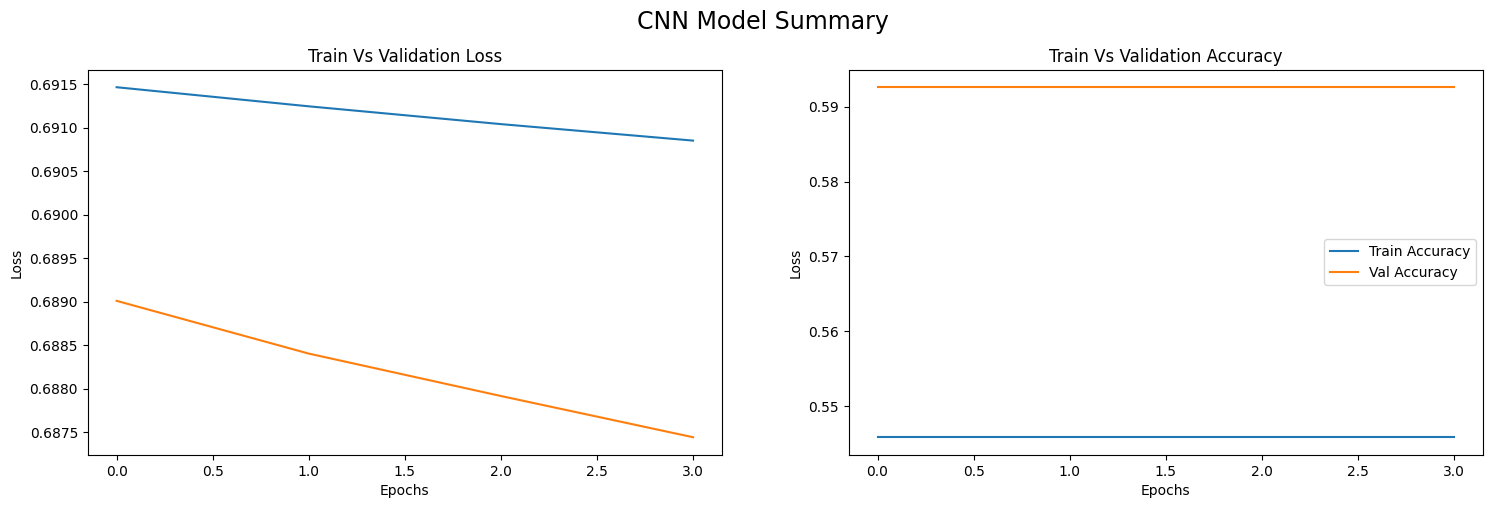

In [ ]:
plot_history(model_history, name = 'CNN Model Summary')

In [ ]:
from google.colab import files
files.download("/content/logs")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload \
  --logdir logs/fit \
  --name "CNN ASSIGNMENT 2"

usage: tensorboard
       [-h]
       [--helpfull]
       {serve,dev}
       ...
tensorboard: error: unrecognized arguments:    


https://tensorboard.dev/experiment/3TX97w78QGa5TDSKZ1gkHw/#graphs&run=20230401-105542%2Ftrain